In [4]:
import os
import pandas as pd

def parse_all_xlsx_files(folder_path):
    all_dfs = []

    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file has a .xlsx extension
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)

                # Try to read the Excel file into a DataFrame
                try:
                    df = pd.read_excel(file_path)
                    
                    # Store both the file name and the DataFrame in a tuple
                    result = (file, df)
                    all_dfs.append(result)
                except Exception as e:
                    print(f"Error reading file {file}: {e}")

    return all_dfs

# Specify the folder path containing Excel files
folder_path = 'models'

# Call the function to parse all Excel files in the folder and its subfolders
list_of_dfs = parse_all_xlsx_files(folder_path)



In [4]:
list_of_dfs[5][1]#['Name']

Data Size                                        Name           MSE  \
0          80                        Thermal conductivity  3.164134e-02   
1         301  Dynamic mechanical properties loss tangent  2.816818e-01   
2        6325           Thermal decomposition temperature  3.774505e+03   
3          59  Hansen parameter delta-h: hydrogen bonding  1.382237e+01   
4          83                            Flexural modulus  1.476671e+01   
..        ...                                         ...           ...   
63         74                       Fiber tensile modulus  6.681067e+03   
64         53                  Crystallization kinetics r  1.353927e+08   
65        255                               Contact angle  2.277655e+02   
66        348                             Surface tension  6.859090e+01   
67       1739                             Specific volume  8.619929e-03   

            R2          RMSE        NMSE          MAE            MPE   Overall  
0    -3.871672      0.177880    4.871672     0.098837      77.144525  0.400000  
1     0.294627      0.530737    0.705373     0.361926     193.757675  0.230769  
2     0.668462     61.436999    0.331538    41.426355       6.547767  0.943953  
3     0.360865      3.717845    0.639135     2.950667      68.706544  0.000000  
4    -0.492477      3.842748    1.492477     2.320985      63.890962  0.428571  
..         ...           ...         ...          ...            ...       ...  
63   -3.804689     81.737797    4.804689    56.648125     112.655038  0.750000  
64 -174.772928  11635.835576  175.772928  8937.743333  119457.763829  0.250000  
65    0.241732     15.091903    0.758268    12.310577       6.215002  0.769231  
66    0.562093      8.281962    0.437907     5.614857       5.263455  0.812500  
67    0.494610      0.092844    0.505390     0.061054       4.119176  0.015152  

[68 rows x 9 columns]

In [62]:
# Initialize an empty dictionary
r2_values_dict = {}

# Iterate through the list_of_dfs
for i in range(len(list_of_dfs)):
    # Extract relevant information
    entity = list_of_dfs[i][0].split('_')[1].split('.')[0]
    r2_value = list_of_dfs[i][1]['R2'].iloc[0]  # Assuming there is only one value in 'R2' column

    # Add to the dictionary
    r2_values_dict[entity] = r2_value

# Print or use the dictionary as needed
print(r2_values_dict)


{'AdaBoost': -19.26449572683564, 'Bagging': -0.2388428370649989, 'Decision Tree': -0.7707759877403133, 'Elastic Net': -72.26858239455409, 'Gradient Boosting': 0.1270811050452448, 'KNeighborsRegressor': -3.871671505790912, 'Lasso': -72.26858239455409, 'Linear Regression': -8.534335277911692e+23, 'Random Forest': -0.545578819954581, 'SVR': -4.770739206105757, 'XGBoost': 0.1202239403883765}


In [2]:
# Initialize an empty dictionary
result_dict = {}

# Iterate through the list_of_dfs
for i in range(len(list_of_dfs)):
    # Extract relevant information
    entity = list_of_dfs[i][0].split('_')[1].split('.')[0]
    names = list_of_dfs[i][1]['Name'].tolist()
    r2_values = list_of_dfs[i][1]['MPE'].tolist()

    # Create a dictionary for each name
    for j in range(len(names)):
        name = names[j]
        r2_value = r2_values[j]

        # If the name is not already a key in result_dict, add it
        if name not in result_dict:
            result_dict[name] = {}

        # Add the entity and its corresponding R2 value to the name's dictionary
        result_dict[name][entity] = r2_value

# Print or use the dictionary as needed
print(result_dict)



{'Thermal conductivity': {'AdaBoost': 274.6851134251215, 'Bagging': 27.16293718711307, 'Decision Tree': 30.2056410971164, 'Elastic Net': 523.07618514004, 'Gradient Boosting': 37.44665552099447, 'KNeighborsRegressor': 77.14452499927133, 'Lasso': 523.07618514004, 'Linear Regression': 9132306659914.848, 'Random Forest': 45.5947209432056, 'SVR': 122.1966307751935, 'XGBoost': 34.4758821048127}, 'Dynamic mechanical properties loss tangent': {'AdaBoost': 1656.223144668726, 'Bagging': 345.6723685207627, 'Decision Tree': 76.94106729604854, 'Elastic Net': 767.8460581358668, 'Gradient Boosting': 308.5012320816782, 'KNeighborsRegressor': 193.7576749525487, 'Lasso': 767.8460581358668, 'Linear Regression': 806893159597039.8, 'Random Forest': 270.7179611626937, 'SVR': 249.6291848729725, 'XGBoost': 181.457457718336}, 'Thermal decomposition temperature': {'AdaBoost': 8.21525739462773, 'Bagging': 3.363775456029029, 'Decision Tree': 2.361809401032059, 'Elastic Net': 5.290218392892728, 'Gradient Boosting'

In [66]:
result_dict.keys()#[0]

dict_keys(['Thermal conductivity', 'Dynamic mechanical properties loss tangent', 'Thermal decomposition temperature', 'Hansen parameter delta-h: hydrogen bonding', 'Flexural modulus', 'Vicat softening temperature', 'Dynamic mechanical properties loss modulus', 'Pvt relation specific volume', 'Tensile modulus', 'Heat of fusion', 'Water vapor transmission', 'Lc phase transition temperature', 'Dynamic flexural properties storage modulus', 'Thermal decomposition weight loss', 'Melting temperature', 'Hansen parameter delta p polar', 'Volume resistivity', 'Crystallization kinetics k', 'Heat of fusion mol conversion', 'Elongation at yield', 'Dynamic shear properties loss tangent', 'Dielectric loss factor', 'Cohesive energy density', 'Glass transition temperature', 'Dynamic shear properties storage modulus', 'Crystallization kinetics n', 'Heat of crystallization', 'Density', 'Water absorption', 'Electric conductivity', 'Elongation at break', 'Dynamic shear properties loss modulus', 'Flexural s

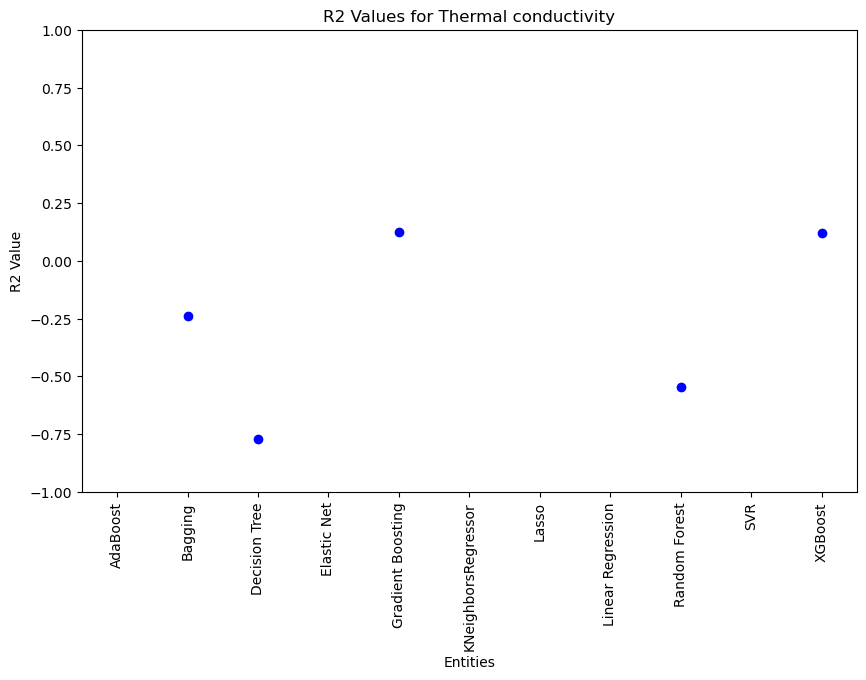

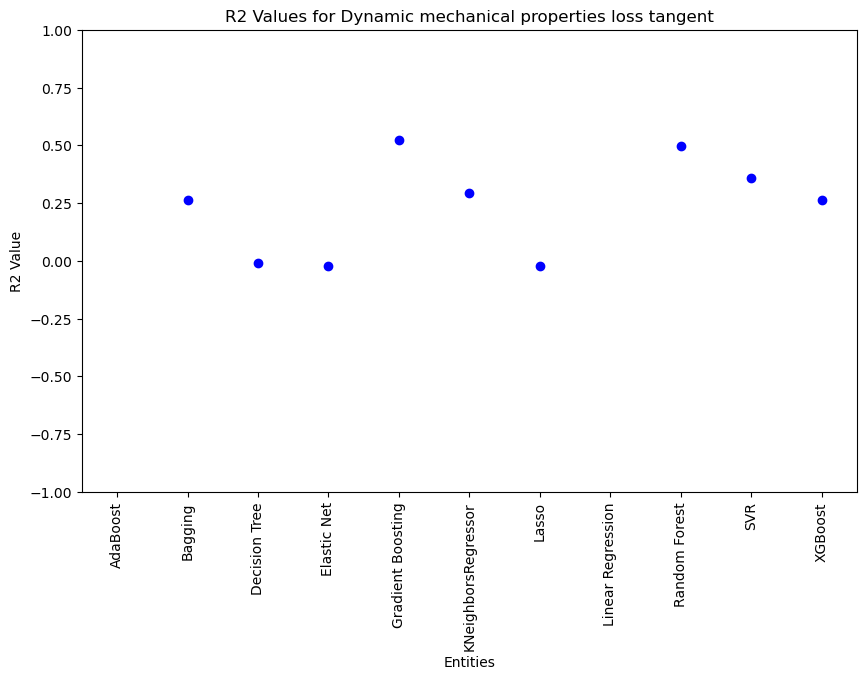

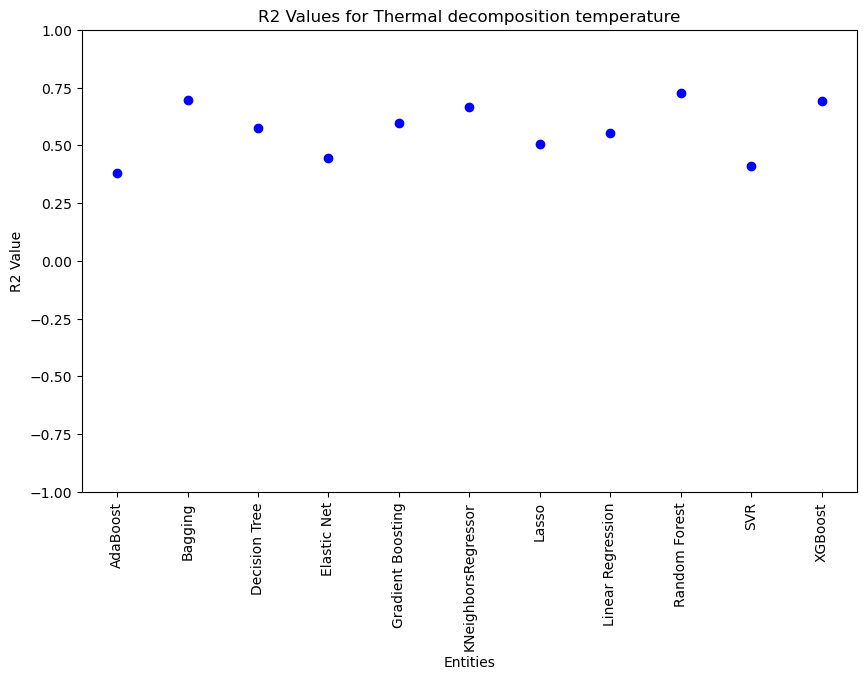

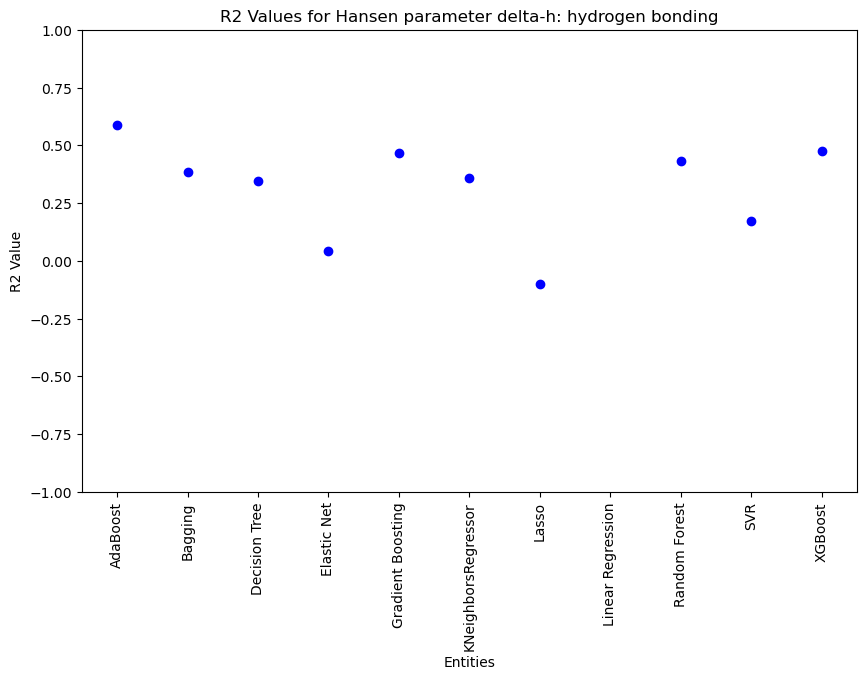

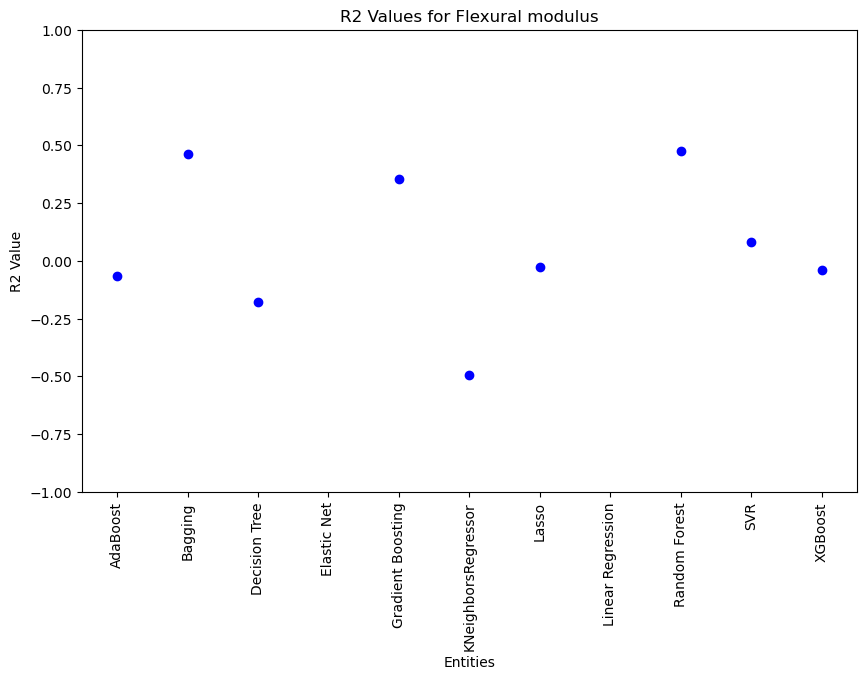

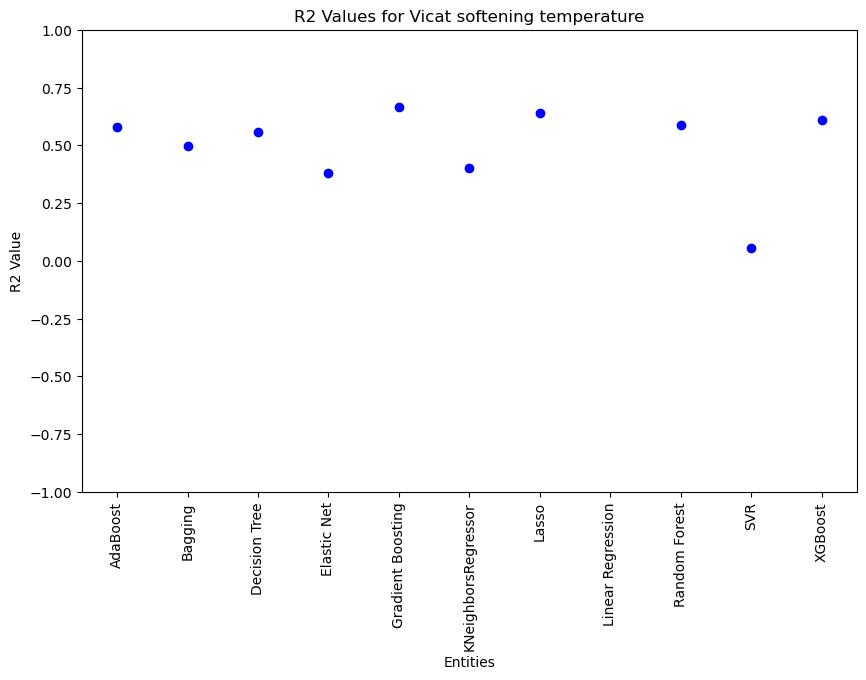

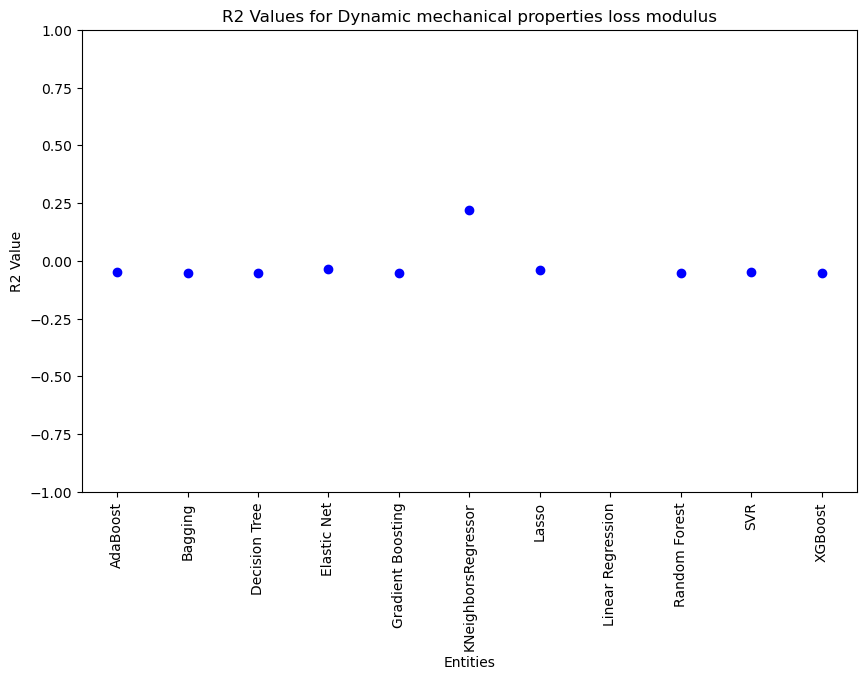

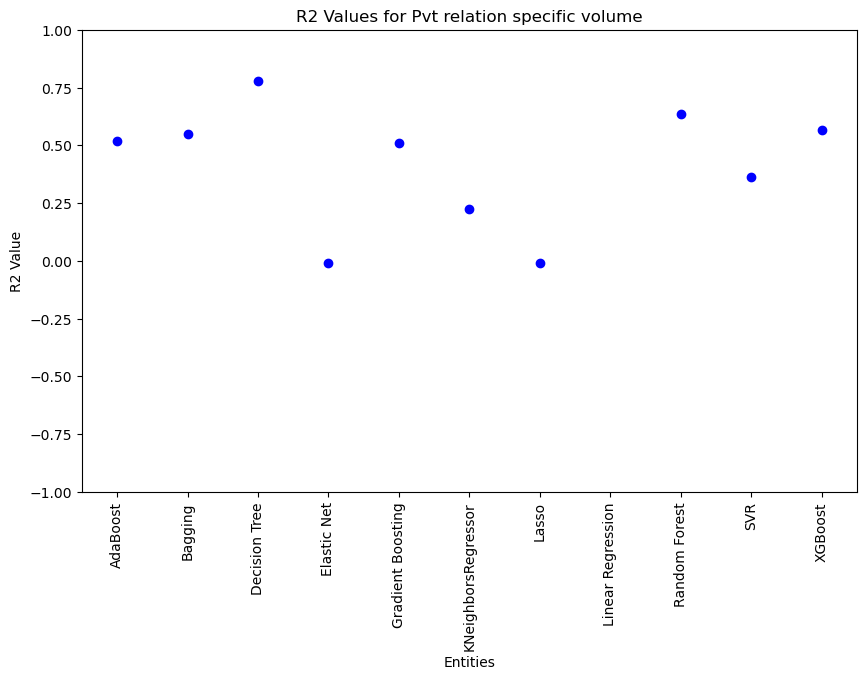

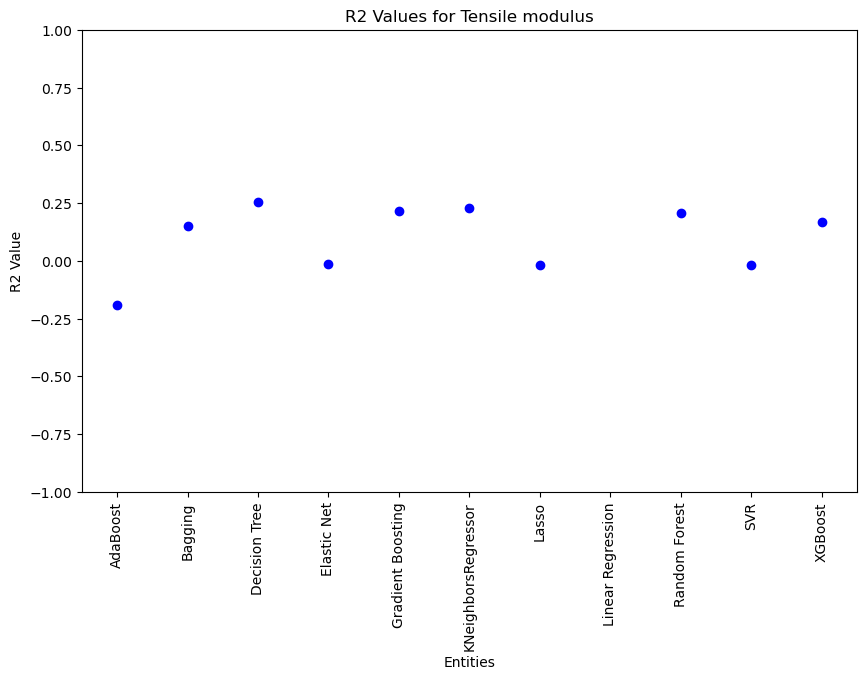

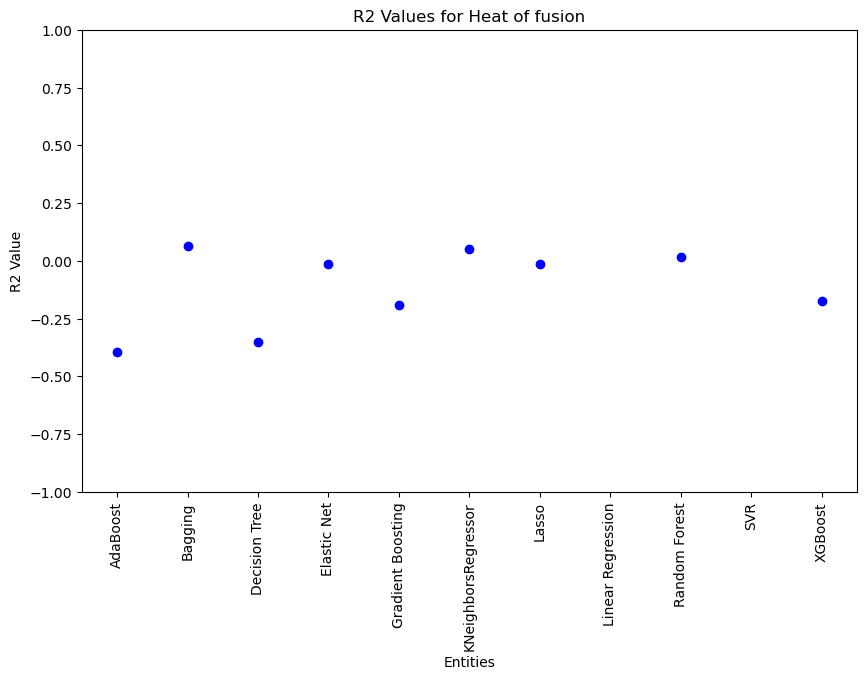

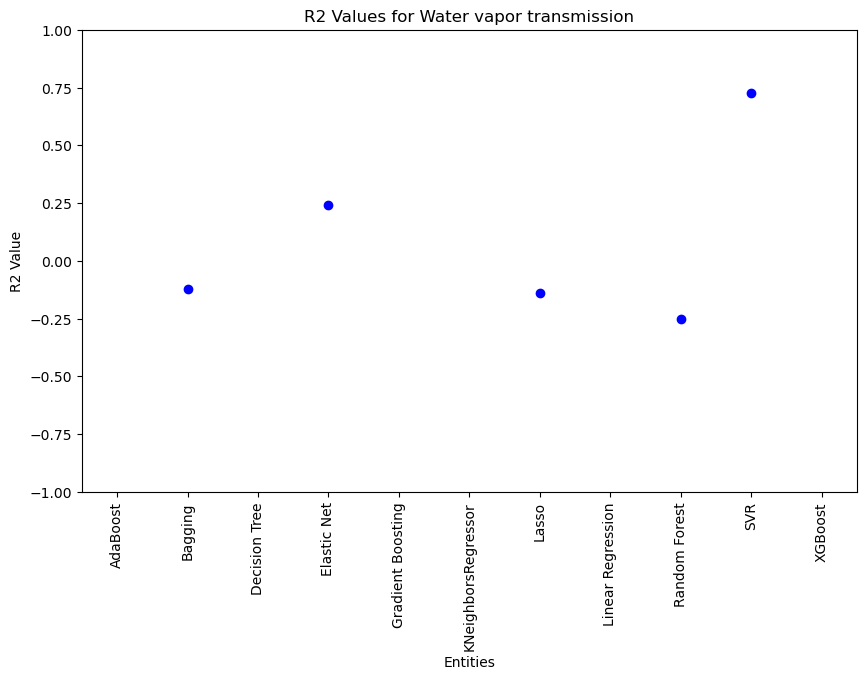

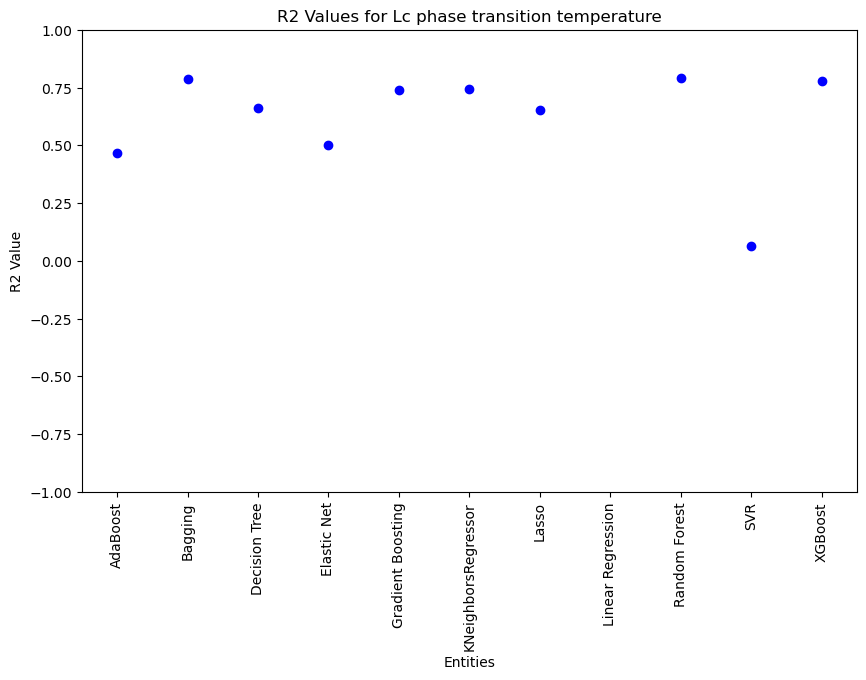

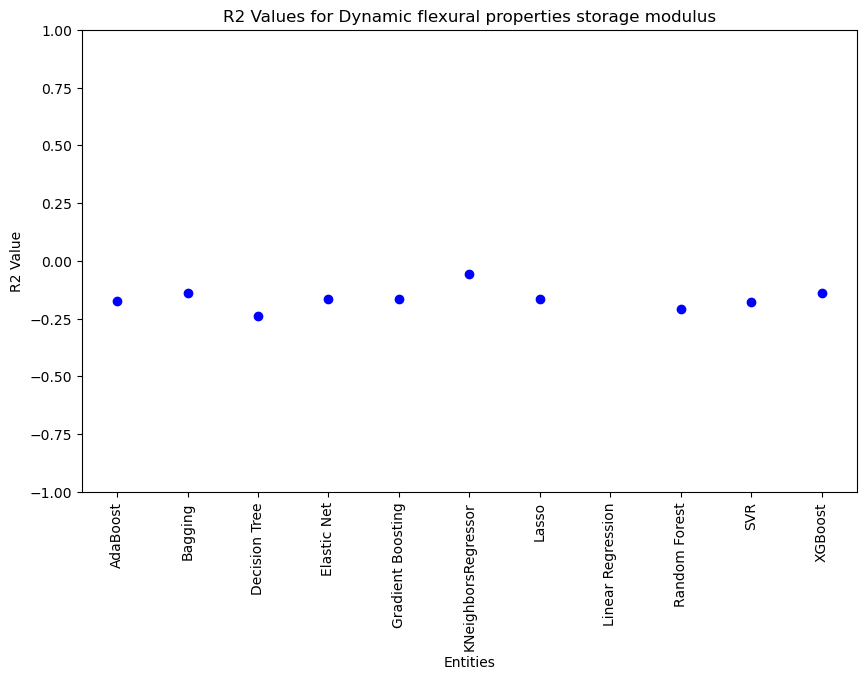

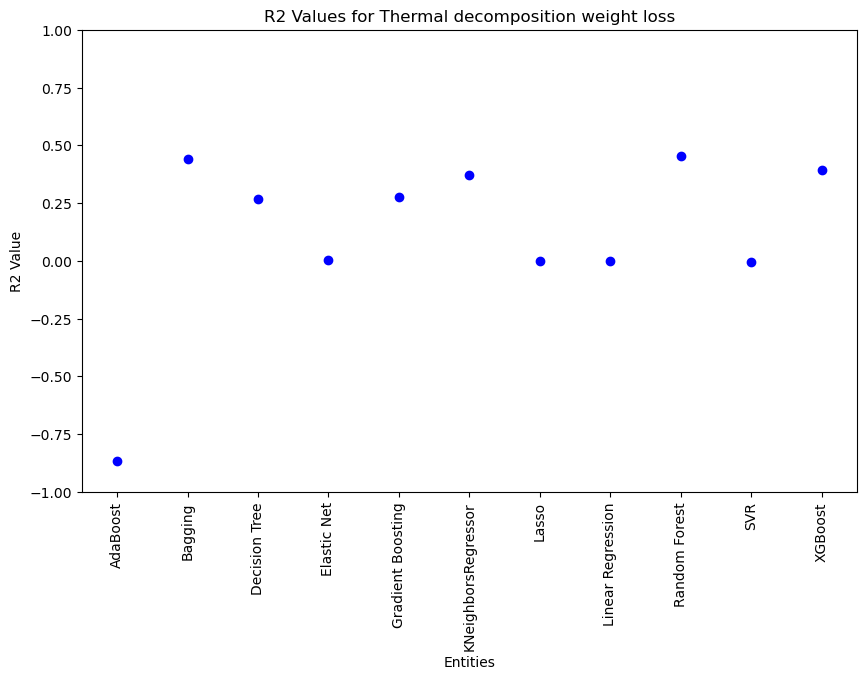

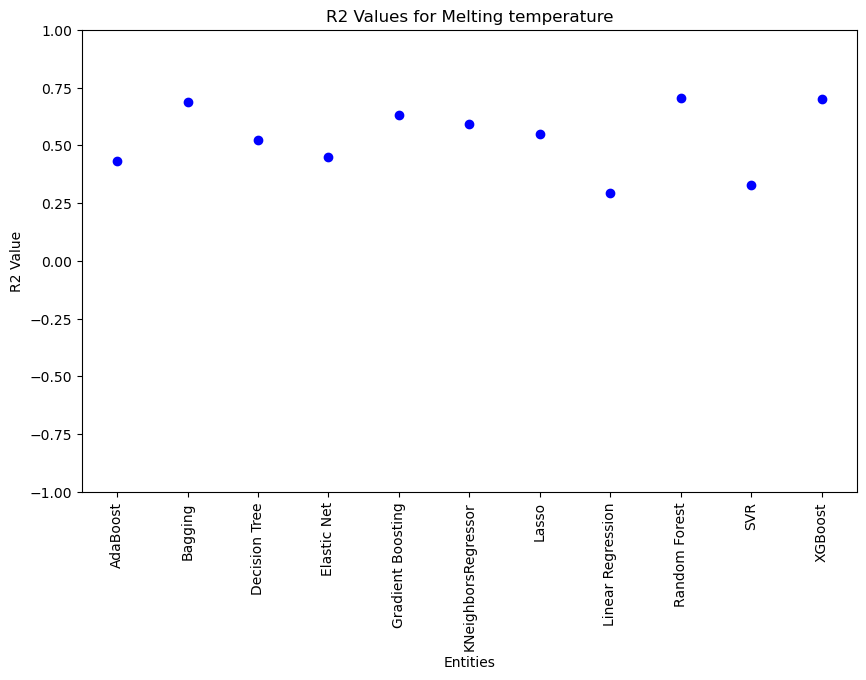

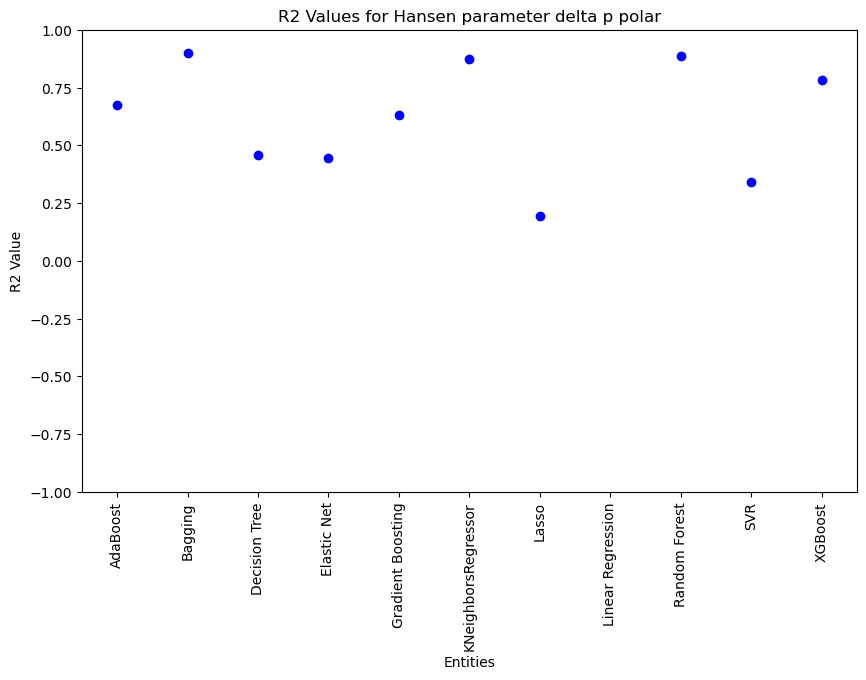

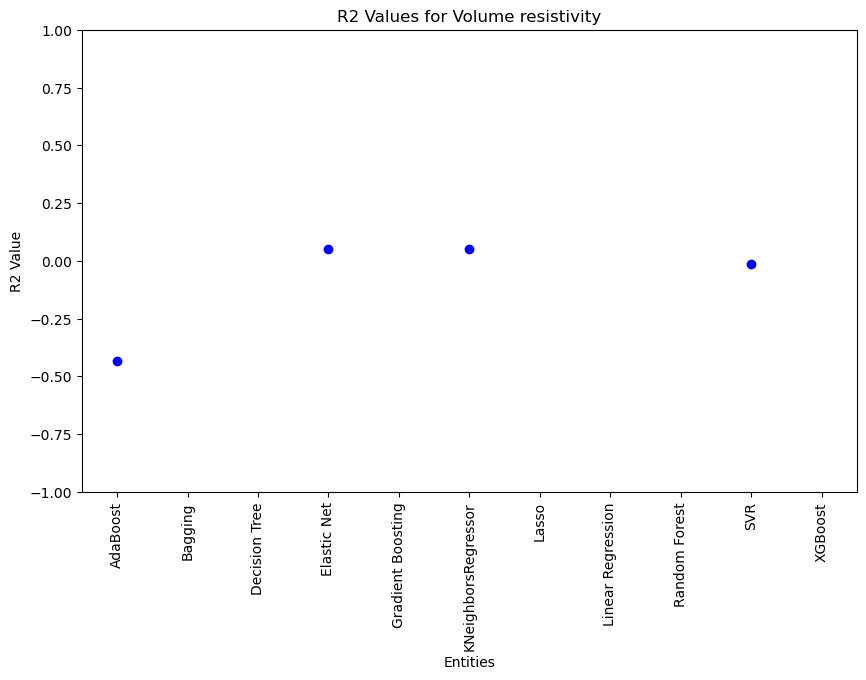

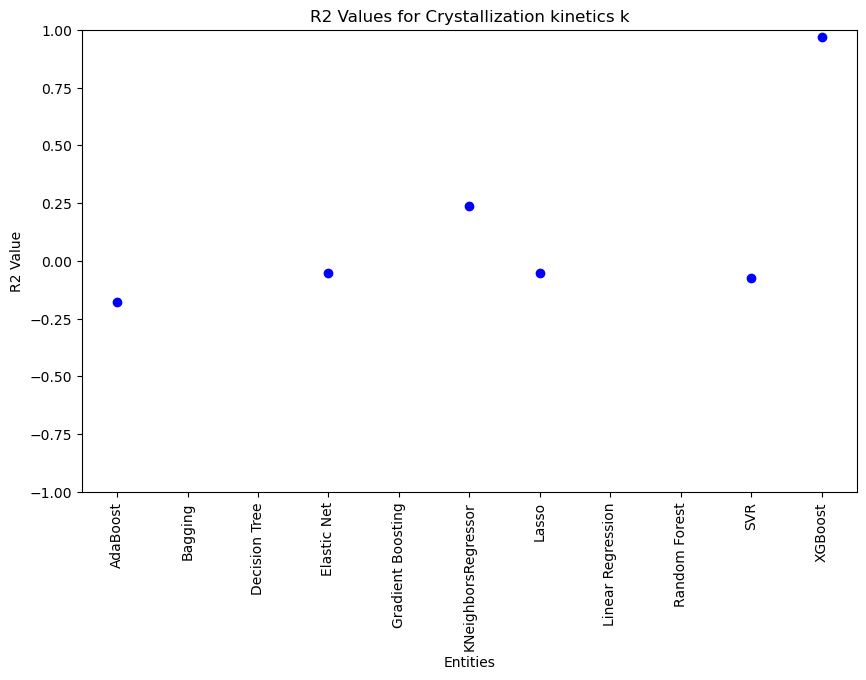

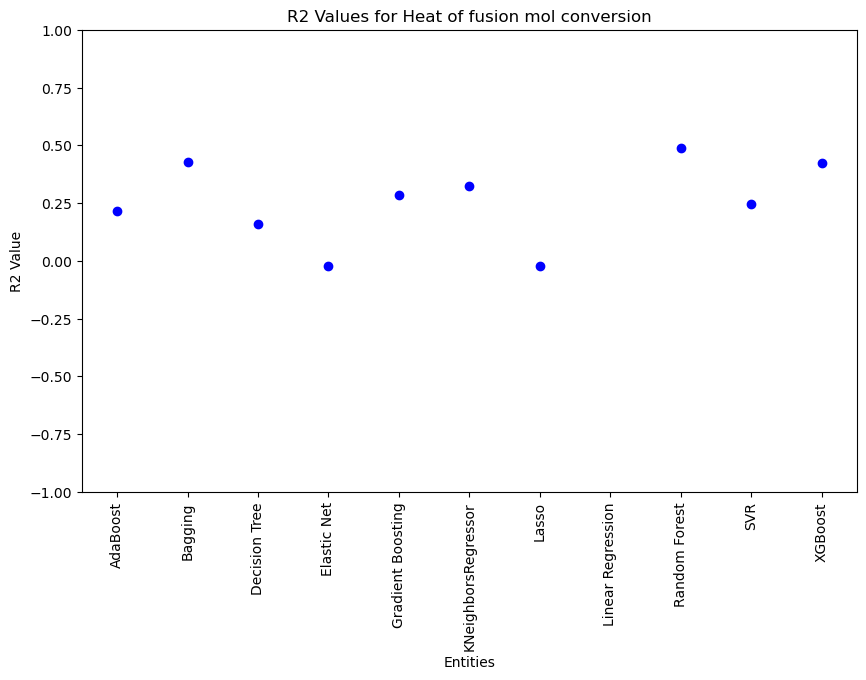

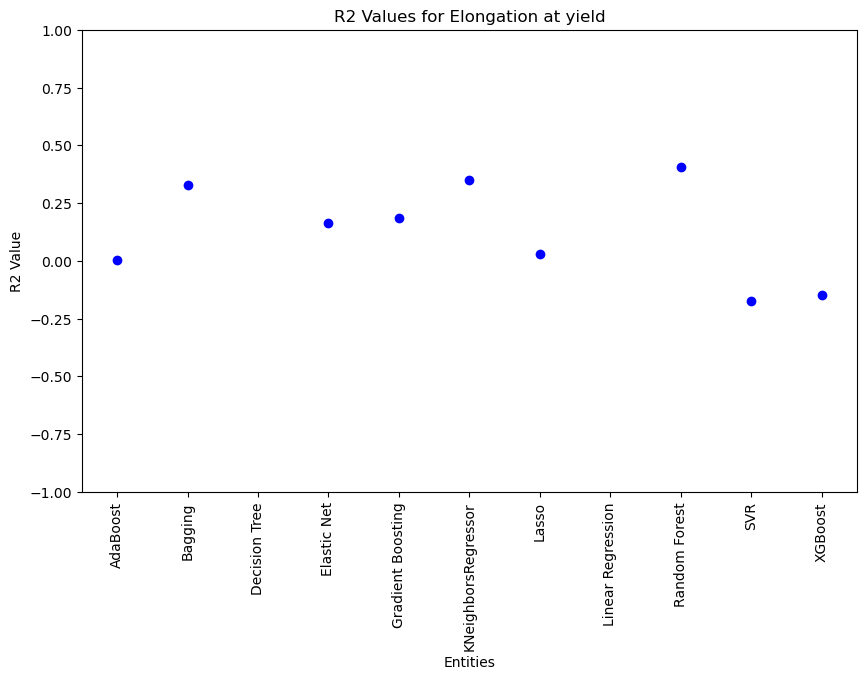

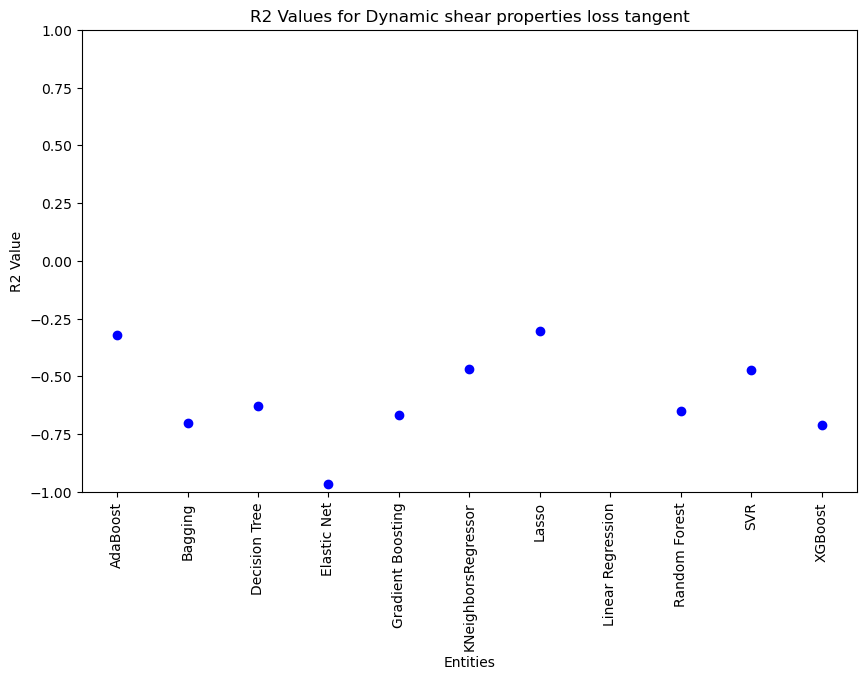

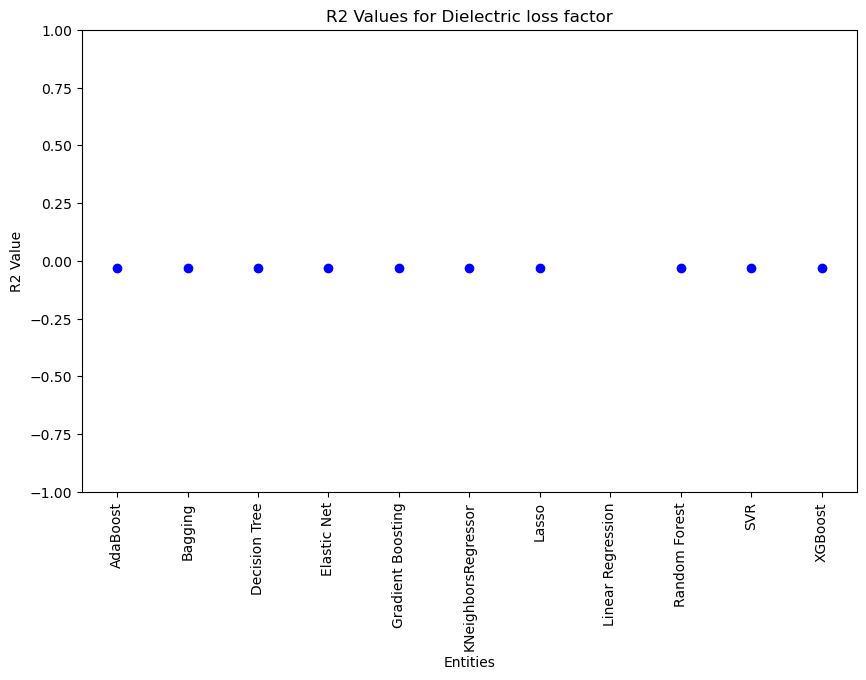

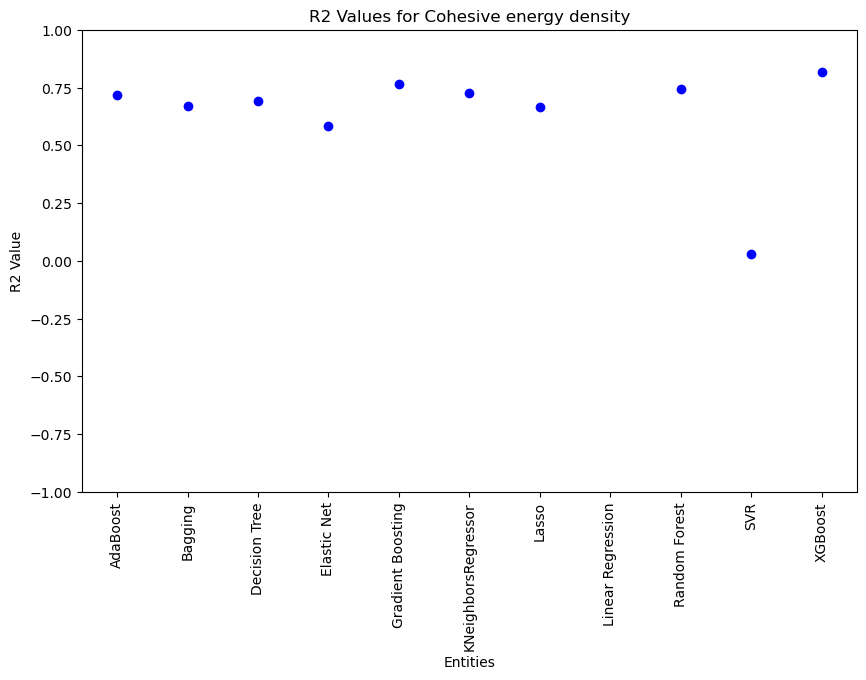

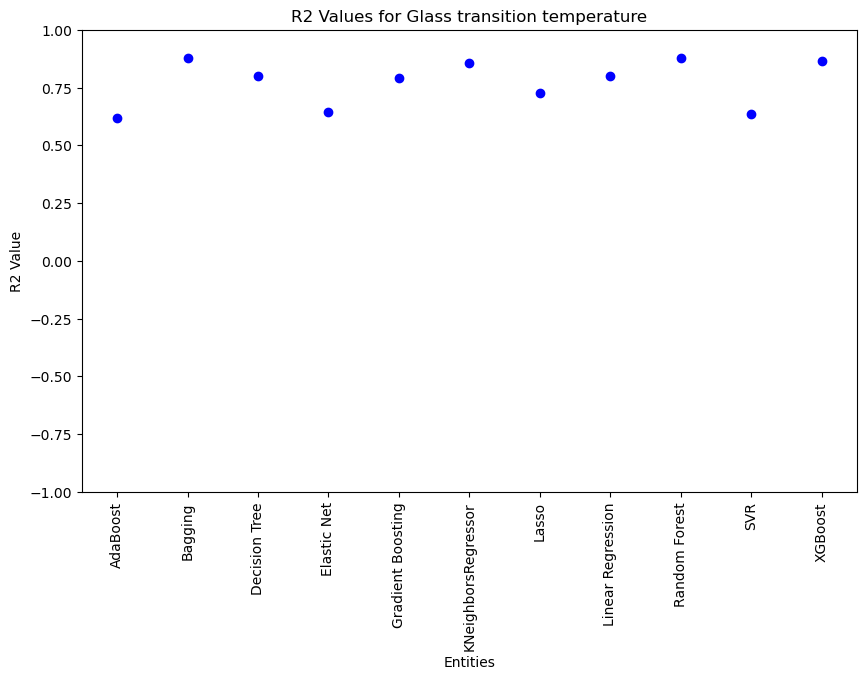

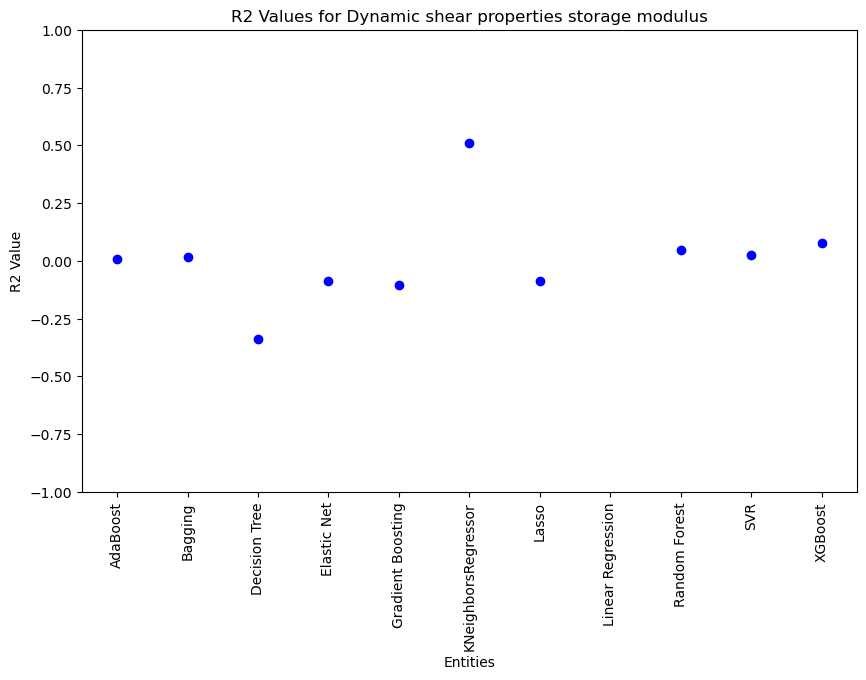

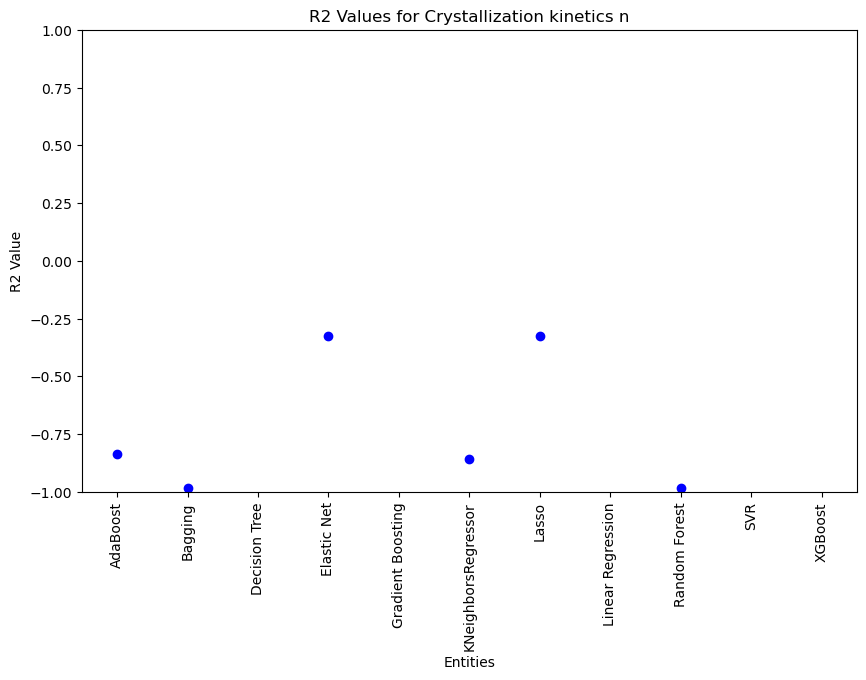

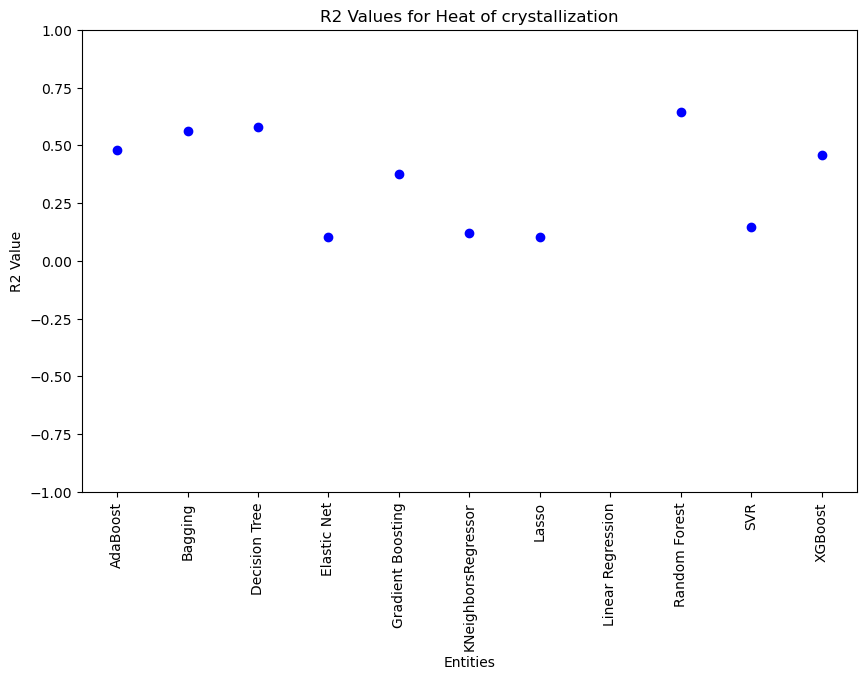

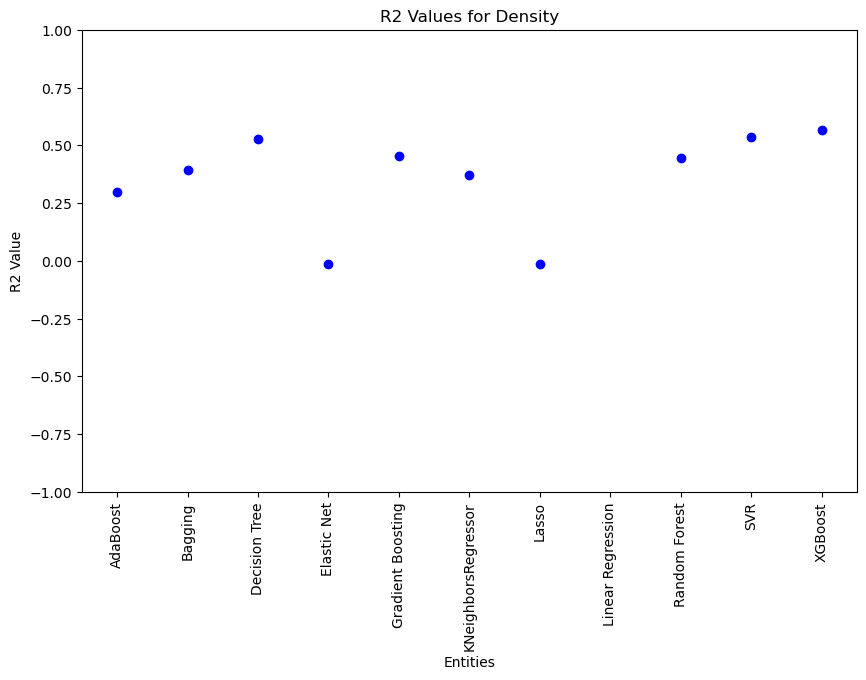

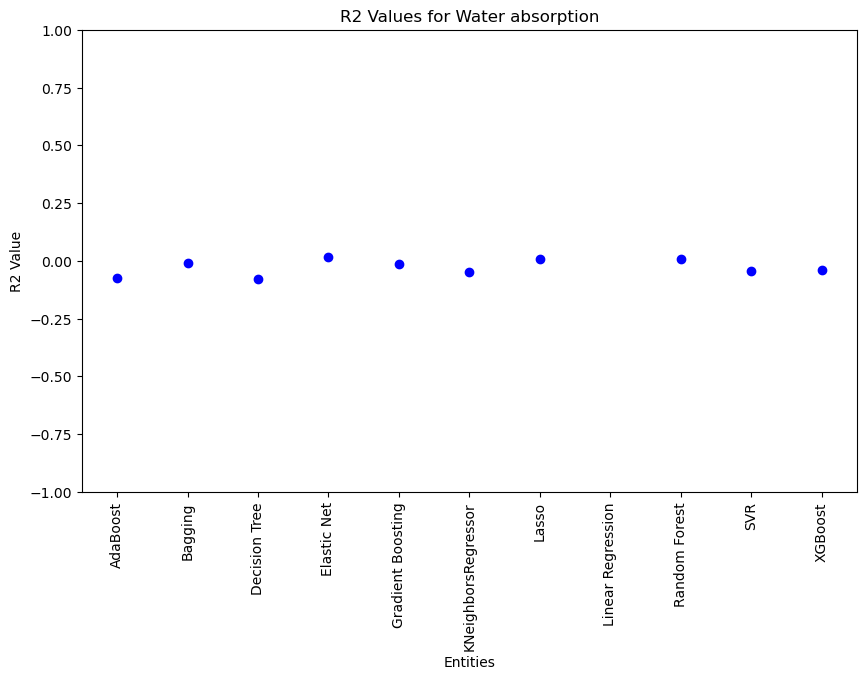

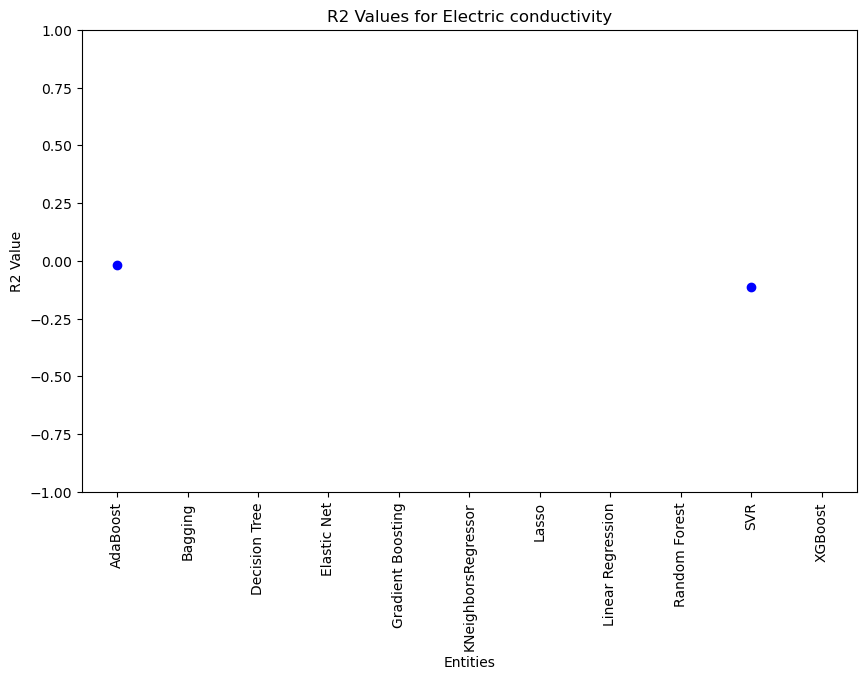

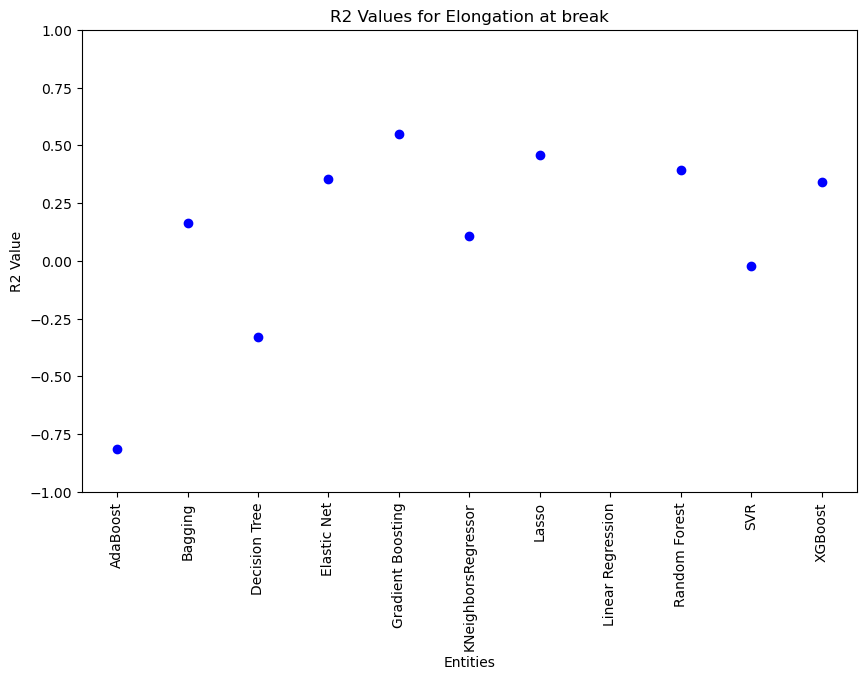

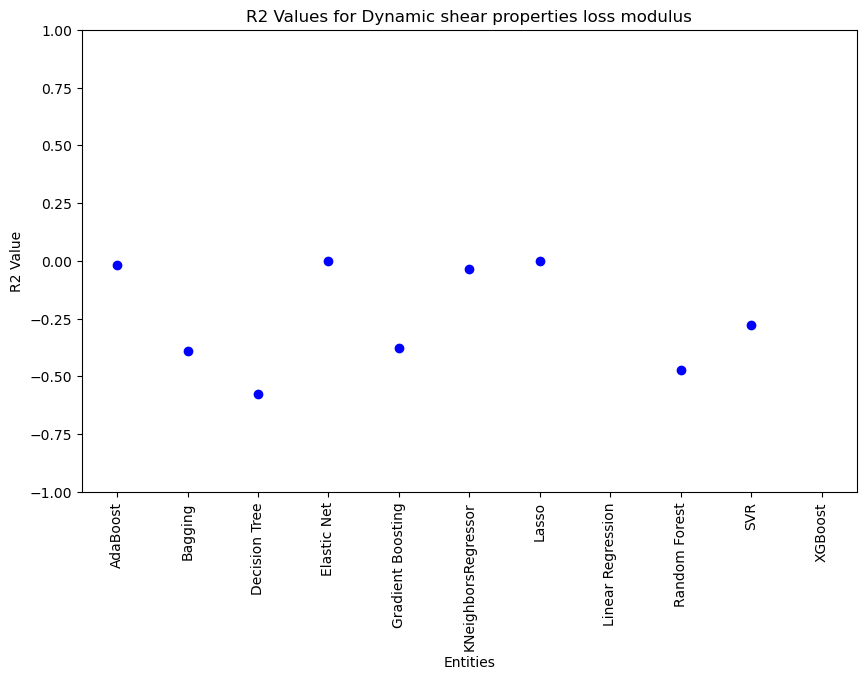

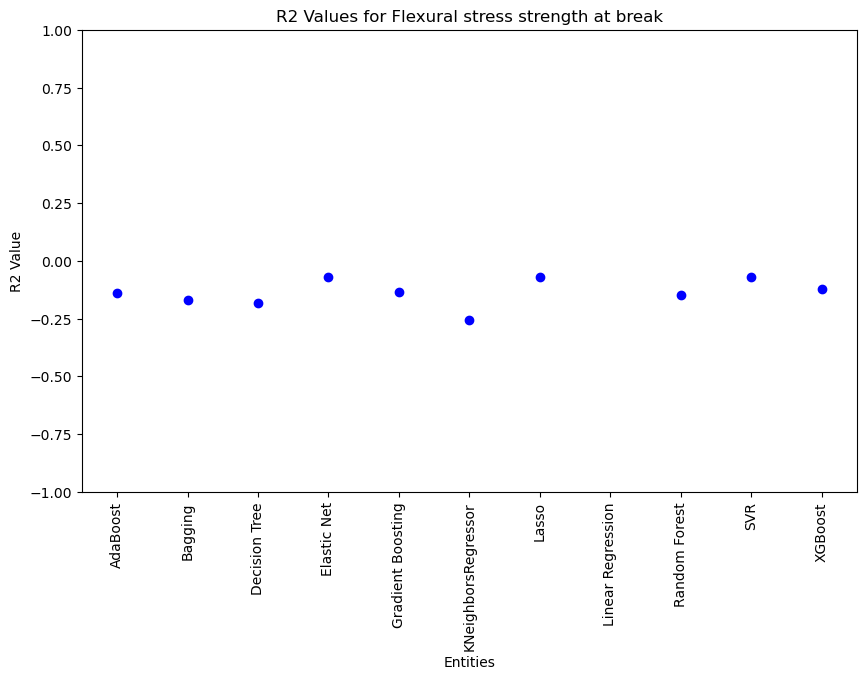

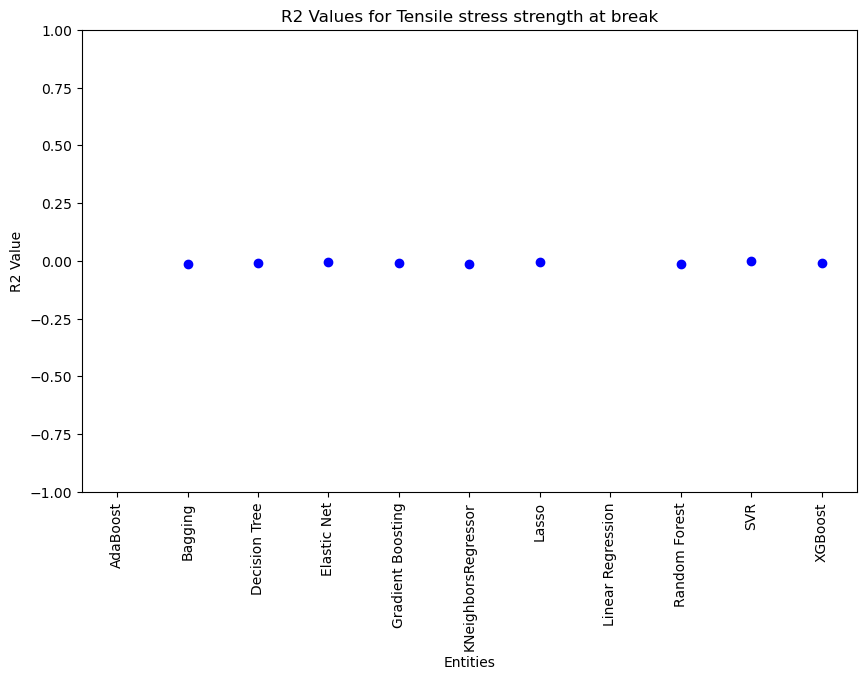

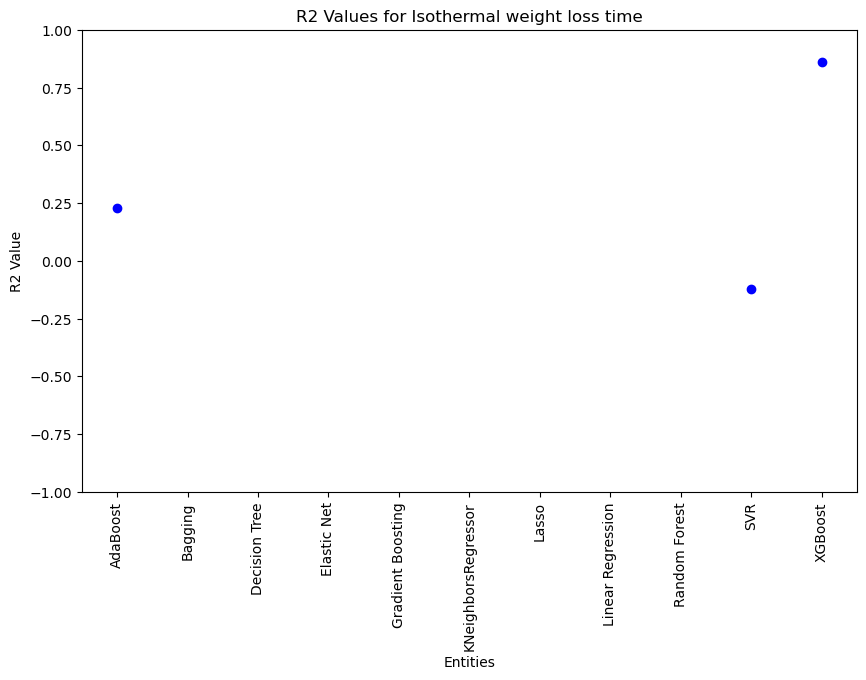

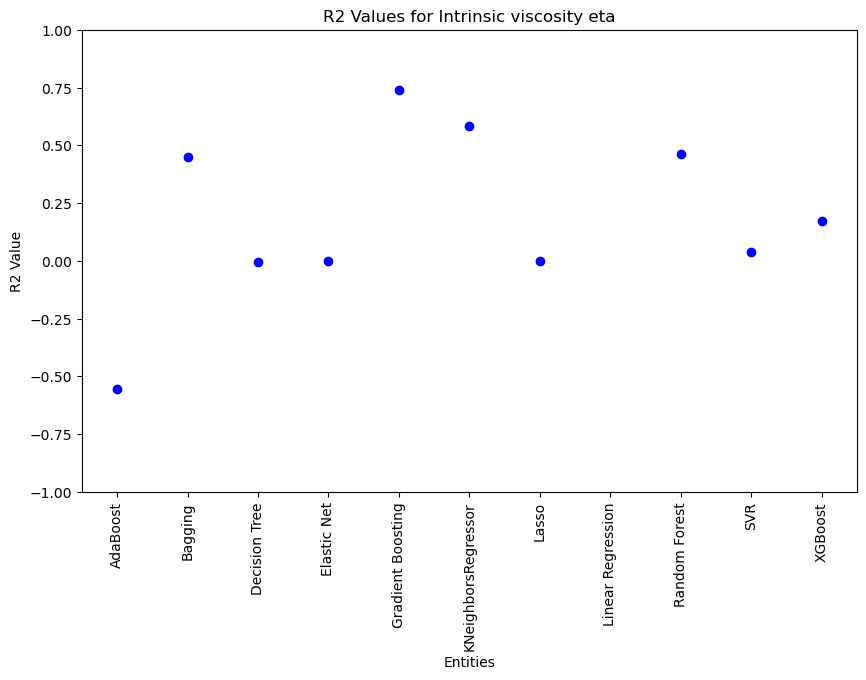

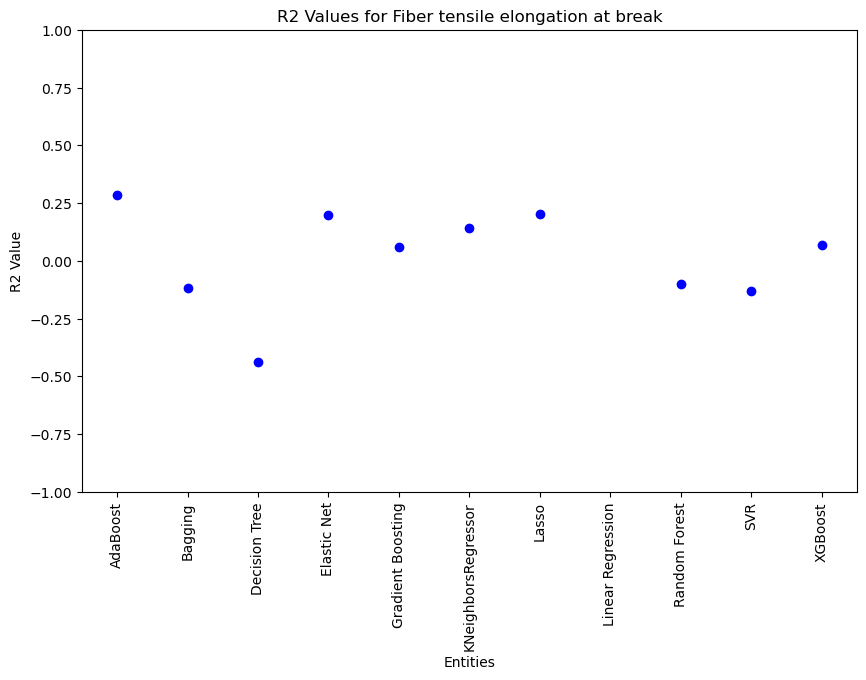

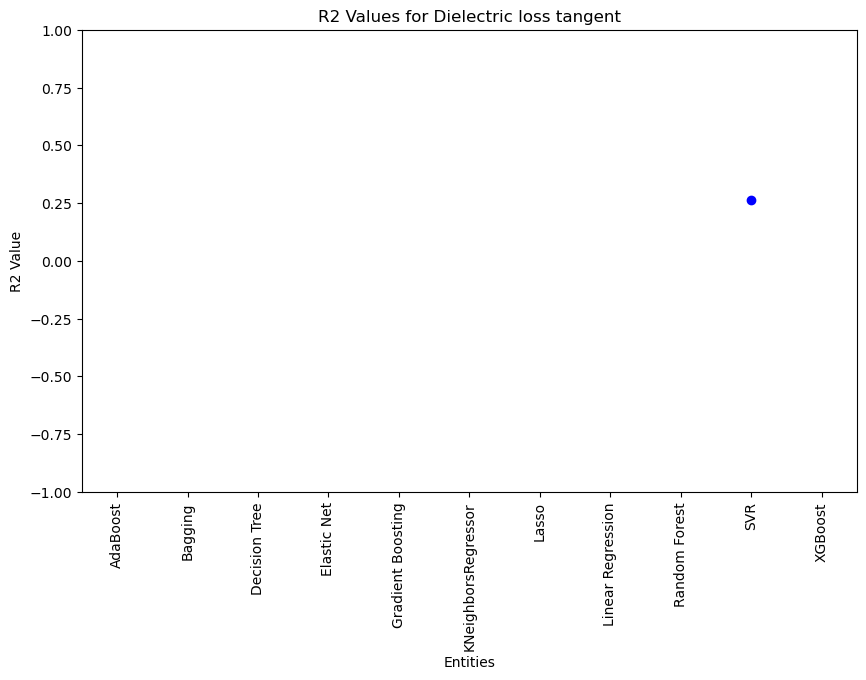

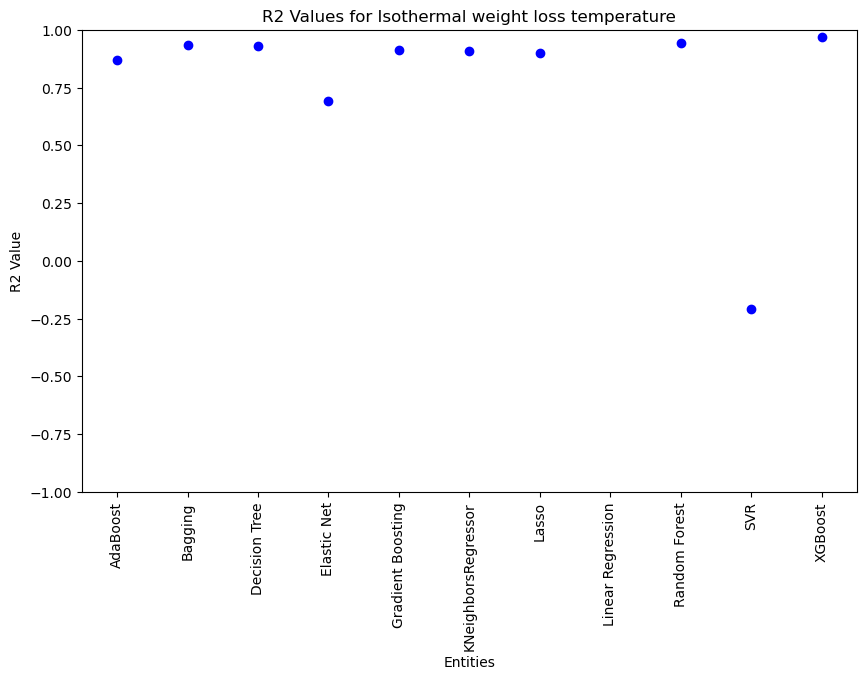

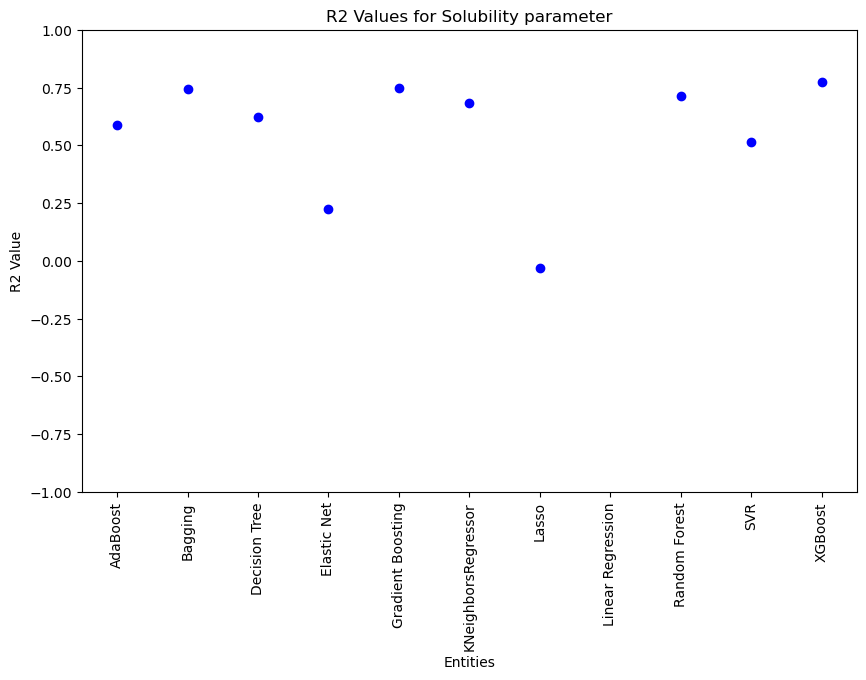

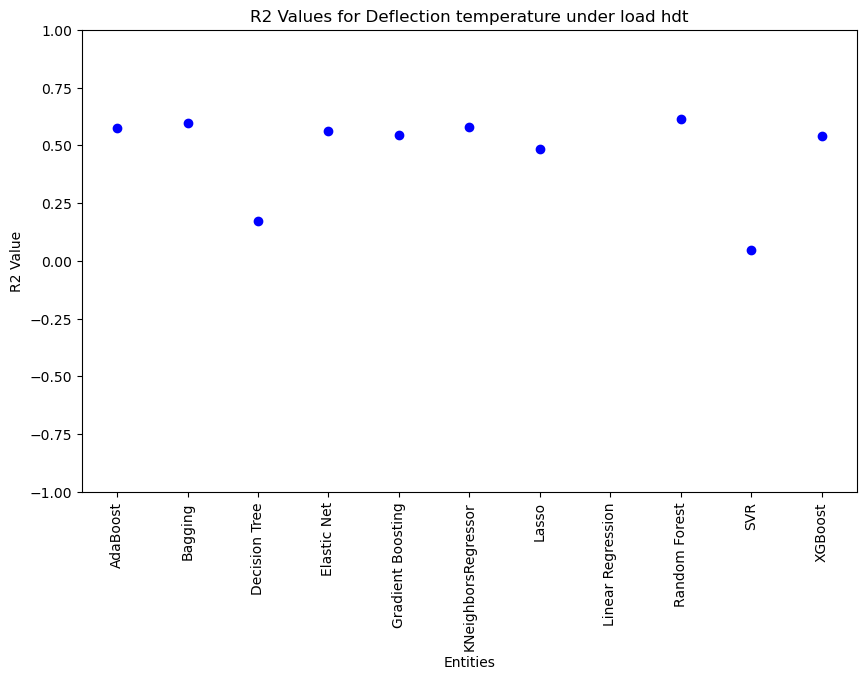

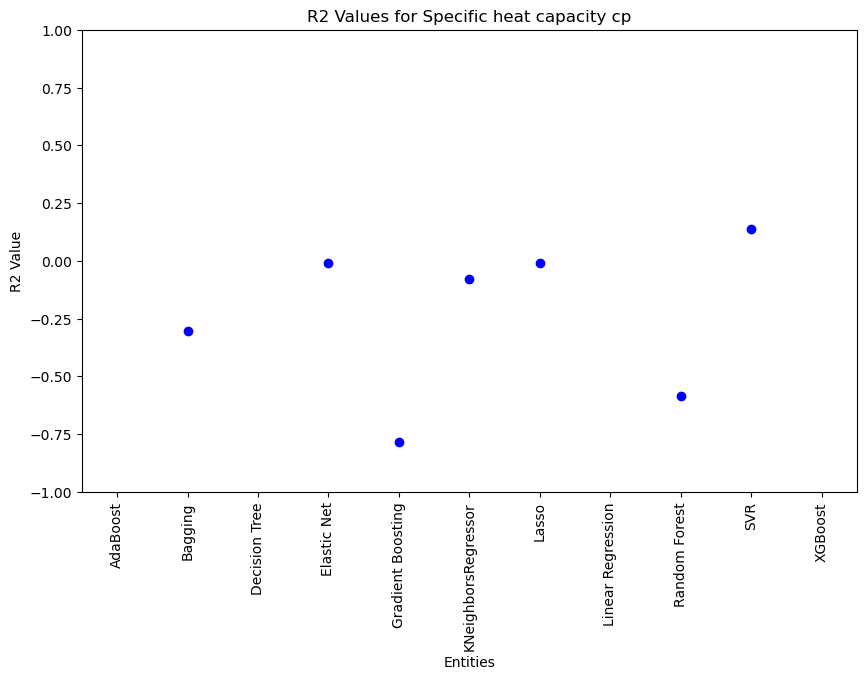

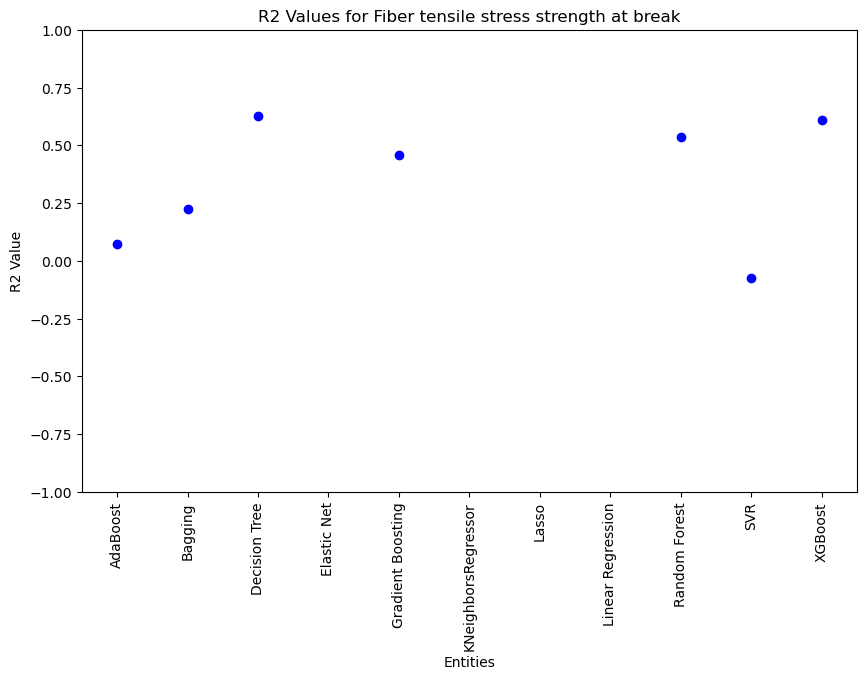

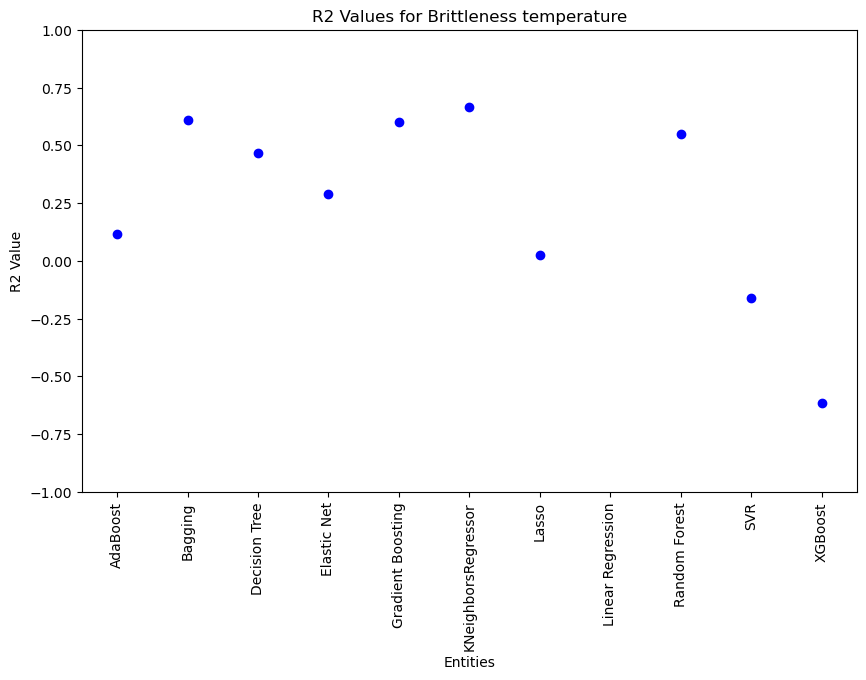

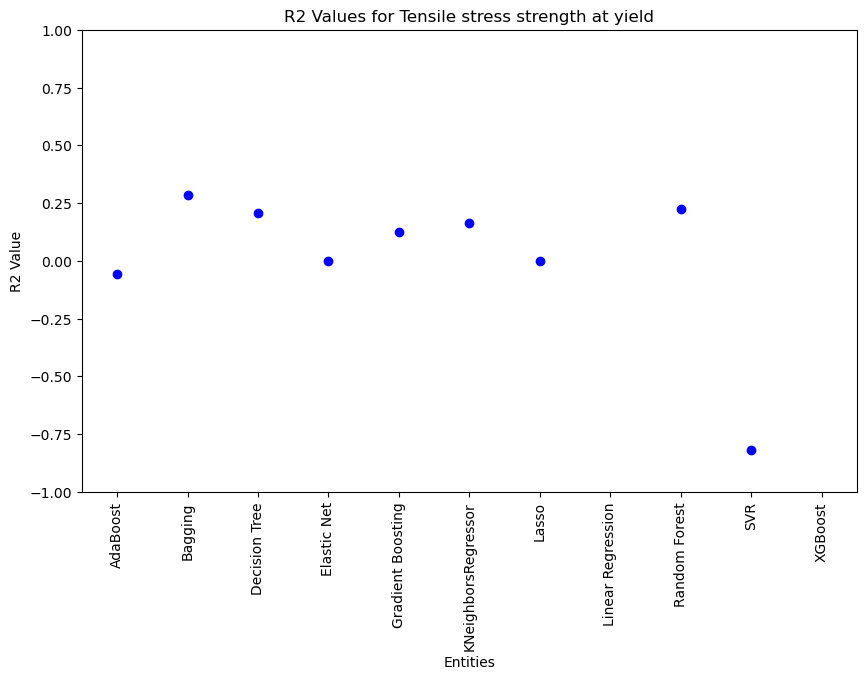

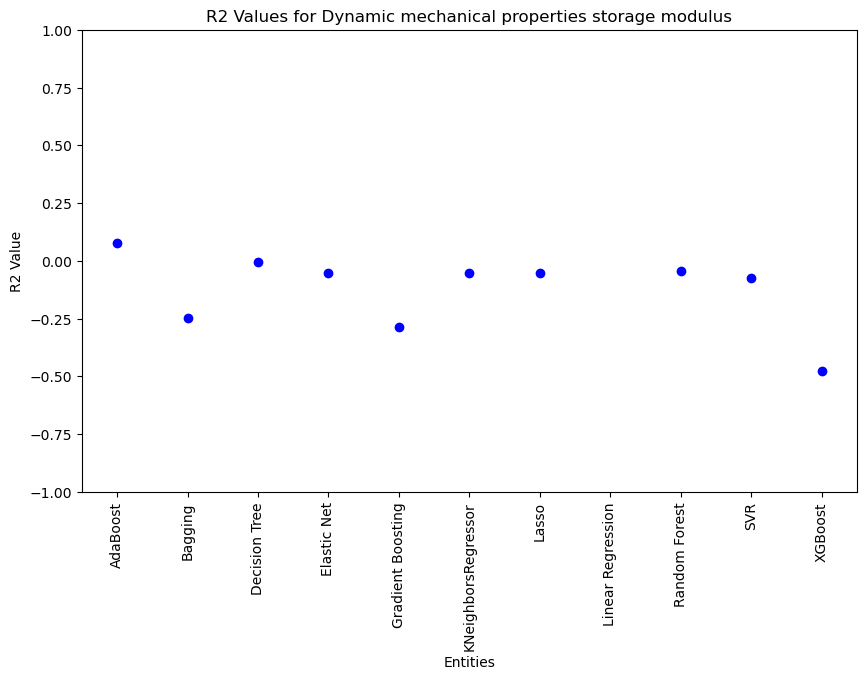

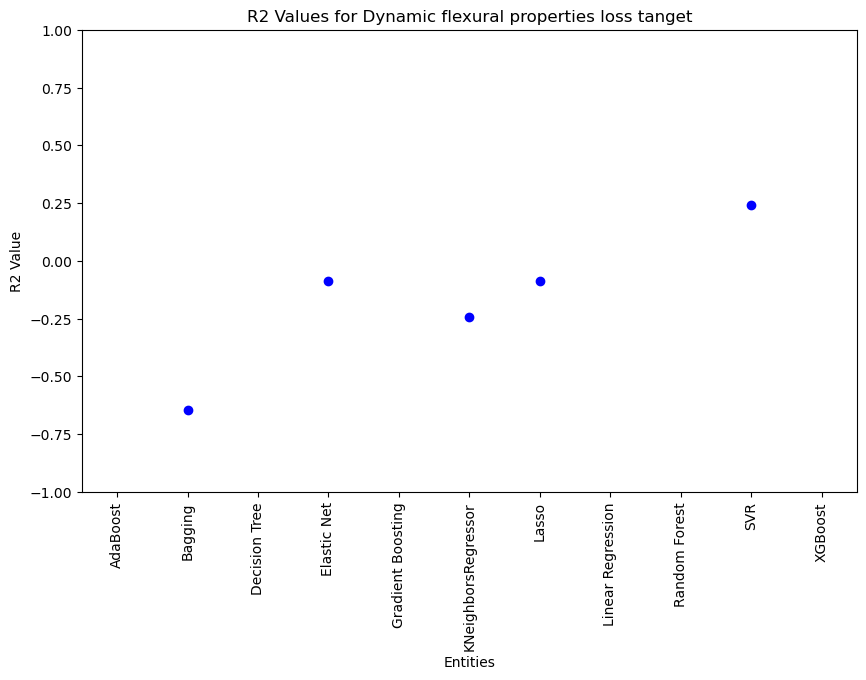

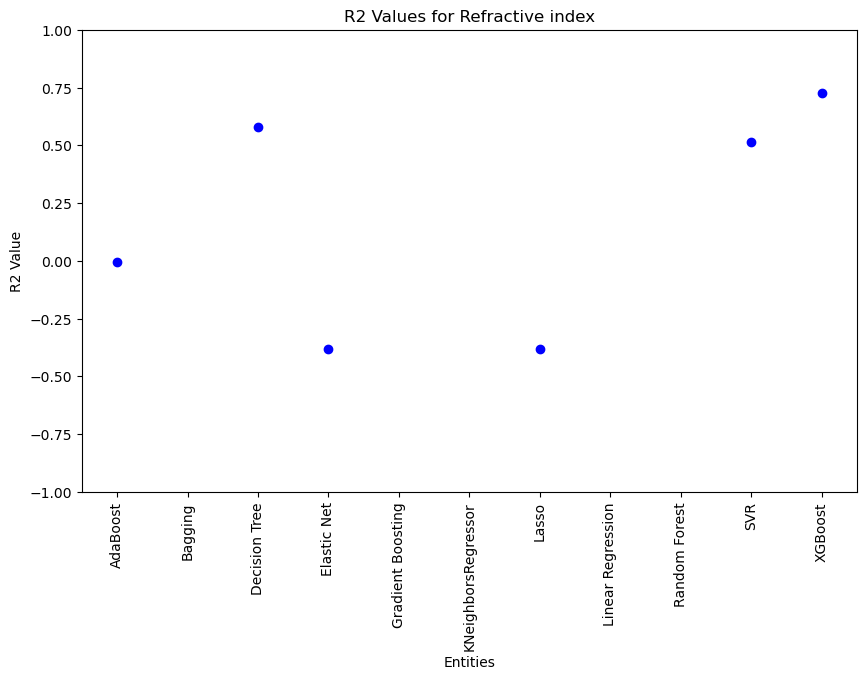

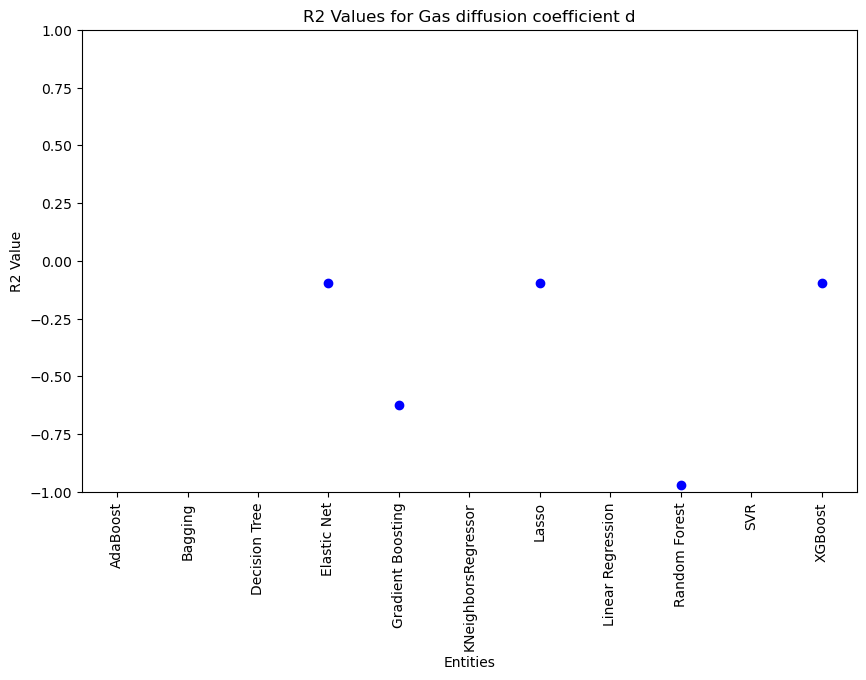

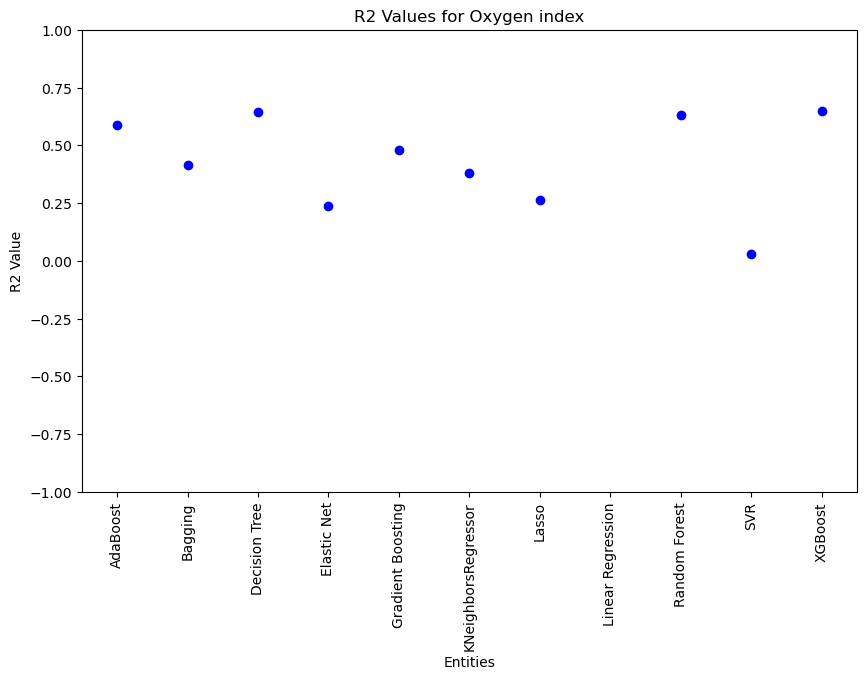

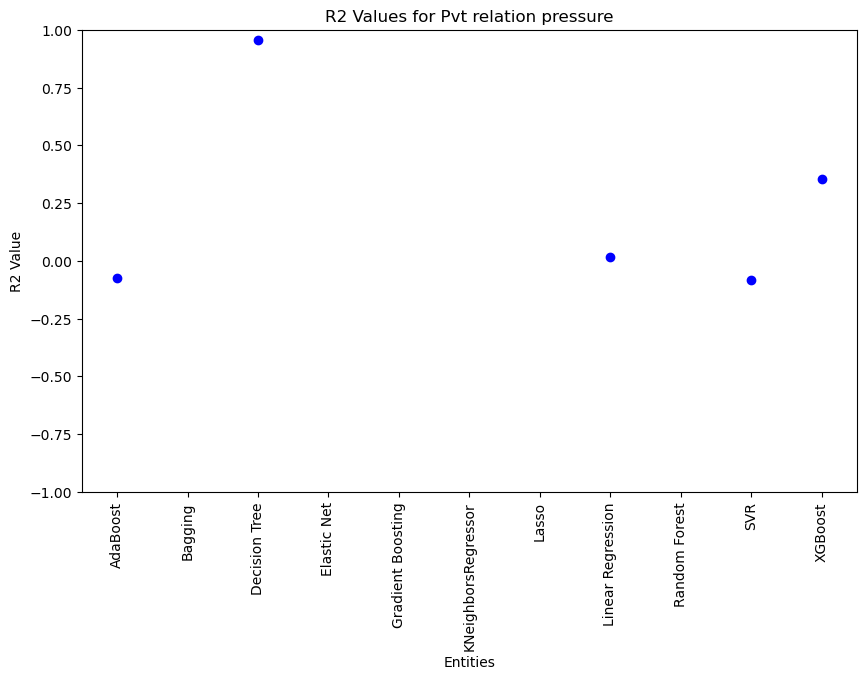

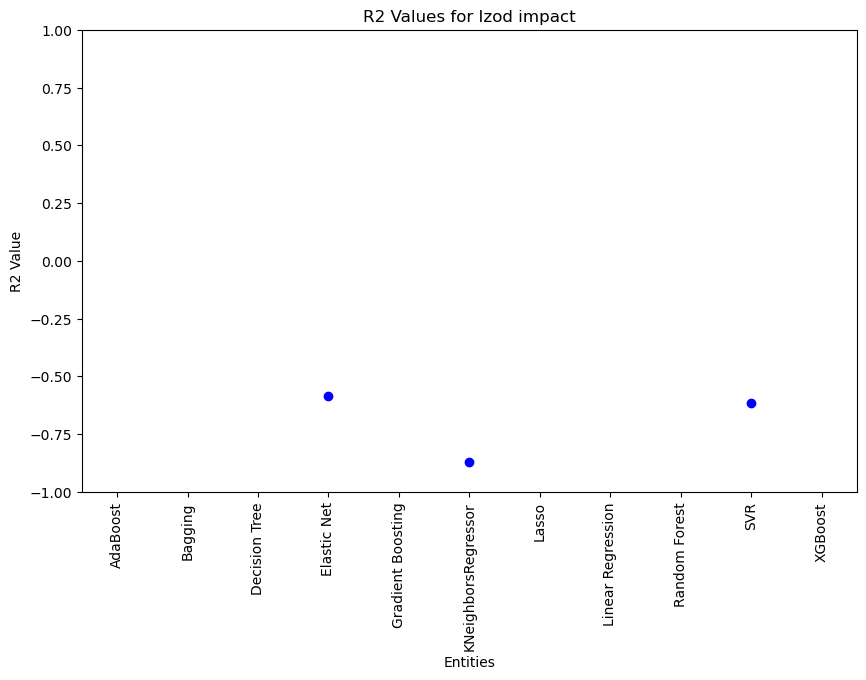

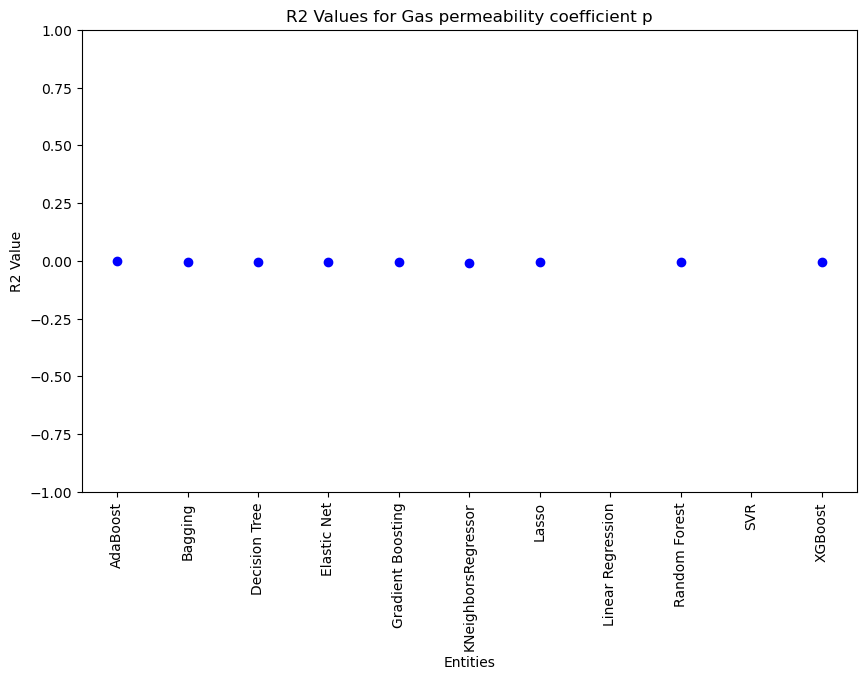

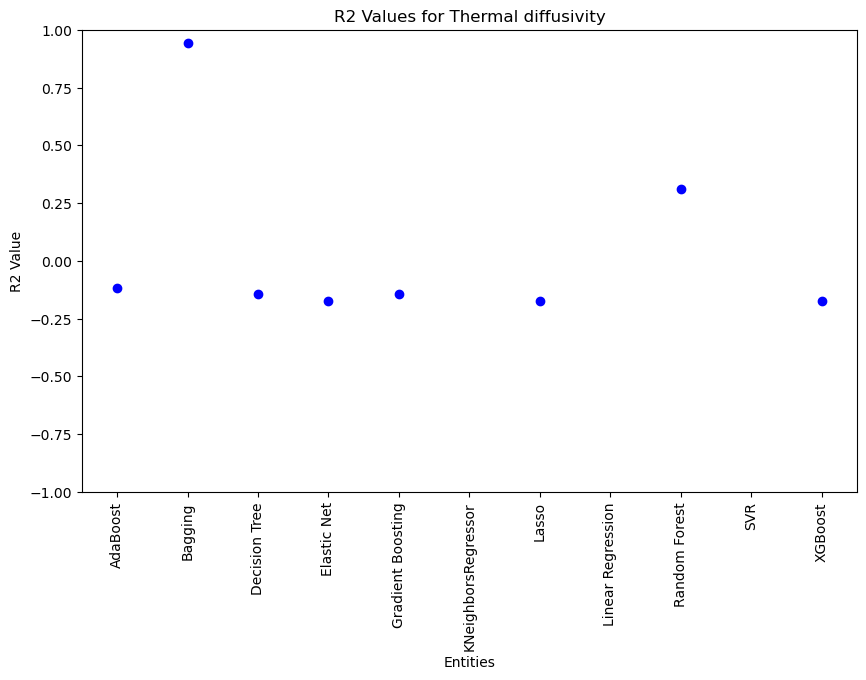

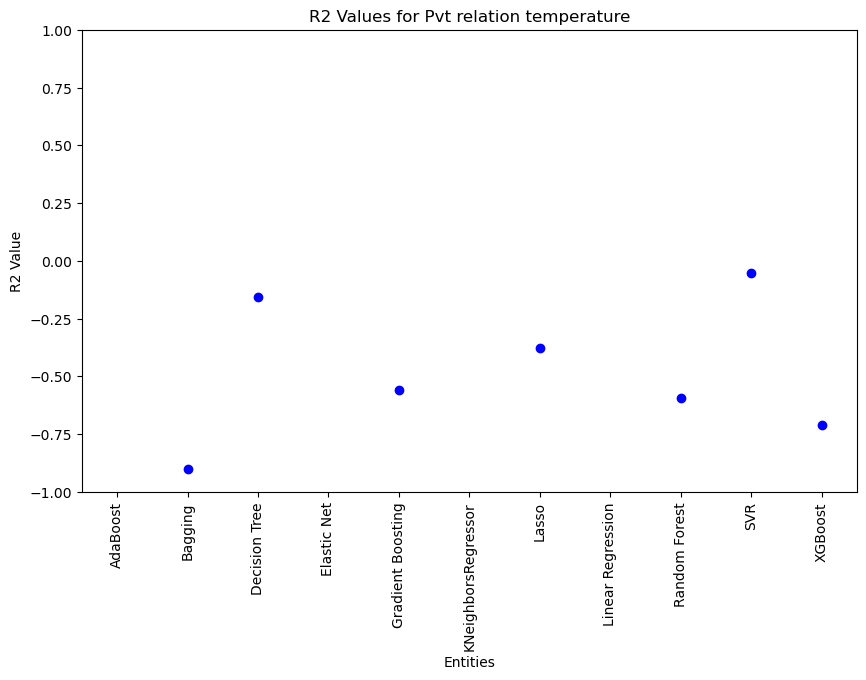

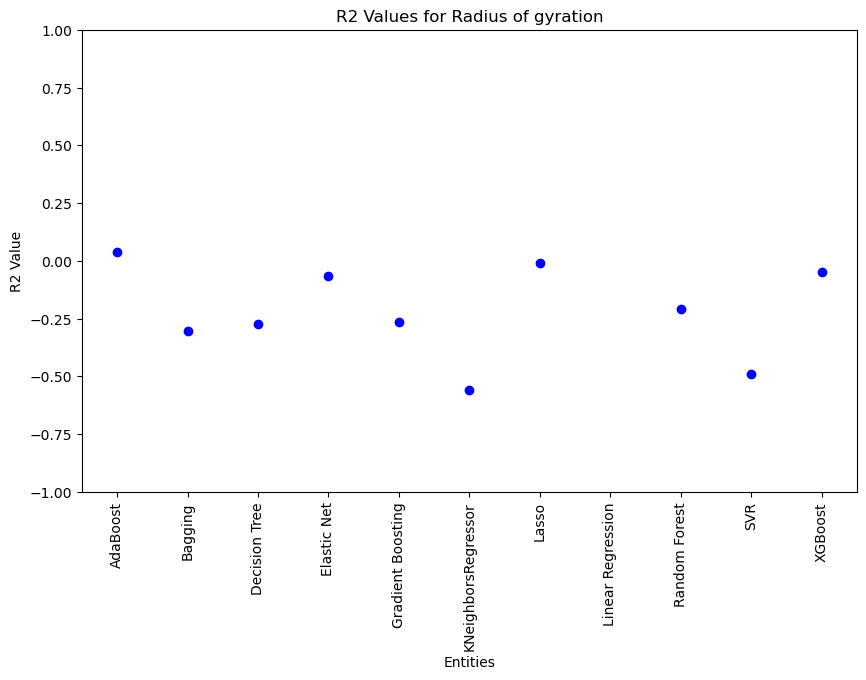

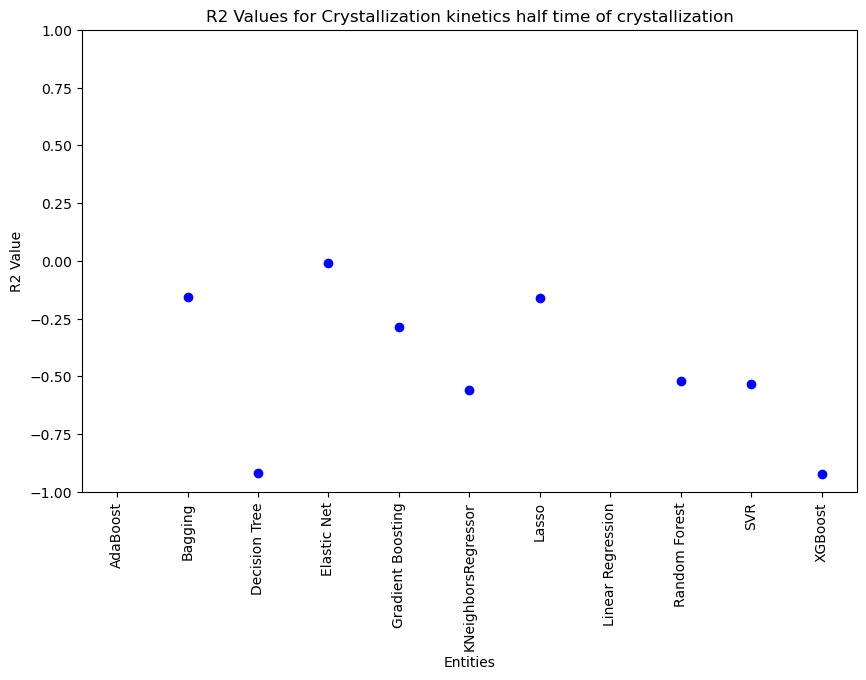

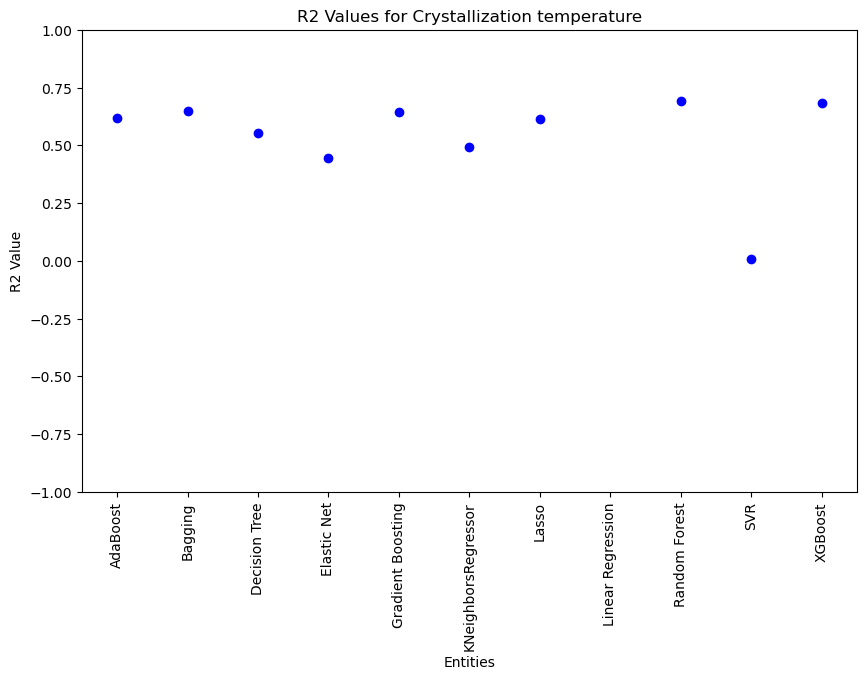

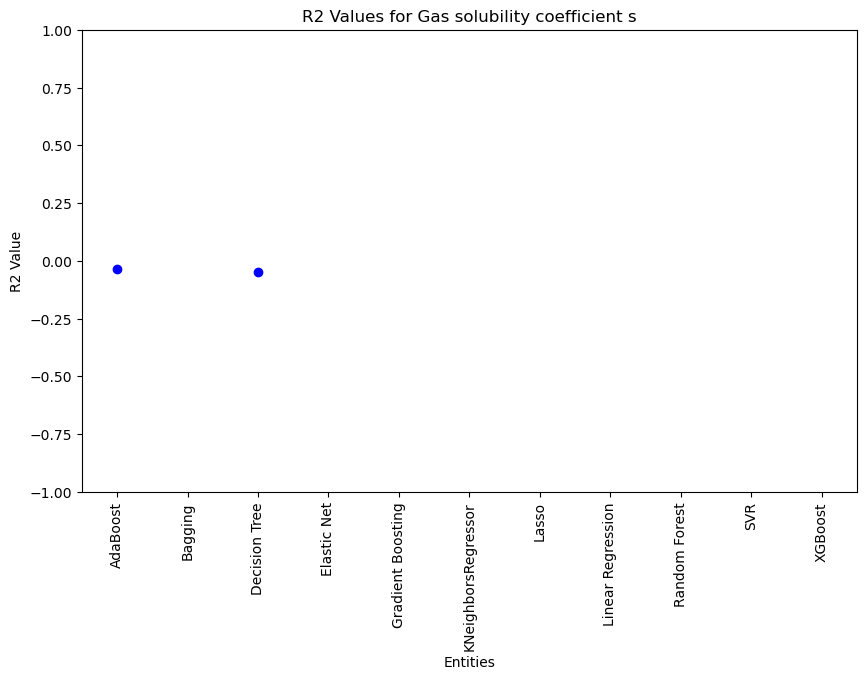

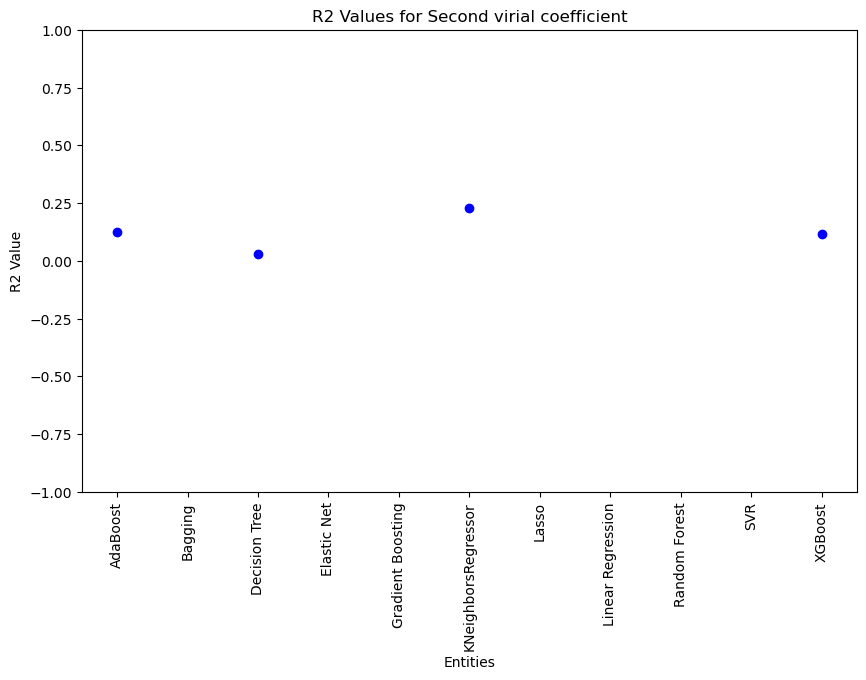

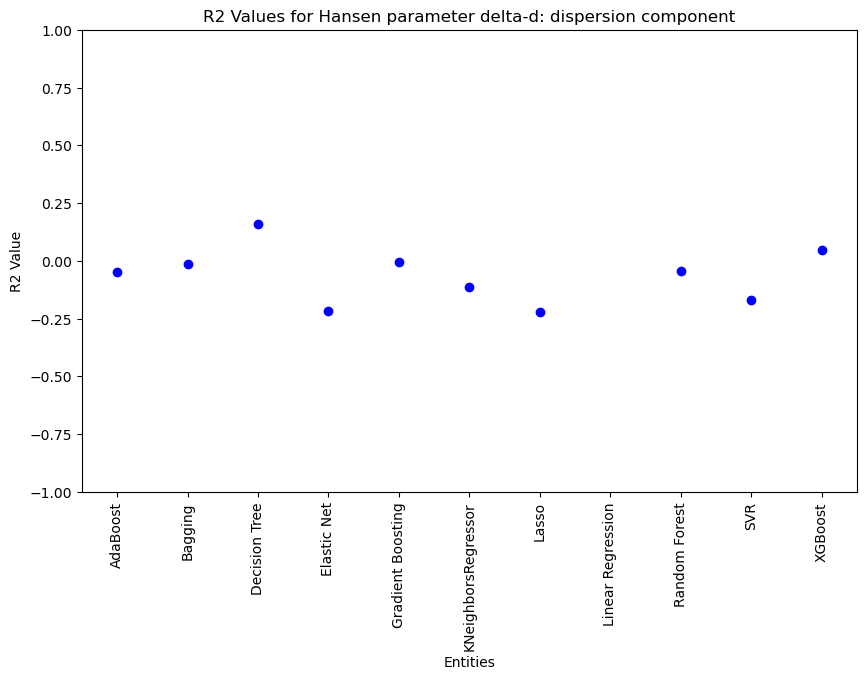

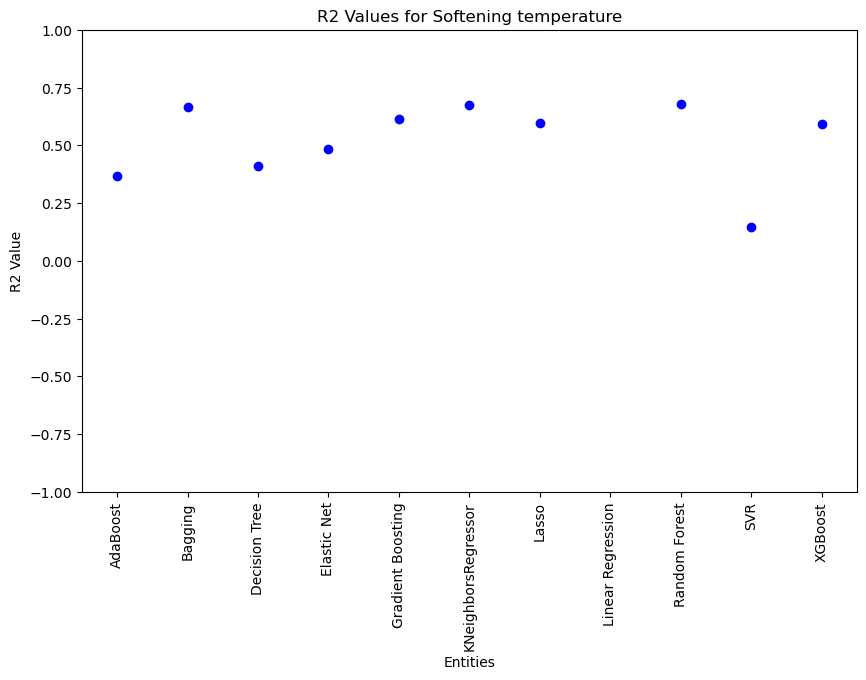

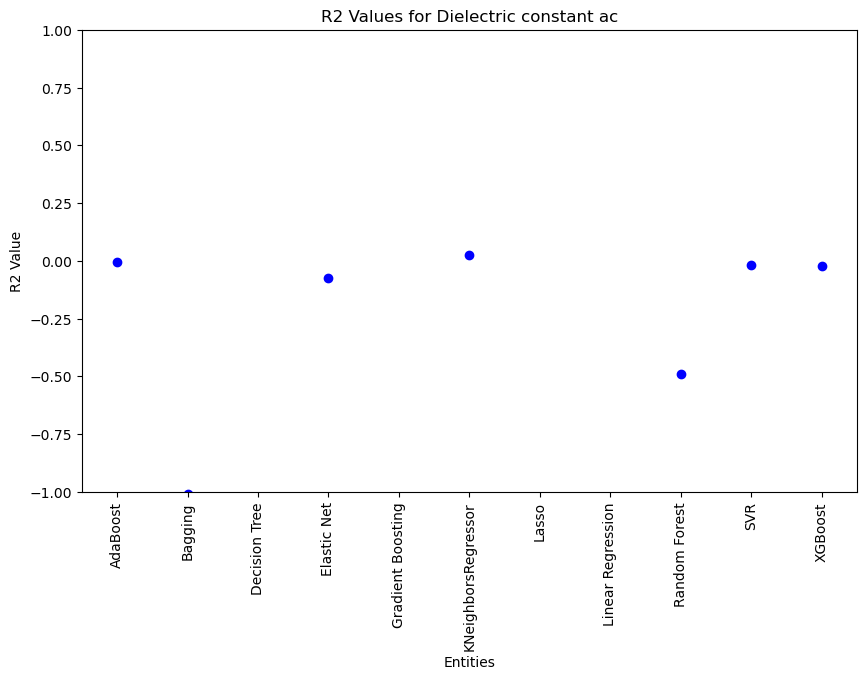

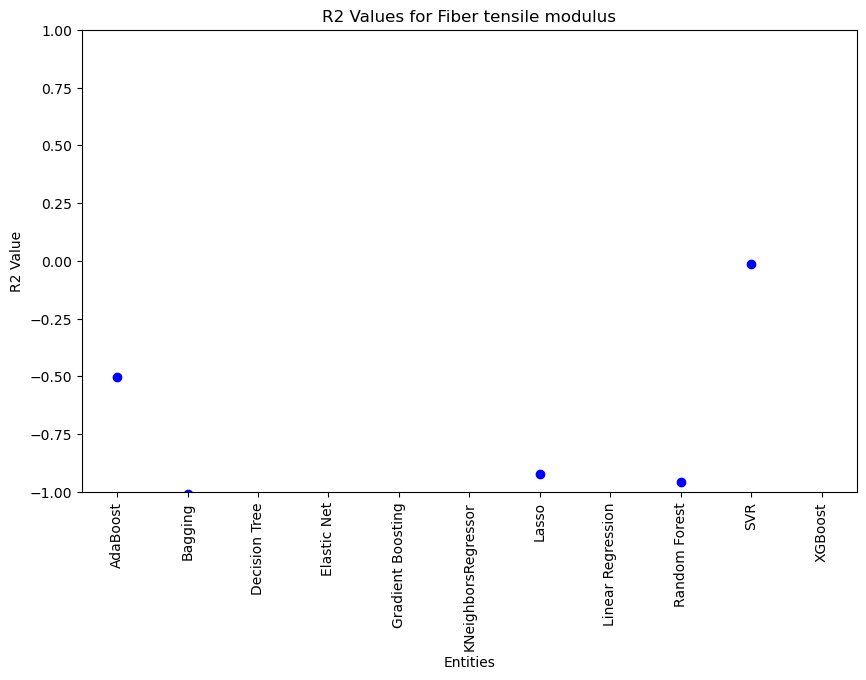

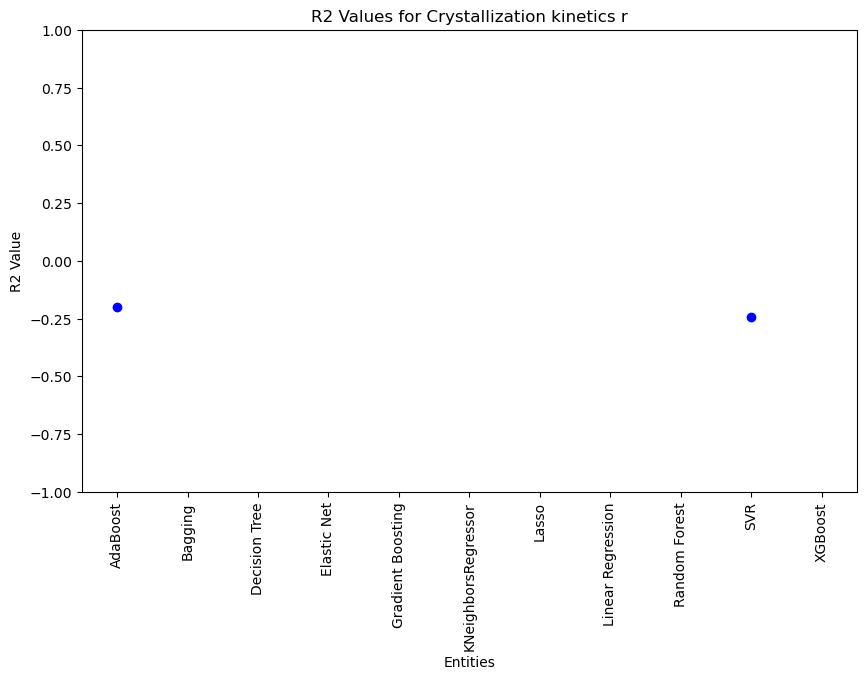

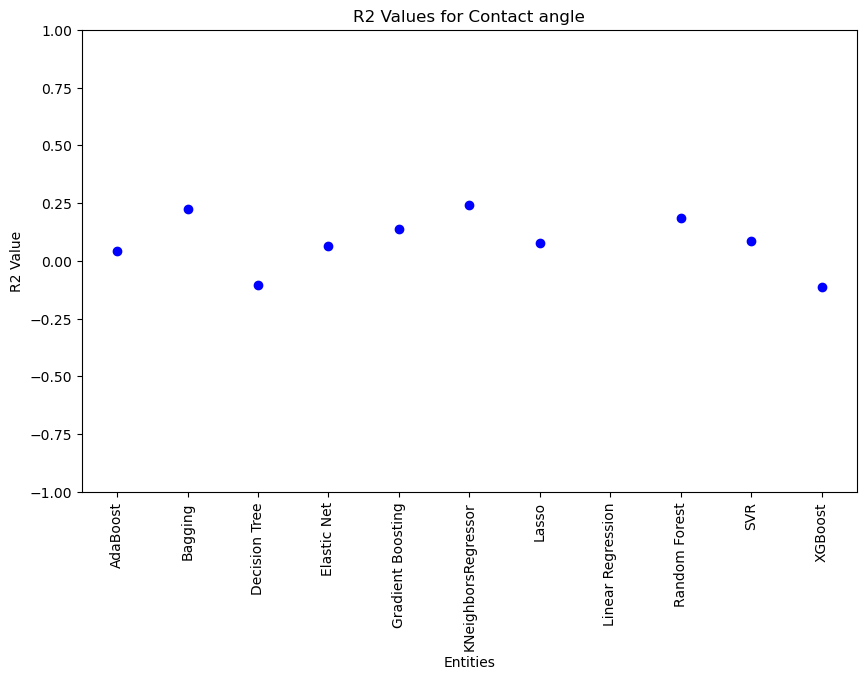

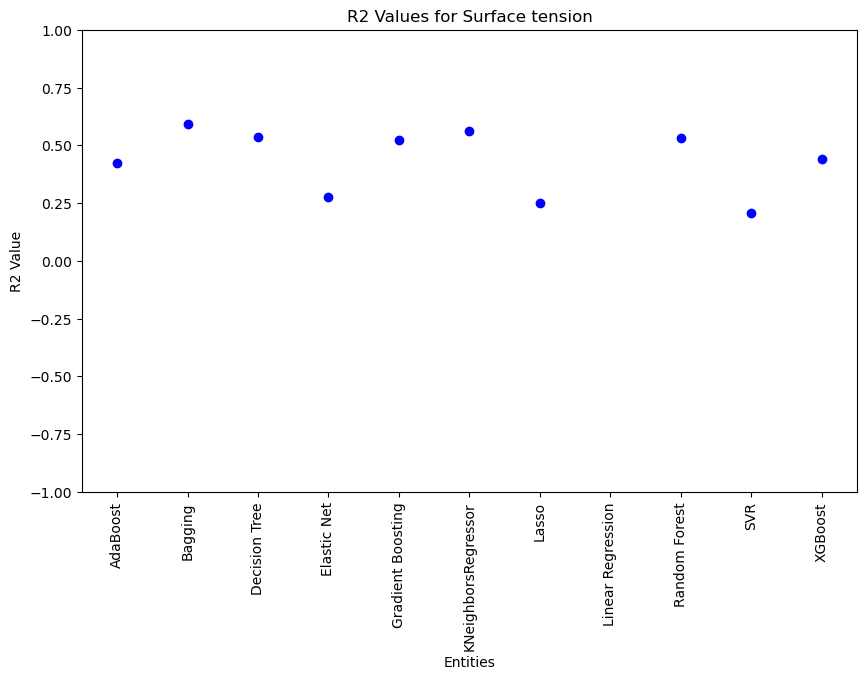

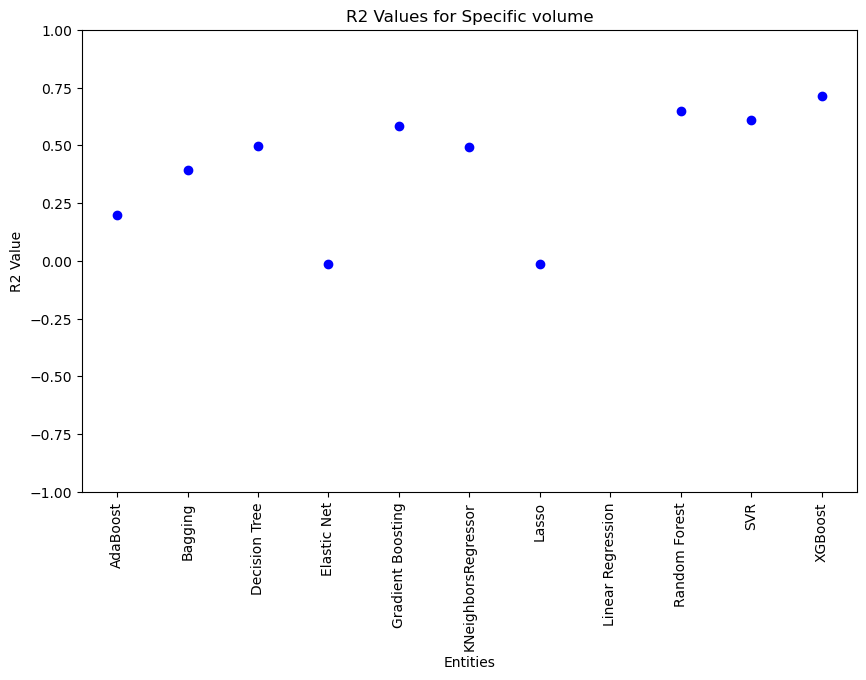

In [68]:
import matplotlib.pyplot as plt

# Iterate through each name in result_dict
for name, entity_dict in result_dict.items():
    # Extract entities and corresponding R2 values
    entities = list(entity_dict.keys())
    r2_values = list(entity_dict.values())

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.scatter(entities, r2_values, color='blue')
    plt.title(f'R2 Values for {name}')
    plt.xlabel('Entities')
    plt.ylabel('R2 Value')
    plt.ylim(-1, 1)  # Adjust the y-axis limits if needed
    plt.xticks(rotation=90)
    plt.show()


In [79]:
import pandas as pd

# Create an empty DataFrame to store the results
table_data = {'Charactristic': [], 'Regressor': [], 'Min NMSE': []}
for high_level_key, entity_dict in result_dict.items():
    # Find the lower-level key with the max R2 value
    max_entity = min(entity_dict, key=entity_dict.get)
    max_r2_value = entity_dict[max_entity]

    # Append data to the table_data dictionary
    table_data['Charactristic'].append(high_level_key)
    table_data['Regressor'].append(max_entity)
    table_data['Min NMSE'].append(max_r2_value)

# Create a DataFrame from the table_data
result_table = pd.DataFrame(table_data)

# Display the result_table
result_table

Charactristic            Regressor  Min NMSE
0                         Thermal conductivity    Gradient Boosting  0.872919
1   Dynamic mechanical properties loss tangent    Gradient Boosting  0.475030
2            Thermal decomposition temperature        Random Forest  0.274382
3   Hansen parameter delta-h: hydrogen bonding             AdaBoost  0.411516
4                             Flexural modulus        Random Forest  0.522062
..                                         ...                  ...       ...
63                       Fiber tensile modulus                  SVR  1.011367
64                  Crystallization kinetics r             AdaBoost  1.199474
65                               Contact angle  KNeighborsRegressor  0.758268
66                             Surface tension              Bagging  0.406006
67                             Specific volume              XGBoost  0.287346

[68 rows x 3 columns]

In [93]:
best_NMSE = result_table[result_table['Min NMSE']<0.5]#.shape

In [90]:
result_table.shape

(68, 3)

In [80]:
result_table.to_excel('min_NMSE.xlsx')#[result_table['Max $R^2$']>0.5]#.shape

In [84]:
r2_table = pd.read_excel('max_R2.xlsx')

In [95]:
r2_best = r2_table[r2_table['Max $R^2$']>0.5].drop('Unnamed: 0', axis=1)
r2_best['NMSE'] = best_NMSE['Min NMSE']

In [102]:
r2_best['Max $R^2$'] = r2_best['Max $R^2$'].round(2)

In [103]:
r2_best['NMSE'] = r2_best['NMSE'].round(2)

In [5]:
data = list_of_dfs[5][1]
data

Data Size                                        Name           MSE  \
0          80                        Thermal conductivity  3.164134e-02   
1         301  Dynamic mechanical properties loss tangent  2.816818e-01   
2        6325           Thermal decomposition temperature  3.774505e+03   
3          59  Hansen parameter delta-h: hydrogen bonding  1.382237e+01   
4          83                            Flexural modulus  1.476671e+01   
..        ...                                         ...           ...   
63         74                       Fiber tensile modulus  6.681067e+03   
64         53                  Crystallization kinetics r  1.353927e+08   
65        255                               Contact angle  2.277655e+02   
66        348                             Surface tension  6.859090e+01   
67       1739                             Specific volume  8.619929e-03   

            R2          RMSE        NMSE          MAE            MPE   Overall  
0    -3.871672      0.177880    4.871672     0.098837      77.144525  0.400000  
1     0.294627      0.530737    0.705373     0.361926     193.757675  0.230769  
2     0.668462     61.436999    0.331538    41.426355       6.547767  0.943953  
3     0.360865      3.717845    0.639135     2.950667      68.706544  0.000000  
4    -0.492477      3.842748    1.492477     2.320985      63.890962  0.428571  
..         ...           ...         ...          ...            ...       ...  
63   -3.804689     81.737797    4.804689    56.648125     112.655038  0.750000  
64 -174.772928  11635.835576  175.772928  8937.743333  119457.763829  0.250000  
65    0.241732     15.091903    0.758268    12.310577       6.215002  0.769231  
66    0.562093      8.281962    0.437907     5.614857       5.263455  0.812500  
67    0.494610      0.092844    0.505390     0.061054       4.119176  0.015152  

[68 rows x 9 columns]

In [3]:
import pandas as pd
r2_best = pd.read_csv('best_res.csv')
r2_best

Unnamed: 0                               Charactristic  \
0            0  Dynamic mechanical properties loss tangent   
1            1           Thermal decomposition temperature   
2            2  Hansen parameter delta-h: hydrogen bonding   
3            3                 Vicat softening temperature   
4            4                Pvt relation specific volume   
5            5                    Water vapor transmission   
6            6             Lc phase transition temperature   
7            7                         Melting temperature   
8            8              Hansen parameter delta p polar   
9            9                  Crystallization kinetics k   
10          10                     Cohesive energy density   
11          11                Glass transition temperature   
12          12    Dynamic shear properties storage modulus   
13          13                     Heat of crystallization   
14          14                                     Density   
15          15                         Elongation at break   
16          16                 Isothermal weight loss time   
17          17                     Intrinsic viscosity eta   
18          18          Isothermal weight loss temperature   
19          19                        Solubility parameter   
20          20       Deflection temperature under load hdt   
21          21      Fiber tensile stress strength at break   
22          22                     Brittleness temperature   
23          23                            Refractive index   
24          24                                Oxygen index   
25          25                       Pvt relation pressure   
26          26                         Thermal diffusivity   
27          27                 Crystallization temperature   
28          28                       Softening temperature   
29          29                             Surface tension   
30          30                             Specific volume   

              Regressor  Max $R^2$  NMSE  Data Size  
0     Gradient Boosting       0.52  0.48        301  
1         Random Forest       0.73  0.27       6325  
2              AdaBoost       0.59  0.41         59  
3     Gradient Boosting       0.67  0.33         82  
4         Decision Tree       0.78  0.22         56  
5                   SVR       0.73  0.27         73  
6         Random Forest       0.79  0.21        961  
7         Random Forest       0.71  0.29       3844  
8               Bagging       0.90  0.10         59  
9               XGBoost       0.97  0.03         59  
10              XGBoost       0.82  0.18        324  
11        Random Forest       0.88  0.12       8092  
12  KNeighborsRegressor       0.51  0.49        141  
13        Random Forest       0.65  0.35        124  
14              XGBoost       0.56  0.44       1739  
15    Gradient Boosting       0.55  0.45       1139  
16              XGBoost       0.86  0.14        228  
17    Gradient Boosting       0.74  0.26       1978  
18              XGBoost       0.97  0.03        273  
19              XGBoost       0.77  0.23        324  
20        Random Forest       0.61  0.39         99  
21        Decision Tree       0.63  0.37         91  
22  KNeighborsRegressor       0.67  0.33         81  
23              XGBoost       0.73  0.27        685  
24              XGBoost       0.65  0.35        176  
25        Decision Tree       0.96  0.04         53  
26              Bagging       0.94  0.06         80  
27        Random Forest       0.69  0.31        457  
28        Random Forest       0.68  0.32        777  
29              Bagging       0.59  0.41        348  
30              XGBoost       0.71  0.29       1739

In [6]:
merged_df = pd.merge(r2_best, data[['Name', 'Data Size']], how='left', left_on='Charactristic', right_on='Name')

# Drop the redundant 'Name' column
merged_df = merged_df.drop(columns=['Name'])

In [12]:
merged_df.drop(['Unnamed: 0', 'Data Size_y'], axis=1, inplace=True)#.to_csv('best_res.csv')

In [11]:
merged_df = merged_df.sort_values(by='Data Size_x', ascending=False)
merged_df

Unnamed: 0                               Charactristic  \
11          11                Glass transition temperature   
1            1           Thermal decomposition temperature   
7            7                         Melting temperature   
17          17                     Intrinsic viscosity eta   
30          30                             Specific volume   
14          14                                     Density   
15          15                         Elongation at break   
6            6             Lc phase transition temperature   
28          28                       Softening temperature   
23          23                            Refractive index   
27          27                 Crystallization temperature   
29          29                             Surface tension   
19          19                        Solubility parameter   
10          10                     Cohesive energy density   
0            0  Dynamic mechanical properties loss tangent   
18          18          Isothermal weight loss temperature   
16          16                 Isothermal weight loss time   
24          24                                Oxygen index   
12          12    Dynamic shear properties storage modulus   
13          13                     Heat of crystallization   
20          20       Deflection temperature under load hdt   
21          21      Fiber tensile stress strength at break   
3            3                 Vicat softening temperature   
22          22                     Brittleness temperature   
26          26                         Thermal diffusivity   
5            5                    Water vapor transmission   
8            8              Hansen parameter delta p polar   
2            2  Hansen parameter delta-h: hydrogen bonding   
9            9                  Crystallization kinetics k   
4            4                Pvt relation specific volume   
25          25                       Pvt relation pressure   

              Regressor  Max $R^2$  NMSE  Data Size_x  Data Size_y  
11        Random Forest       0.88  0.12         8092         8092  
1         Random Forest       0.73  0.27         6325         6325  
7         Random Forest       0.71  0.29         3844         3844  
17    Gradient Boosting       0.74  0.26         1978         1978  
30              XGBoost       0.71  0.29         1739         1739  
14              XGBoost       0.56  0.44         1739         1739  
15    Gradient Boosting       0.55  0.45         1139         1139  
6         Random Forest       0.79  0.21          961          961  
28        Random Forest       0.68  0.32          777          777  
23              XGBoost       0.73  0.27          685          685  
27        Random Forest       0.69  0.31          457          457  
29              Bagging       0.59  0.41          348          348  
19              XGBoost       0.77  0.23          324          324  
10              XGBoost       0.82  0.18          324          324  
0     Gradient Boosting       0.52  0.48          301          301  
18              XGBoost       0.97  0.03          273          273  
16              XGBoost       0.86  0.14          228          228  
24              XGBoost       0.65  0.35          176          176  
12  KNeighborsRegressor       0.51  0.49          141          141  
13        Random Forest       0.65  0.35          124          124  
20        Random Forest       0.61  0.39           99           99  
21        Decision Tree       0.63  0.37           91           91  
3     Gradient Boosting       0.67  0.33           82           82  
22  KNeighborsRegressor       0.67  0.33           81           81  
26              Bagging       0.94  0.06           80           80  
5                   SVR       0.73  0.27           73           73  
8               Bagging       0.90  0.10           59           59  
2              AdaBoost       0.59  0.41           59           59  
9               XG

In [14]:
merged_df.to_csv('best_res.csv')

In [15]:
merged_df

Charactristic            Regressor  \
11                Glass transition temperature        Random Forest   
1            Thermal decomposition temperature        Random Forest   
7                          Melting temperature        Random Forest   
17                     Intrinsic viscosity eta    Gradient Boosting   
30                             Specific volume              XGBoost   
14                                     Density              XGBoost   
15                         Elongation at break    Gradient Boosting   
6              Lc phase transition temperature        Random Forest   
28                       Softening temperature        Random Forest   
23                            Refractive index              XGBoost   
27                 Crystallization temperature        Random Forest   
29                             Surface tension              Bagging   
19                        Solubility parameter              XGBoost   
10                     Cohesive energy density              XGBoost   
0   Dynamic mechanical properties loss tangent    Gradient Boosting   
18          Isothermal weight loss temperature              XGBoost   
16                 Isothermal weight loss time              XGBoost   
24                                Oxygen index              XGBoost   
12    Dynamic shear properties storage modulus  KNeighborsRegressor   
13                     Heat of crystallization        Random Forest   
20       Deflection temperature under load hdt        Random Forest   
21      Fiber tensile stress strength at break        Decision Tree   
3                  Vicat softening temperature    Gradient Boosting   
22                     Brittleness temperature  KNeighborsRegressor   
26                         Thermal diffusivity              Bagging   
5                     Water vapor transmission                  SVR   
8               Hansen parameter delta p polar              Bagging   
2   Hansen parameter delta-h: hydrogen bonding             AdaBoost   
9                   Crystallization kinetics k              XGBoost   
4                 Pvt relation specific volume        Decision Tree   
25                       Pvt relation pressure        Decision Tree   

    Max $R^2$  NMSE  Data Size_x  
11       0.88  0.12         8092  
1        0.73  0.27         6325  
7        0.71  0.29         3844  
17       0.74  0.26         1978  
30       0.71  0.29         1739  
14       0.56  0.44         1739  
15       0.55  0.45         1139  
6        0.79  0.21          961  
28       0.68  0.32          777  
23       0.73  0.27          685  
27       0.69  0.31          457  
29       0.59  0.41          348  
19       0.77  0.23          324  
10       0.82  0.18          324  
0        0.52  0.48          301  
18       0.97  0.03          273  
16       0.86  0.14          228  
24       0.65  0.35          176  
12       0.51  0.49          141  
13       0.65  0.35          124  
20       0.61  0.39           99  
21       0.63  0.37           91  
3        0.67  0.33           82  
22       0.67  0.33           81  
26       0.94  0.06           80  
5        0.73  0.27           73  
8        0.90  0.10           59  
2        0.59  0.41           59  
9        0.97  0.03           59  
4        0.78  0.22           56  
25       0.96  0.04           53

In [23]:
list(merged_df['Charactristic'])

['Dynamic mechanical properties loss tangent',
 'Thermal decomposition temperature',
 'Hansen parameter delta-h: hydrogen bonding',
 'Vicat softening temperature',
 'Pvt relation specific volume',
 'Water vapor transmission',
 'Lc phase transition temperature',
 'Melting temperature',
 'Hansen parameter delta p polar',
 'Crystallization kinetics k',
 'Cohesive energy density',
 'Glass transition temperature',
 'Dynamic shear properties storage modulus',
 'Heat of crystallization',
 'Density',
 'Elongation at break',
 'Isothermal weight loss time',
 'Intrinsic viscosity eta',
 'Isothermal weight loss temperature',
 'Solubility parameter',
 'Deflection temperature under load hdt',
 'Fiber tensile stress strength at break',
 'Brittleness temperature',
 'Refractive index',
 'Oxygen index',
 'Pvt relation pressure',
 'Thermal diffusivity',
 'Crystallization temperature',
 'Softening temperature',
 'Surface tension',
 'Specific volume']

In [20]:
merged_df['Regressor'].value_counts()

XGBoost                9
Random Forest          8
Gradient Boosting      4
Decision Tree          3
Bagging                3
KNeighborsRegressor    2
AdaBoost               1
SVR                    1
Name: Regressor, dtype: int64

In [59]:
file_name = 'results_KNeighborsRegressor.xlsx'

# Split the file name by underscore and get the second part
entity = file_name.split('_')[1]

# Split the entity by dot and get the first part
parsed_entity = entity.split('.')[0]

print(parsed_entity)


KNeighborsRegressor


C:\Users\ivan\AppData\Local\Temp\ipykernel_2572\1215840604.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df_to_plot, ignore_index=True)


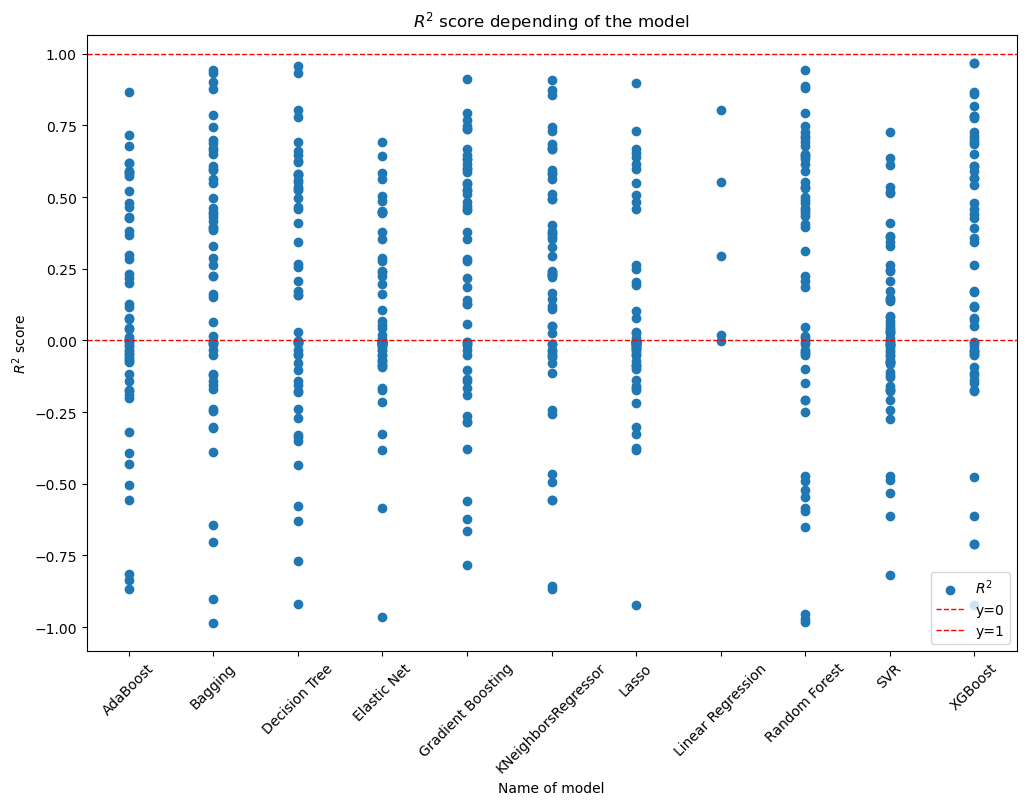

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming list_of_dfs is already populated
all_data = pd.DataFrame()

for d in range(len(list_of_dfs)):
    index_to_plot = d
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Add a column with the parsed entity name
    df_to_plot['Entity'] = parsed_entity

    # Append the data to the combined DataFrame
    all_data = all_data.append(df_to_plot, ignore_index=True)

# Set a range for the y-axis to avoid extreme values
y_axis_lower_limit = -1  # Set your desired lower limit
y_axis_upper_limit = 1.1   # Set your desired upper limit

# Filter values within the specified range
filtered_df = all_data[(all_data['R2'] >= y_axis_lower_limit) & (all_data['R2'] <= y_axis_upper_limit)]

# Create a scatter plot
plt.scatter(filtered_df['Entity'], filtered_df['R2'], label=f'$R^2$', marker='o')

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending of the model')
plt.xlabel('Name of model')
plt.ylabel('$R^2$ score')

# Add legend
plt.legend()

# Set a white background
plt.gca().set_facecolor('white')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Show the plot
plt.show()


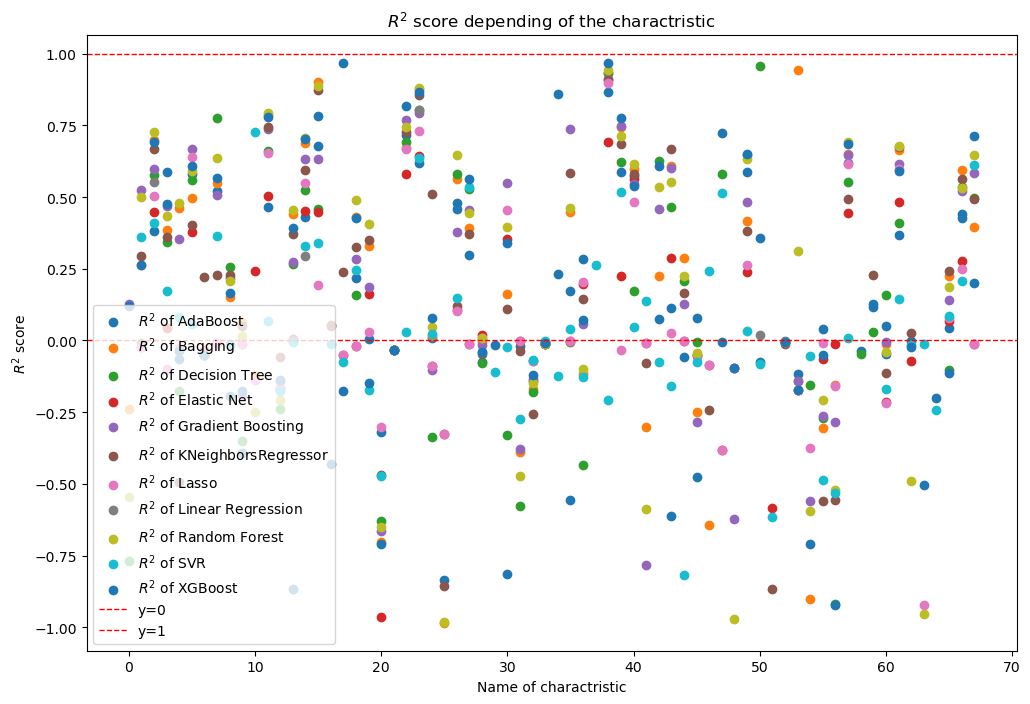

In [37]:
import matplotlib.pyplot as plt

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Create a scatter plot
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker='o')

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending of the charactristic')
plt.xlabel('Name of charactristic')
plt.ylabel('$R^2$ score')

# Add legend
plt.legend()

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Show the plot
plt.show()


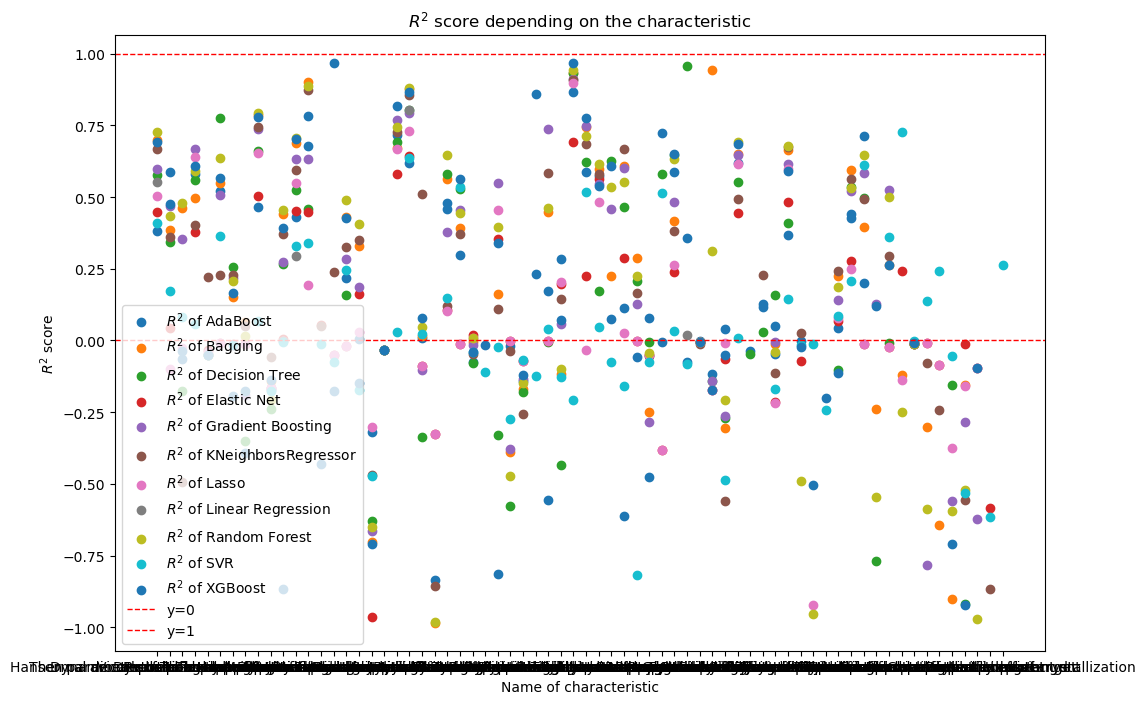

In [38]:
import matplotlib.pyplot as plt

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Create a scatter plot using 'Name' as x-axis labels
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker='o')

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Add legend
plt.legend()

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Show the plot
plt.show()


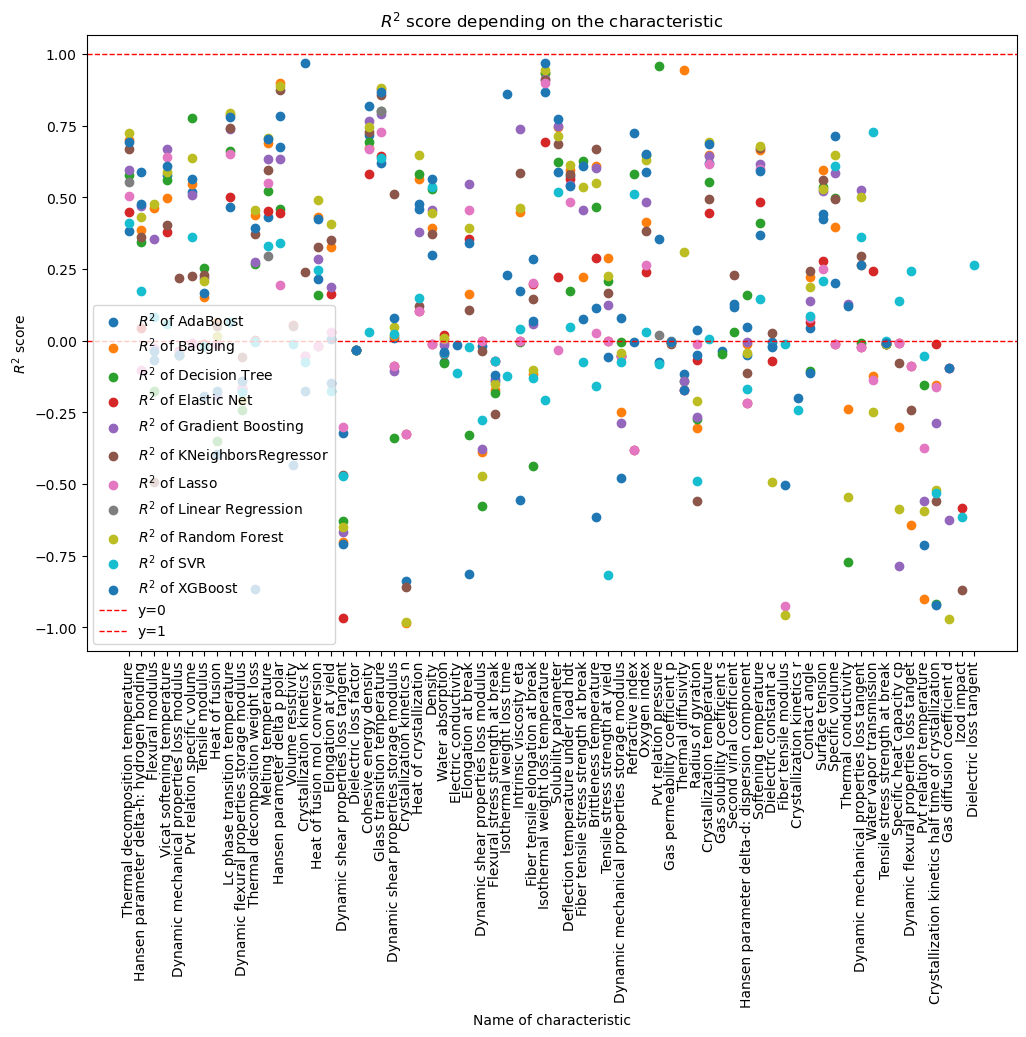

In [39]:
import matplotlib.pyplot as plt

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Create a scatter plot using 'Name' as x-axis labels
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker='o')

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Show the plot
plt.show()


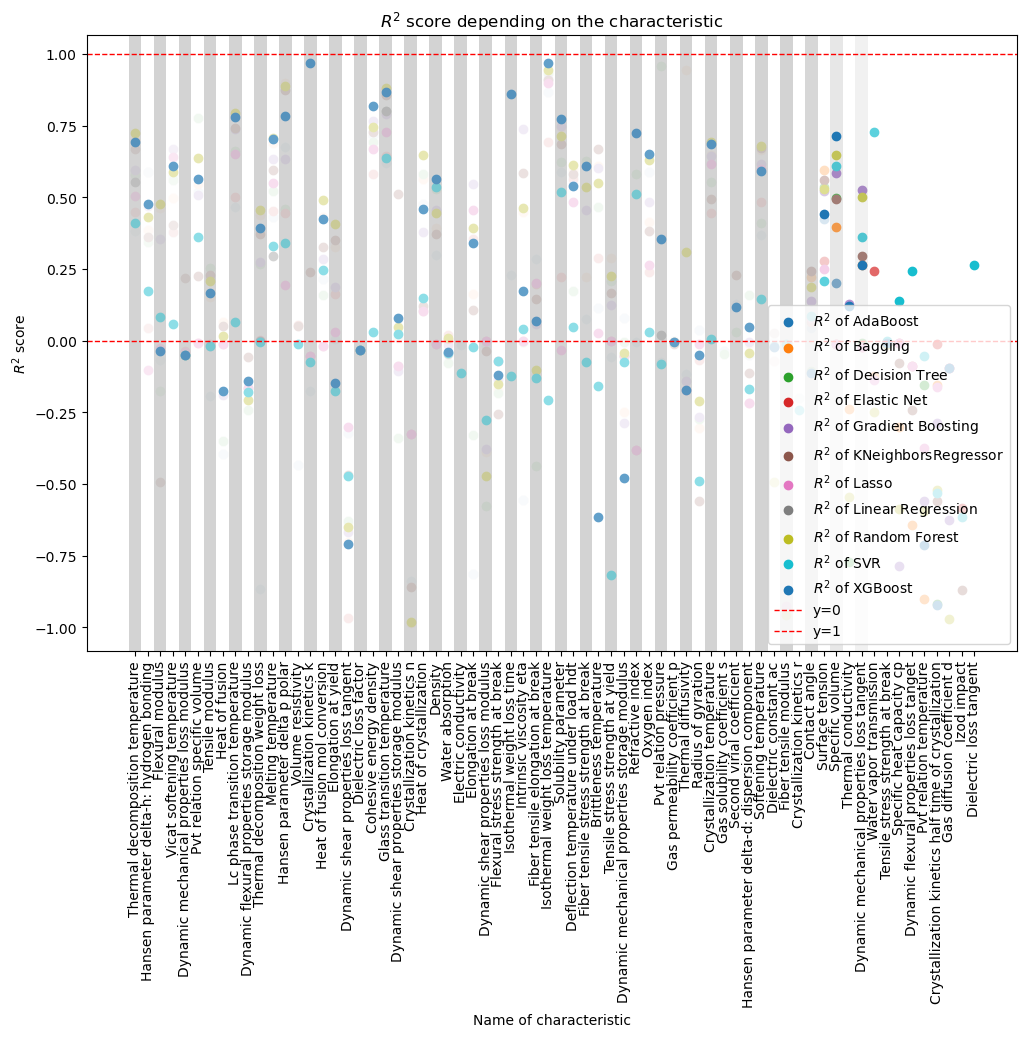

In [40]:
import matplotlib.pyplot as plt

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Create a scatter plot using 'Name' as x-axis labels
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker='o')

    # Create a zebra-like transparent background
    for i, index_name in enumerate(filtered_df.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Show the plot
plt.show()


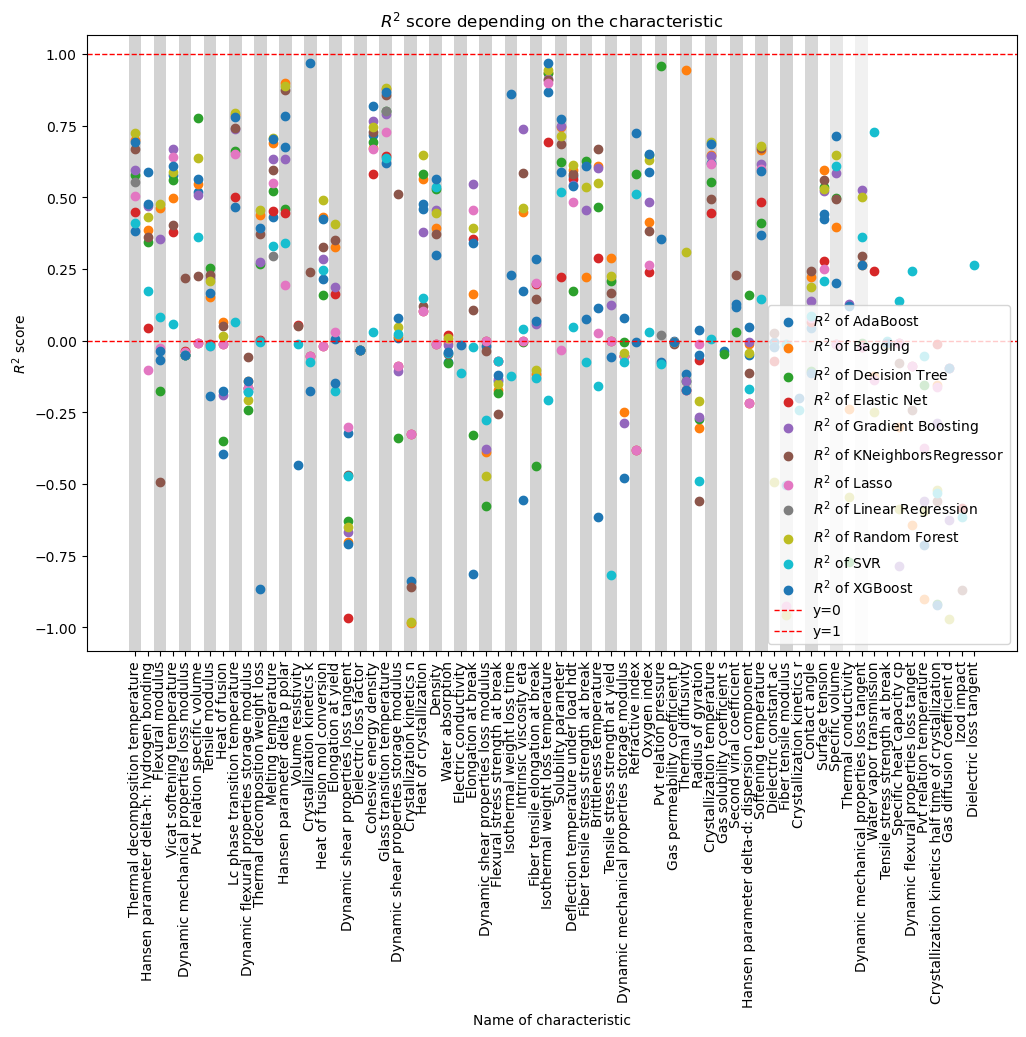

In [2]:
import matplotlib.pyplot as plt

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Create a scatter plot using 'Name' as x-axis labels
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker='o')

    # Add zebra-like background
    for i, index_name in enumerate(filtered_df.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Show the plot
plt.show()


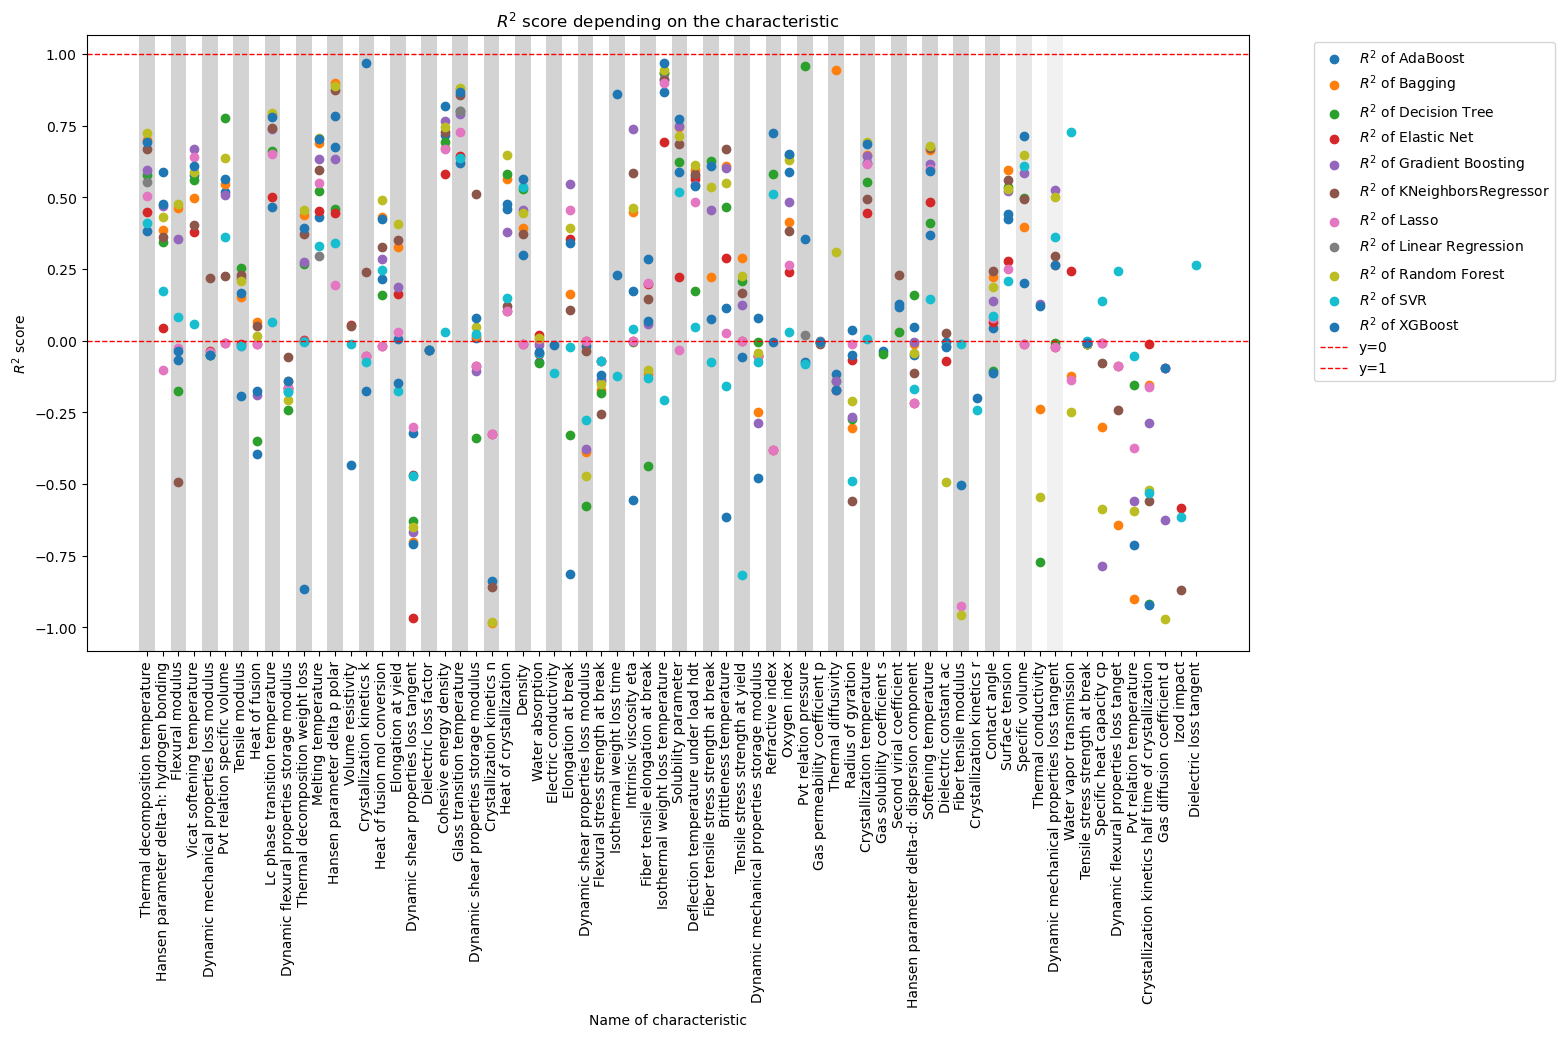

In [52]:
import matplotlib.pyplot as plt

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Create a scatter plot using 'Name' as x-axis labels
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker='o')

    # Add zebra-like background
    for i, index_name in enumerate(filtered_df.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size
plt.gcf().set_size_inches(15, 8)

# Save the plot to a file
plt.savefig('output_plot.png', bbox_inches='tight')

# Show the plot
plt.show()


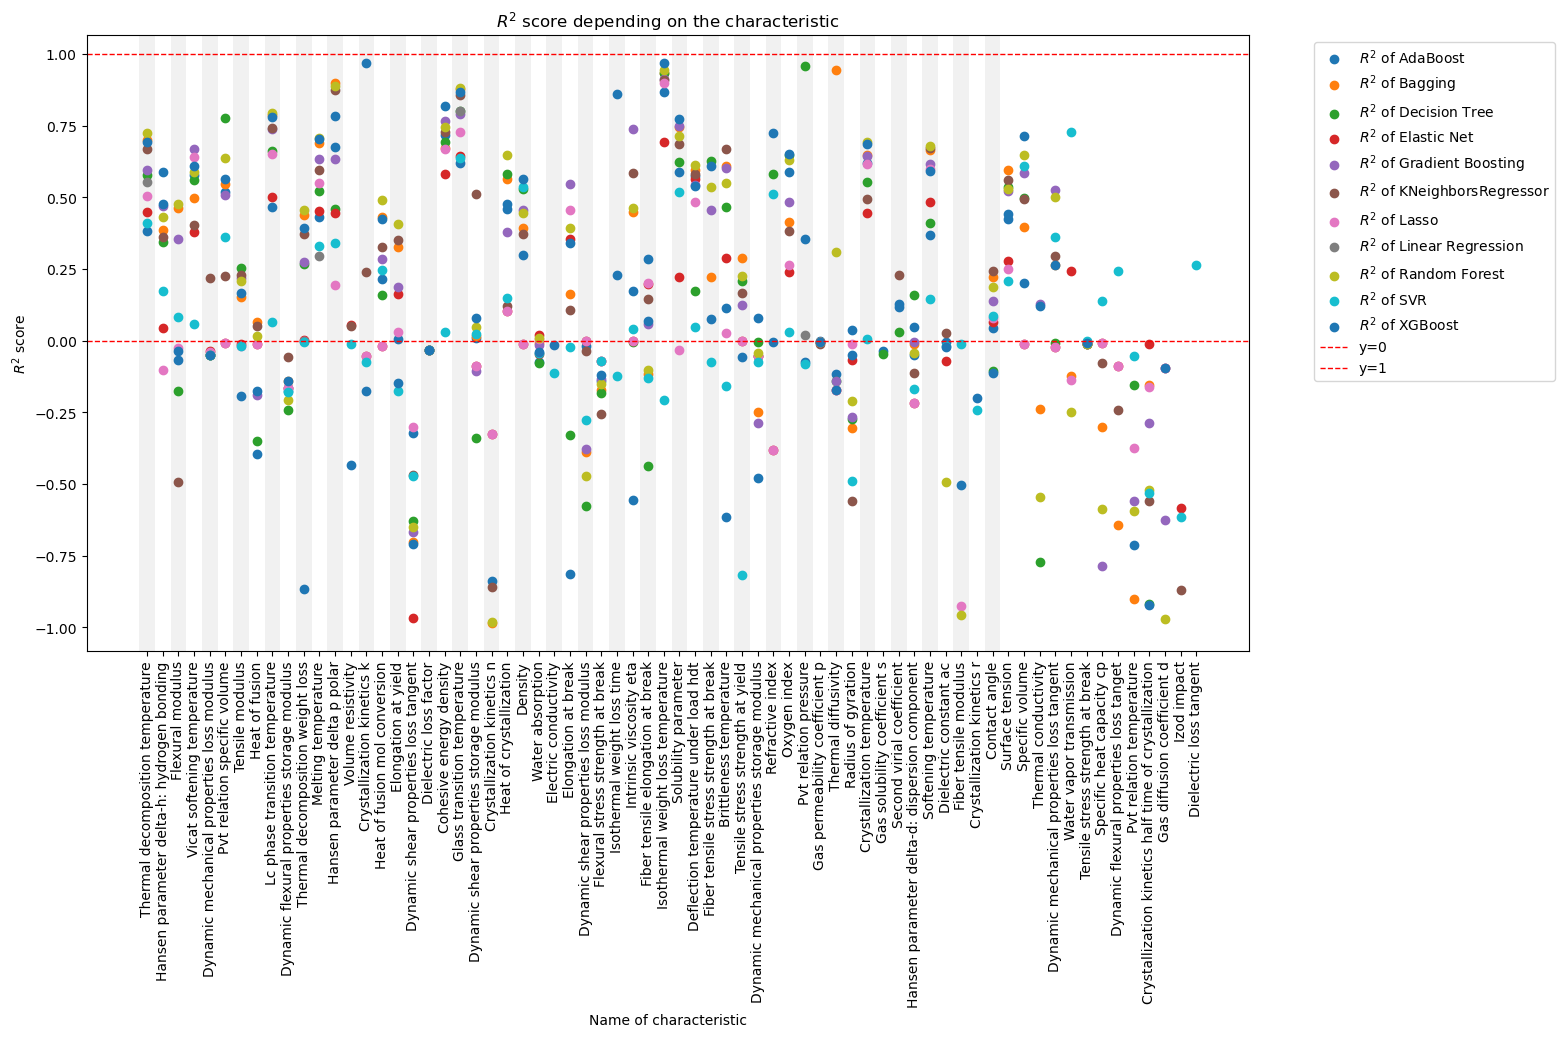

In [49]:
import matplotlib.pyplot as plt

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Create a scatter plot using 'Name' as x-axis labels
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker='o')

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Add zebra-like background
for i, index_name in enumerate(filtered_df.index):
    color = 'lightgray' if i % 2 == 0 else 'white'
    plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size
plt.gcf().set_size_inches(15, 8)

# Save the plot to a file
plt.savefig('output_plot.png', bbox_inches='tight')

# Show the plot
plt.show()


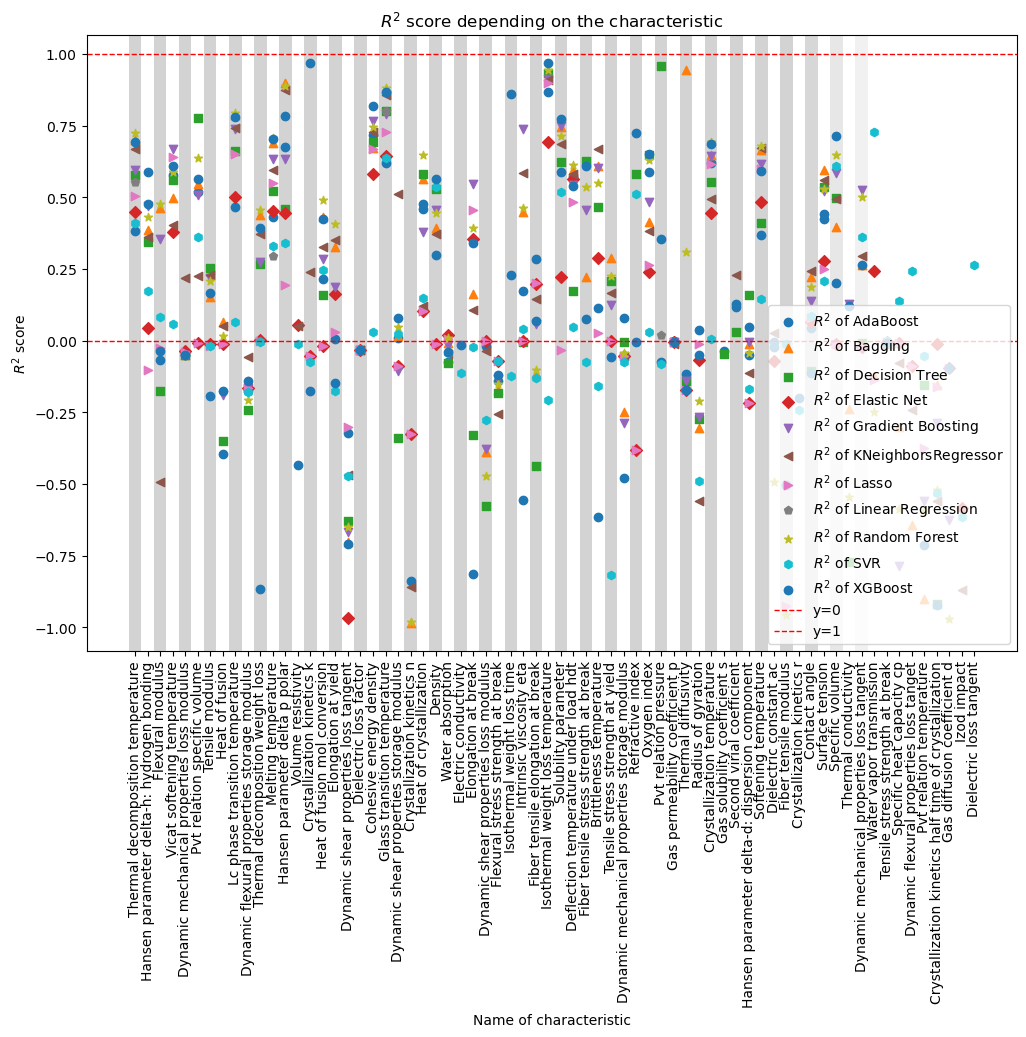

In [4]:
import matplotlib.pyplot as plt

# Define a sequence of markers
markers = ['o', '^', 's', 'D', 'v', '<', '>', 'p', '*', 'h']

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Get the marker for the current plot
    current_marker = markers[d % len(markers)]

    # Create a scatter plot using 'Name' as x-axis labels and the current marker
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker=current_marker)

    # Add zebra-like background
    for i, index_name in enumerate(filtered_df.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Show the plot
plt.show()


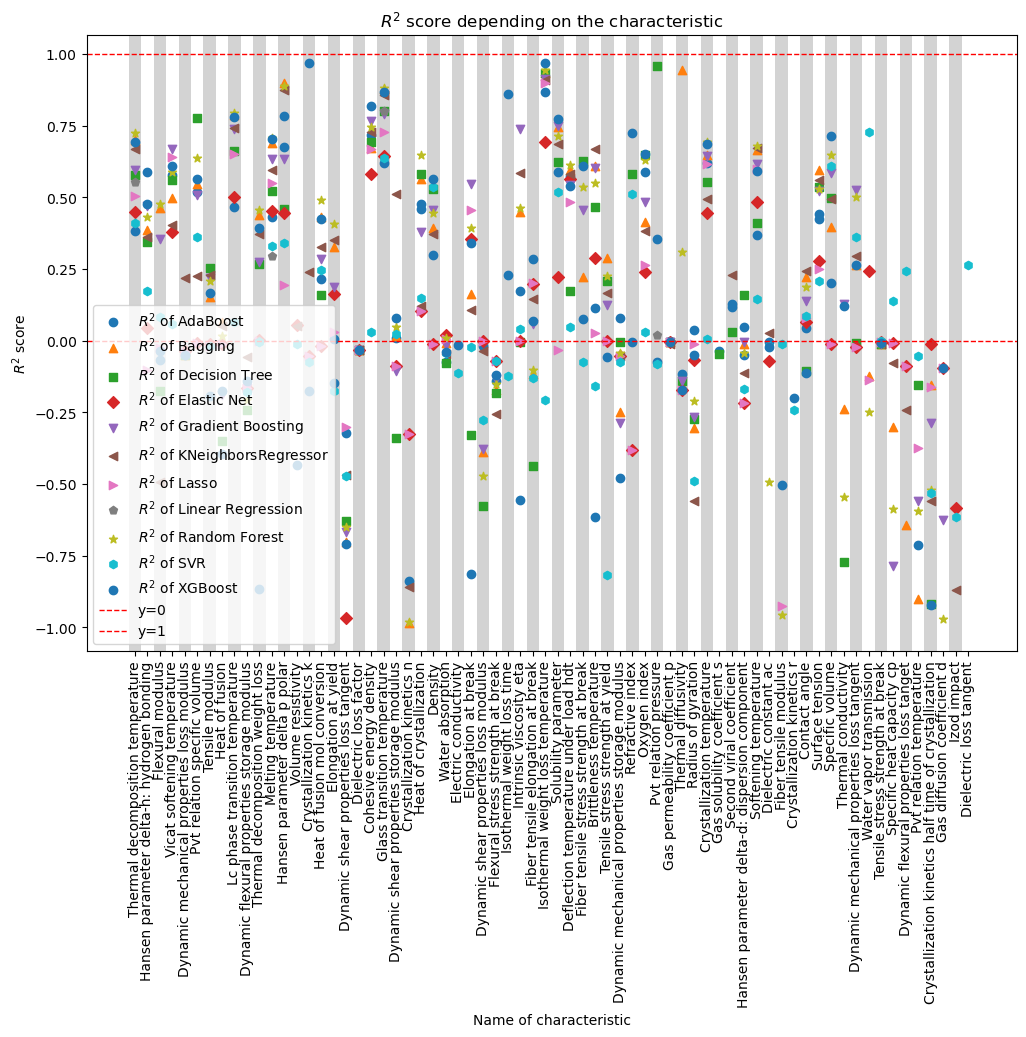

In [12]:
import matplotlib.pyplot as plt

# Define a sequence of markers
markers = ['o', '^', 's', 'D', 'v', '<', '>', 'p', '*', 'h']

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Get the marker for the current plot
    current_marker = markers[d % len(markers)]

    # Create a scatter plot using 'Name' as x-axis labels and the current marker
    plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker=current_marker)

    # Add zebra-like background
    for i, index_name in enumerate(df_to_plot.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        # Adjust the span to cover the entire area between x-axis ticks
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Show the plot
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


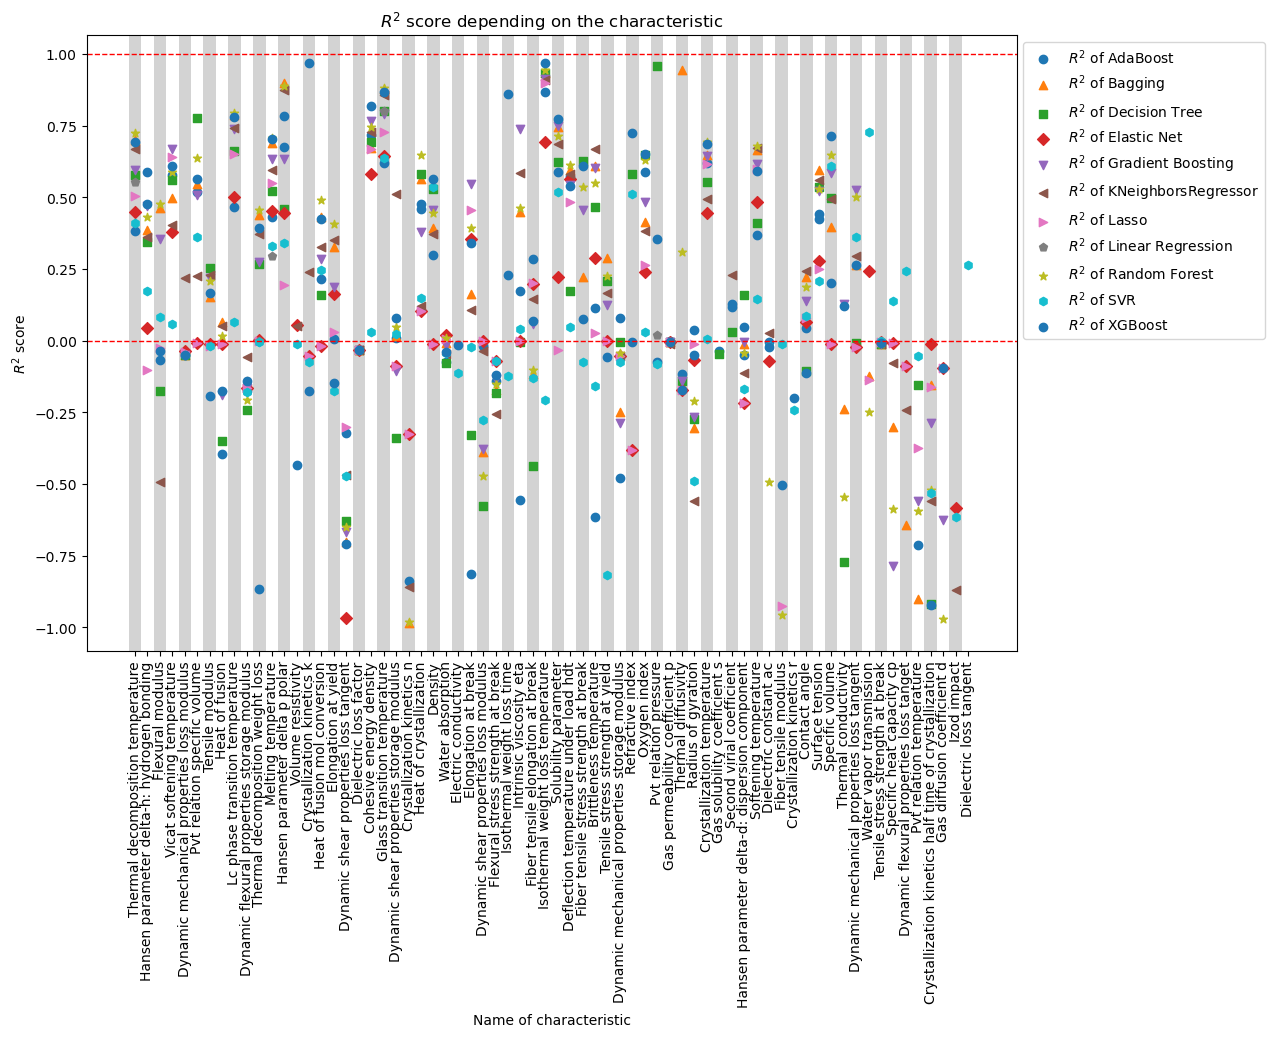

In [13]:
import matplotlib.pyplot as plt

# Define a sequence of markers
markers = ['o', '^', 's', 'D', 'v', '<', '>', 'p', '*', 'h']

# Create an empty list to store legend handles and labels
legend_handles = []

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Get the marker for the current plot
    current_marker = markers[d % len(markers)]

    # Create a scatter plot using 'Name' as x-axis labels and the current marker
    scatter = plt.scatter(filtered_df.index, filtered_df['R2'], label=f'$R^2$ of {parsed_entity}', marker=current_marker)

    # Add zebra-like background
    for i, index_name in enumerate(df_to_plot.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        # Adjust the span to cover the entire area between x-axis ticks
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

    # Append the scatter plot handle to the legend_handles list
    legend_handles.append(scatter)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('$R^2$ score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('$R^2$ score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend outside the plot
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Save the figure with an explicit bounding box
plt.savefig('r2_all.eps', bbox_inches='tight', format='eps', dpi=300)
# Show the plot
plt.show()


In [14]:
df_to_plot[(df_to_plot['R2'] >= y_axis_lower_limit) & (df_to_plot['R2'] <= y_axis_upper_limit)]

Data Size                                               Name  \
0          80                               Thermal conductivity   
1         301         Dynamic mechanical properties loss tangent   
2        6325                  Thermal decomposition temperature   
3          59         Hansen parameter delta-h: hydrogen bonding   
4          83                                   Flexural modulus   
5          82                        Vicat softening temperature   
6         203         Dynamic mechanical properties loss modulus   
7          56                       Pvt relation specific volume   
8        1103                                    Tensile modulus   
9         623                                     Heat of fusion   
11        961                    Lc phase transition temperature   
12         78        Dynamic flexural properties storage modulus   
13       5236                  Thermal decomposition weight loss   
14       3844                                Melting temperature   
15         59                     Hansen parameter delta p polar   
17         59                         Crystallization kinetics k   
18        225                      Heat of fusion mol conversion   
19         84                                Elongation at yield   
20        106              Dynamic shear properties loss tangent   
21        311                             Dielectric loss factor   
22        324                            Cohesive energy density   
23       8092                       Glass transition temperature   
24        141           Dynamic shear properties storage modulus   
26        124                            Heat of crystallization   
27       1739                                            Density   
28        724                                   Water absorption   
30       1139                                Elongation at break   
32         71                  Flexural stress strength at break   
33       1153                   Tensile stress strength at break   
34        228                        Isothermal weight loss time   
35       1978                            Intrinsic viscosity eta   
36         61                  Fiber tensile elongation at break   
38        273                 Isothermal weight loss temperature   
39        324                               Solubility parameter   
40         99              Deflection temperature under load hdt   
42         91             Fiber tensile stress strength at break   
43         81                            Brittleness temperature   
45        409      Dynamic mechanical properties storage modulus   
47        685                                   Refractive index   
48        444                        Gas diffusion coefficient d   
49        176                                       Oxygen index   
50         53                              Pvt relation pressure   
52        717                     Gas permeability coefficient p   
53         80                                Thermal diffusivity   
54         57                           Pvt relation temperature   
55        120                                 Radius of gyration   
56         72  Crystallization kinetics half time of crystall...   
57        457                        Crystallization temperature   
59        101                          Second virial coefficient   
60         60     Hansen parameter delta-d: dispersion component   
61        777                              Softening temperature   
62        763                             Dielectric constant ac   
65        255                                      Contact angle   
66        348                                    Surface tension   
67       1739                                    Specific volume   

             MSE        R2          RMSE      NMSE           MAE  \
0   5.714116e-03  0.120224  7.559177e-02  0.879776  5.660002e-02   
1   2.936899e-01  0.264557  5.419316e-01  0.735443  3.42080

In [7]:
import json

# Assuming you have a JSON file named 'example.json'
file_path = 'category_dict.json'

# Open the file and load JSON data
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

# Now, 'data' contains the parsed JSON data as a Python dictionary or list
data.keys()


dict_keys(['Compression characteristics', 'Creep characteristics', 'Dilute solution property', 'Electric property', 'Flexural property', 'Hardness', 'Heat characteristics', 'Heat resistance and combustion', 'Impact strength', 'Optical property', 'Other physical property', 'Physical property', 'Physicochemical property', 'Rheological property', 'Shear property', 'Tensile property', 'Thermal property'])

In [11]:
data

{'Compression characteristics': ['Compressive modulus',
  'Compressive stress strength at break',
  'Compressive stress strength at yield',
  'Dynamic compressive properties storage modulus',
  'Dynamic compressive properties loss tangent',
  'Dynamic compressive properties loss modulus'],
 'Creep characteristics': ['Tensile creep compliance',
  'Tensile creep modulus',
  'Tensile creep recovery',
  'Tensile creep rupture time',
  'Tensile creep strain',
  'Flexural creep strain',
  'Tensile creep rupture strength'],
 'Dilute solution property': ['Intrinsic viscosity eta',
  'Radius of gyration',
  'Second virial coefficient',
  'Diffusion coefficient',
  'Sedimentation coefficient'],
 'Electric property': ['Dielectric constant ac',
  'Dielectric loss factor',
  'Dielectric loss tangent',
  'Electric conductivity',
  'Surface resistivity',
  'Volume resistivity'],
 'Flexural property': ['Dynamic flexural properties storage modulus',
  'Dynamic flexural properties loss modulus',
  'Dyna

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


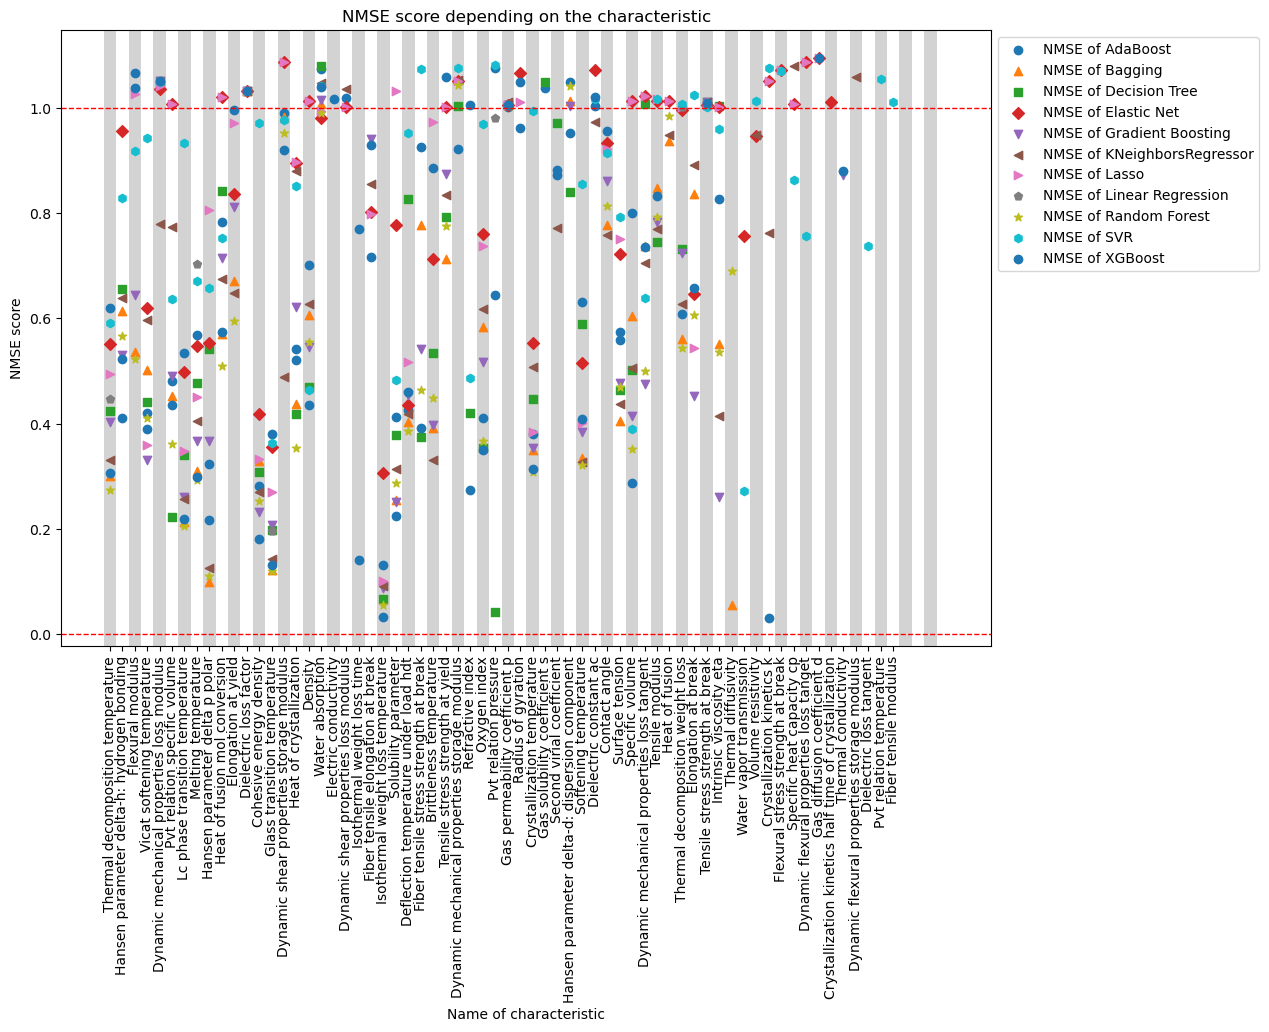

In [15]:
import matplotlib.pyplot as plt

# Define a sequence of markers
markers = ['o', '^', 's', 'D', 'v', '<', '>', 'p', '*', 'h']

# Create an empty list to store legend handles and labels
legend_handles = []

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -0.1  # Set your desired lower limit
    y_axis_upper_limit = 1.1   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['NMSE'] >= y_axis_lower_limit) & (df_to_plot['NMSE'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Get the marker for the current plot
    current_marker = markers[d % len(markers)]

    # Create a scatter plot using 'Name' as x-axis labels and the current marker
    scatter = plt.scatter(filtered_df.index, filtered_df['NMSE'], label=f'NMSE of {parsed_entity}', marker=current_marker)

    # Add zebra-like background
    for i, index_name in enumerate(df_to_plot.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        # Adjust the span to cover the entire area between x-axis ticks
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

    # Append the scatter plot handle to the legend_handles list
    legend_handles.append(scatter)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('NMSE score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('NMSE score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend outside the plot
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Save the figure with an explicit bounding box
plt.savefig('NMSE_all.eps', bbox_inches='tight', format='eps', dpi=300)
# Show the plot
plt.show()


In [ ]:
for i, index_name in enumerate(filtered_df.index):
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


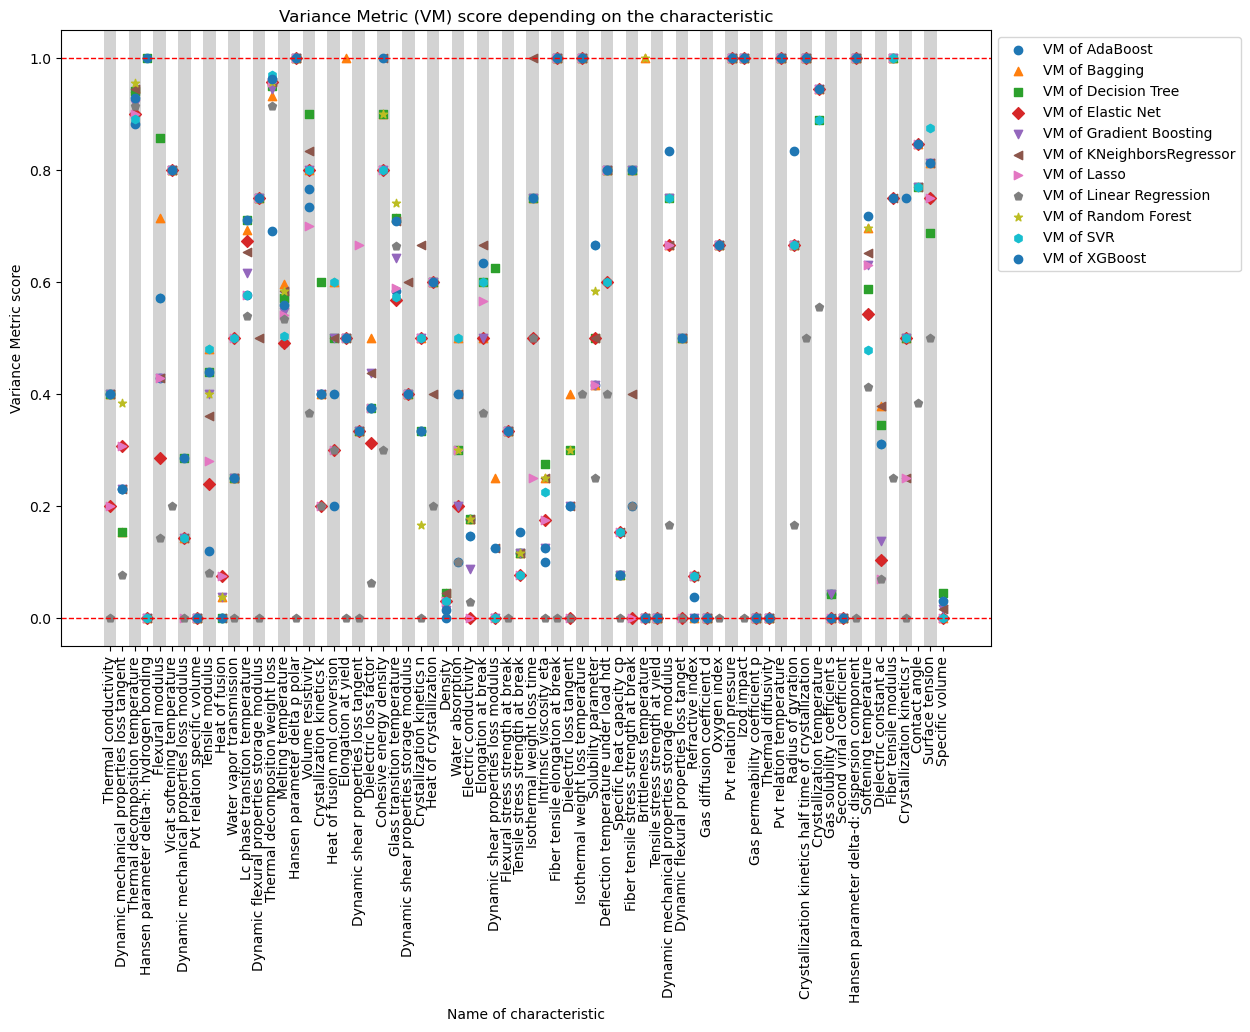

In [8]:
import matplotlib.pyplot as plt

# Define a sequence of markers
markers = ['o', '^', 's', 'D', 'v', '<', '>', 'p', '*', 'h']

# Create an empty list to store legend handles and labels
legend_handles = []

# Assuming list_of_dfs is already populated
for d in range(len(list_of_dfs)):
    index_to_plot = d
    
    df_to_plot = list_of_dfs[index_to_plot][1]
    file_name = list_of_dfs[index_to_plot][0]

    # Split the file name by underscore and get the second part
    entity = file_name.split('_')[1]

    # Split the entity by dot and get the first part
    parsed_entity = entity.split('.')[0]

    # Set a range for the y-axis to avoid extreme values
    y_axis_lower_limit = -0.05  # Set your desired lower limit
    y_axis_upper_limit = 1.05   # Set your desired upper limit

    # Filter values within the specified range
    filtered_df = df_to_plot[(df_to_plot['Overall'] >= y_axis_lower_limit) & (df_to_plot['Overall'] <= y_axis_upper_limit)]

    # Set 'Name' column as the index
    filtered_df.set_index('Name', inplace=True)

    # Get the marker for the current plot
    current_marker = markers[d % len(markers)]

    # Create a scatter plot using 'Name' as x-axis labels and the current marker
    scatter = plt.scatter(filtered_df.index, filtered_df['Overall'], label=f'VM of {parsed_entity}', marker=current_marker)

    # Add zebra-like background
    for i, index_name in enumerate(filtered_df.index):
        color = 'lightgray' if i % 2 == 0 else 'white'
        # Adjust the span to cover the entire area between x-axis ticks
        plt.axvspan(i - 0.5, i + 0.5, facecolor=color, alpha=0.3, zorder=-1)

    # Append the scatter plot handle to the legend_handles list
    legend_handles.append(scatter)

# Draw horizontal red lines at y=0 and y=1
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='y=0')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='y=1')

# Set labels and title
plt.title('Variance Metric (VM) score depending on the characteristic')
plt.xlabel('Name of characteristic')
plt.ylabel('Variance Metric score')

# Rotate the figure 90 degrees clockwise
plt.xticks(rotation=90)

# Add legend outside the plot
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

# Save the figure with an explicit bounding box
plt.savefig('VM_all.eps', bbox_inches='tight', format='eps', dpi=300)
# Show the plot
plt.show()


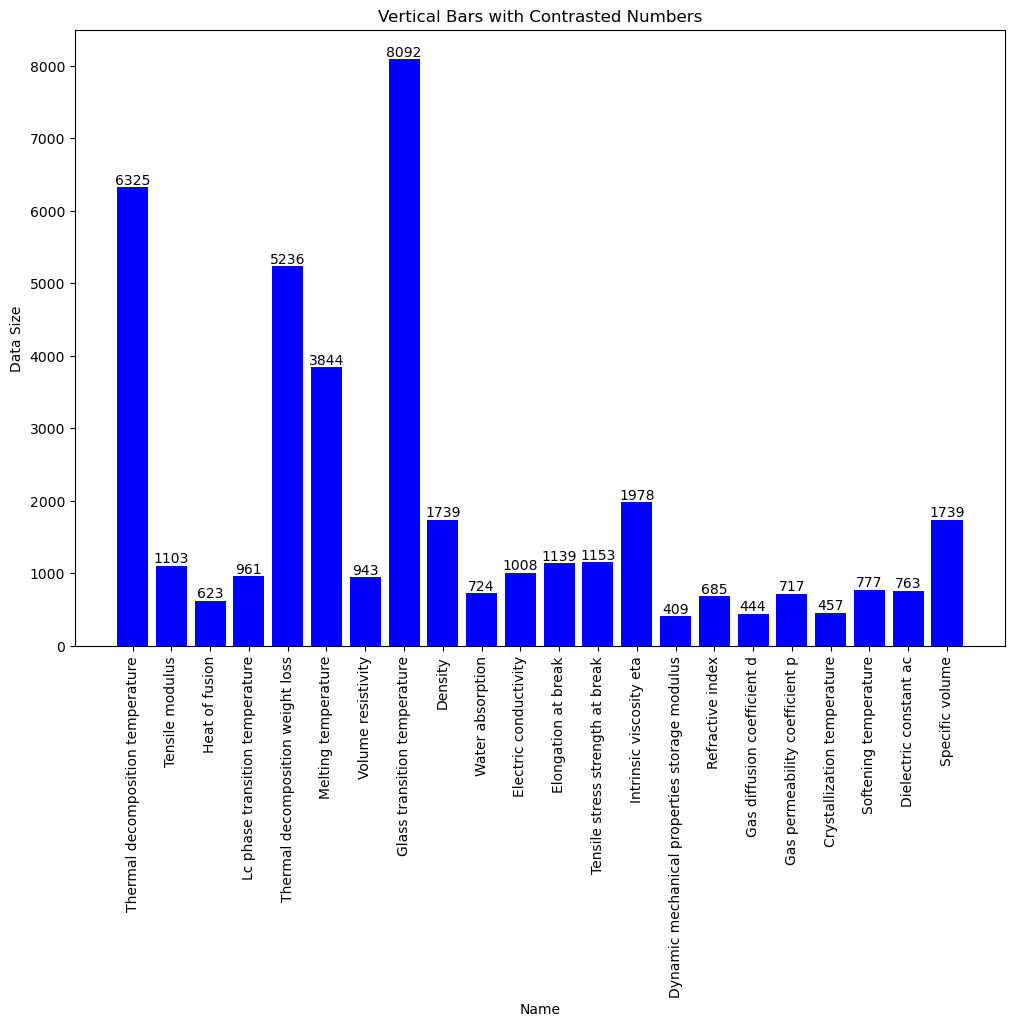

In [26]:
import matplotlib.pyplot as plt

# Assuming list_of_dfs is a list of dataframes
data_df = list_of_dfs[5][1]
data_df = data_df[data_df['Data Size']>400]
data_size = data_df['Data Size']
names = data_df['Name']

# Plotting the vertical bars
plt.bar(names, data_size, color='blue')

# Adding labels to the bars
for i, value in enumerate(data_size):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Name')
plt.ylabel('Data Size')
plt.title('Vertical Bars with Contrasted Numbers')

plt.xticks(rotation=90)
# Show the plot
# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)

plt.show()


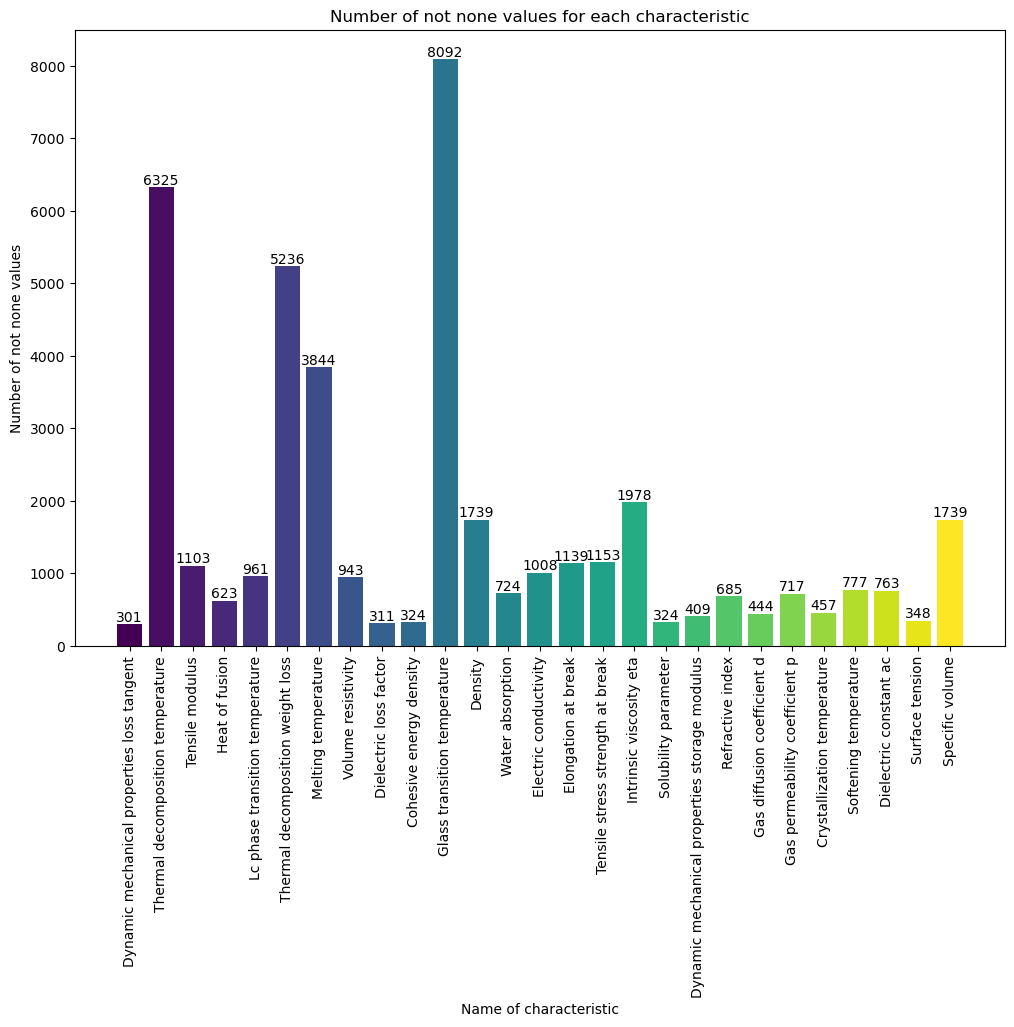

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming list_of_dfs is a list of dataframes
data_df = list_of_dfs[5][1]
data_df = data_df[data_df['Data Size']>300]
data_size = data_df['Data Size']
names = data_df['Name']

# Creating a gradient colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(data_size)))

# Plotting the vertical bars with gradient colors
bars = plt.bar(names, data_size, color=colors)

# Adding labels to the bars
for bar, value in zip(bars, data_size):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(value),
             ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Name of characteristic')
plt.ylabel('Number of not none values')
plt.title('Number of not none values for each characteristic')

plt.xticks(rotation=90)
# Show the plot
# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)
plt.savefig('300up_all.eps', bbox_inches='tight', format='eps', dpi=300)
plt.show()

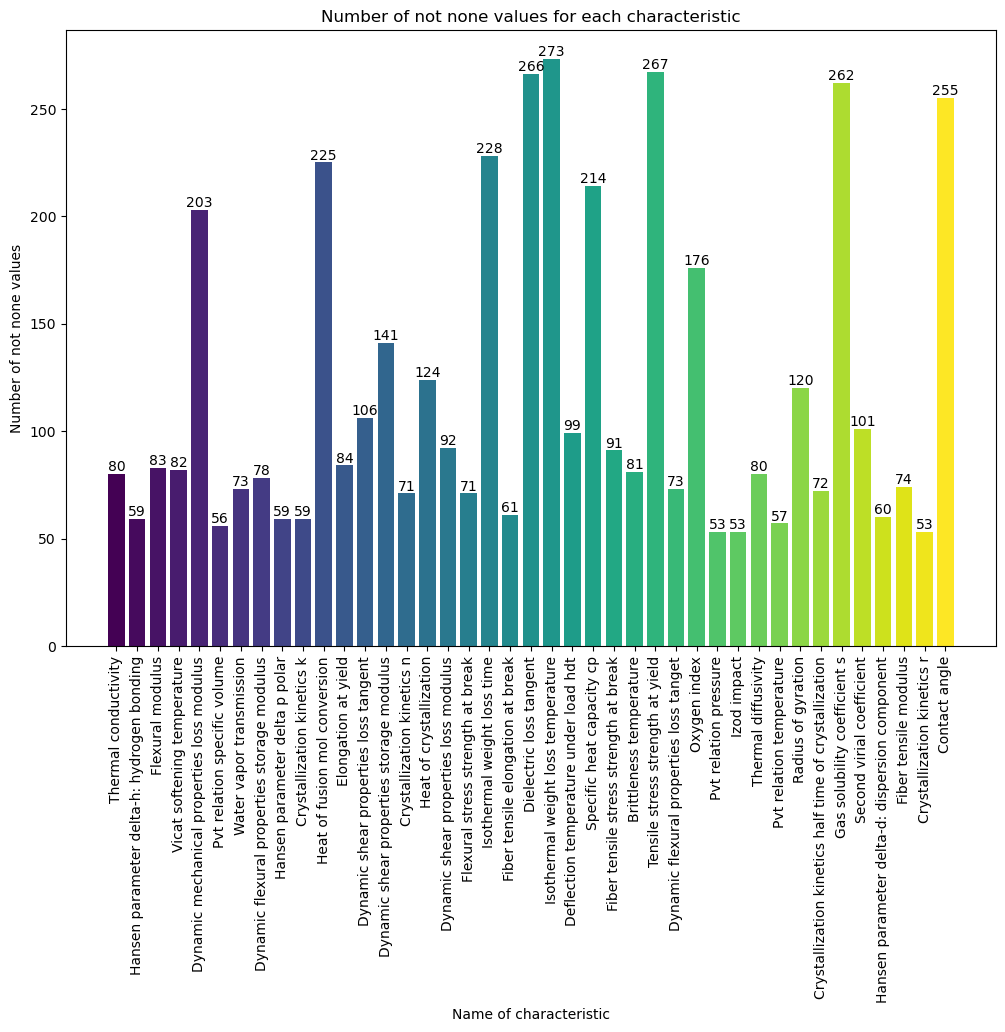

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming list_of_dfs is a list of dataframes
data_df = list_of_dfs[5][1]
data_df = data_df[data_df['Data Size']<300]
data_size = data_df['Data Size']
names = data_df['Name']

# Creating a gradient colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(data_size)))

# Plotting the vertical bars with gradient colors
bars = plt.bar(names, data_size, color=colors)

# Adding labels to the bars
for bar, value in zip(bars, data_size):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(value),
             ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Name of characteristic')
plt.ylabel('Number of not none values')
plt.title('Number of not none values for each characteristic')

plt.xticks(rotation=90)
# Show the plot
# Set a white background
plt.gca().set_facecolor('white')

# Adjust figure size if needed
# Adjust figure size if needed
plt.gcf().set_size_inches(12, 8)
plt.savefig('300down_all.eps', bbox_inches='tight', format='eps', dpi=300)
plt.show()

In [37]:
from rdkit import Chem
from rdkit.Chem import Draw

# SMILES notation for a polymer
polymer_smiles = "CC(=O)O[C@H]1C=C(C)C(=O)O1"

# Convert SMILES to RDKit molecule object
mol = Chem.MolFromSmiles(polymer_smiles)

# Draw the molecule
img = Draw.MolToImage(mol)

# Display the image
img.show()


In [38]:
import pandas as pd
poly_data = pd.read_excel('resulting_dataset.xlsx')
poly_data['SMILES']

0                                                      *C*
1                                                  *CC(C)*
2                                                 *CC(CC)*
3                                                CCCC(C*)*
4                                              *CC(C(C)C)*
                               ...                        
18307    *c1c(c2ccccc2)c(c2ccccc2)c(c2c1cc(cc2)C1(c2ccc...
18308    [Na]OS(=O)(=O)C(C(OC(C(OC(C(F)(F)*)(F)*)(F)F)(...
18309                                   *c1ccc(c2c1cccc2)*
18310       *C=C([As](c1ccccc1)*)c1ccc(cc1)C=C**1=CC=CC=C1
18311       *C=C([As](c1ccccc1)*)c1cccc(c1)C=C**1=CC=CC=C1
Name: SMILES, Length: 18312, dtype: object

In [43]:
poly_data['cu_formula']

0               CH2
1              C3H6
2              C4H8
3             C5H10
4             C5H10
            ...    
18307        C57H34
18308    C7F13NaO5S
18309         C10H4
18310     C22H16As2
18311     C22H16As2
Name: cu_formula, Length: 18312, dtype: object

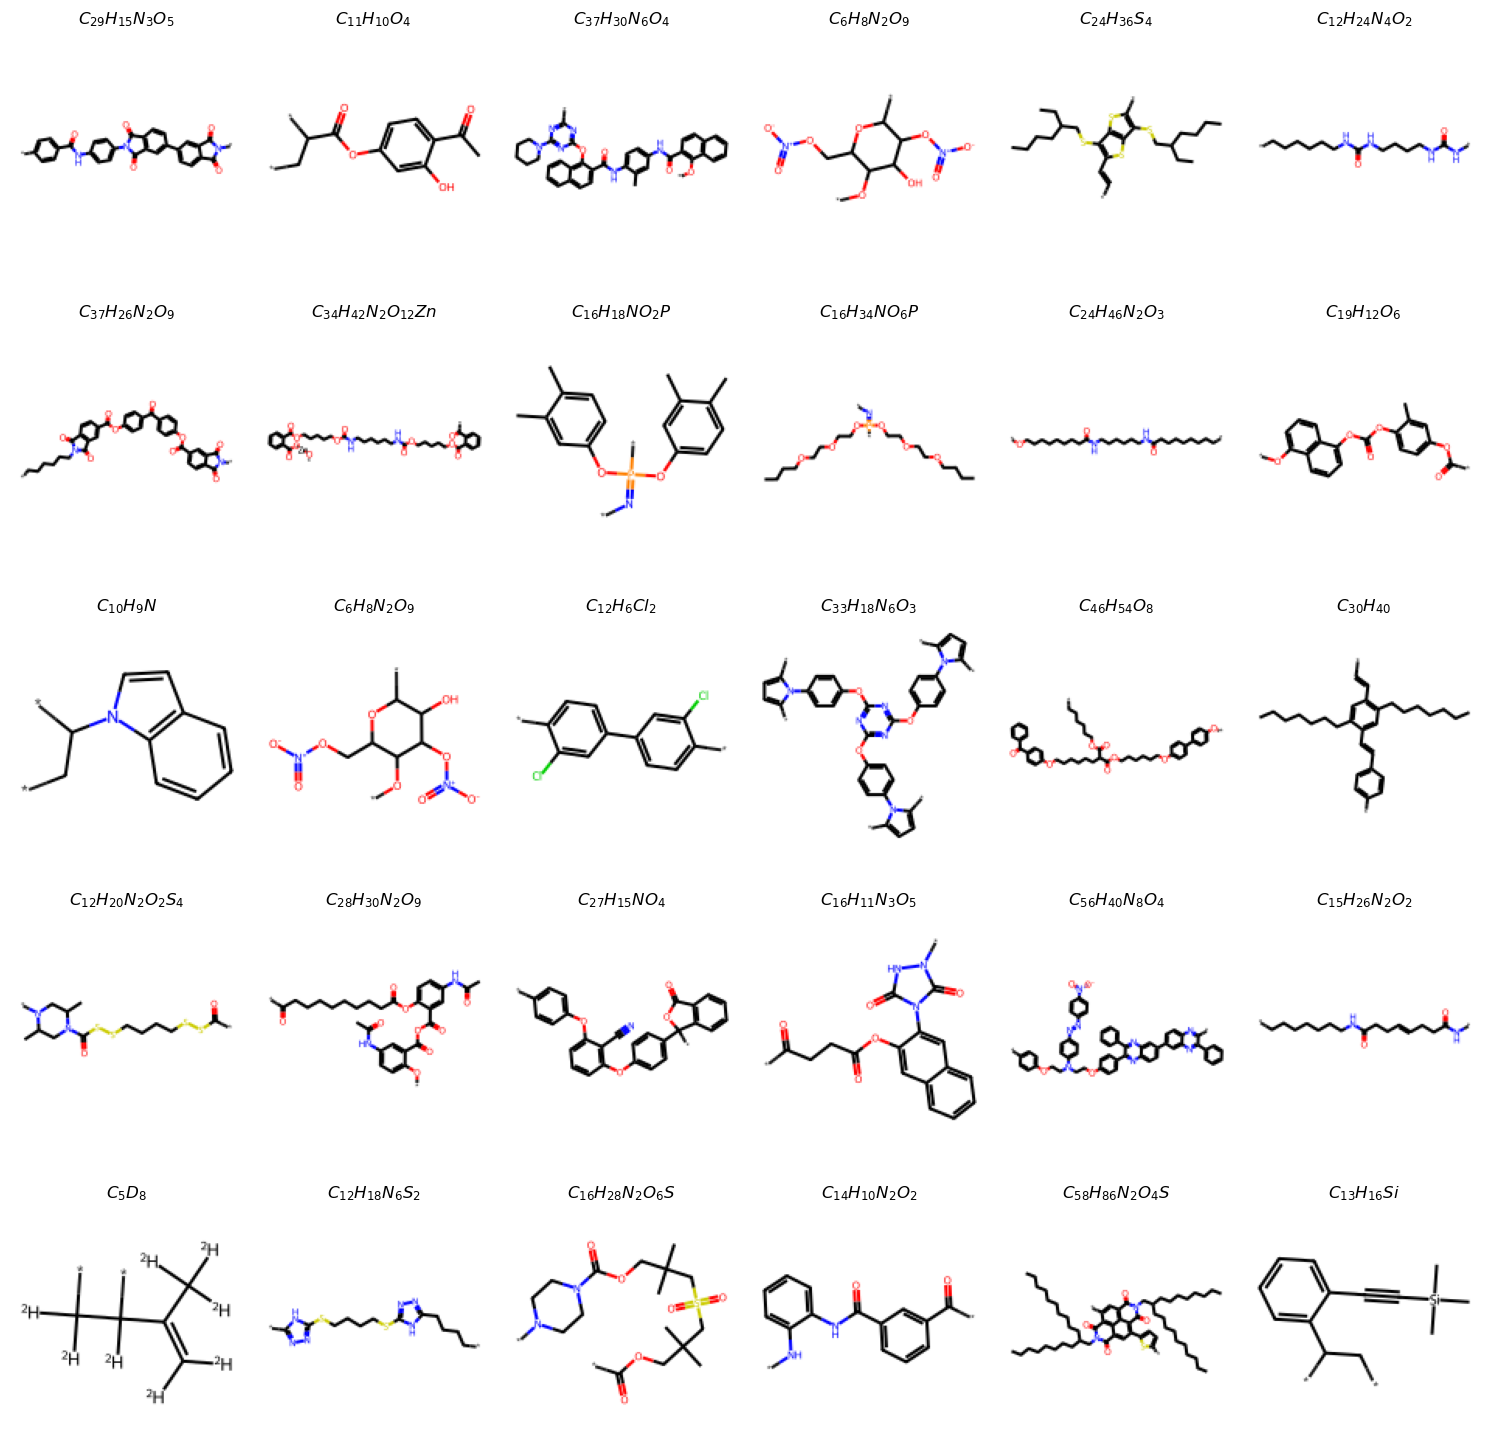

In [54]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import random


# Number of subplots (5x5 grid)
num_subplots = 30

# Randomly select SMILES strings
selected_smiles = random.sample(list(poly_data['SMILES']), min(num_subplots, len(poly_data)))

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15, 15))

# Plot each molecule
for i, smiles in enumerate(selected_smiles):
    mol = Chem.MolFromSmiles(smiles)
    ax = axes[i // 6, i % 6]
    ax.imshow(Draw.MolToImage(mol, size=(150, 150)), cmap='gray')
    ax.axis('off')
    ax.set_title(convert_to_latex(poly_data.loc[poly_data['SMILES'] == smiles, 'cu_formula'].values[0]))


# Adjust layout
plt.tight_layout()
#plt.savefig('30random.eps', bbox_inches='tight', format='eps')
plt.show()


In [48]:
import re

def convert_to_latex(chemical_formula):
    # Use regular expression to separate elements and counts
    elements_counts = re.findall(r'([A-Z][a-z]*)(\d*)', chemical_formula)

    # Convert to LaTeX format
    latex_formula = '$'
    for element, count in elements_counts:
        latex_formula += f"{element}_{{{count}}}" if count else f"{element}"

    latex_formula += '$'
    return latex_formula

# Test the function
chemical_formula = "C22H16As2"
latex_representation = convert_to_latex(chemical_formula)
print(latex_representation)


$C_{22}H_{16}As_{2}$
